In [4]:

import kagglehub
# Download latest version
path = kagglehub.dataset_download("andrewmvd/animal-faces")

print("Path to dataset files:", path)

100%|██████████| 696M/696M [01:47<00:00, 6.79MB/s] 

Extracting files...


Path to dataset files: C:\Users\ozdem\.cache\kagglehub\datasets\andrewmvd\animal-faces\versions\1


In [7]:
path = r"C:\Users\ozdem\.cache\kagglehub\datasets\andrewmvd\animal-faces\versions\1"


In [8]:
import os
from pathlib import Path
def walk_through_dir(dir_path):
    if not os.path.exists(dir_path):
        print("Belirtilen dizin bulunamadı!")
        return
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [9]:
walk_through_dir(path)

There are 1 directories and 0 images in 'C:\Users\ozdem\.cache\kagglehub\datasets\andrewmvd\animal-faces\versions\1'.
There are 2 directories and 0 images in 'C:\Users\ozdem\.cache\kagglehub\datasets\andrewmvd\animal-faces\versions\1\afhq'.
There are 3 directories and 0 images in 'C:\Users\ozdem\.cache\kagglehub\datasets\andrewmvd\animal-faces\versions\1\afhq\train'.
There are 0 directories and 5153 images in 'C:\Users\ozdem\.cache\kagglehub\datasets\andrewmvd\animal-faces\versions\1\afhq\train\cat'.
There are 0 directories and 4739 images in 'C:\Users\ozdem\.cache\kagglehub\datasets\andrewmvd\animal-faces\versions\1\afhq\train\dog'.
There are 0 directories and 4738 images in 'C:\Users\ozdem\.cache\kagglehub\datasets\andrewmvd\animal-faces\versions\1\afhq\train\wild'.
There are 3 directories and 0 images in 'C:\Users\ozdem\.cache\kagglehub\datasets\andrewmvd\animal-faces\versions\1\afhq\val'.
There are 0 directories and 500 images in 'C:\Users\ozdem\.cache\kagglehub\datasets\andrewmvd\

In [10]:
train_dir = Path(path) / "afhq" / "train"
val_dir = Path(path) / "afhq" / "val"
val_dir, train_dir

(WindowsPath('C:/Users/ozdem/.cache/kagglehub/datasets/andrewmvd/animal-faces/versions/1/afhq/val'),
 WindowsPath('C:/Users/ozdem/.cache/kagglehub/datasets/andrewmvd/animal-faces/versions/1/afhq/train'))

In [11]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transformer = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()])

In [12]:
image_path = Path(path)

image_path_list = list(image_path.glob("*/*/*/*.jpg"))
len(image_path_list)

16130

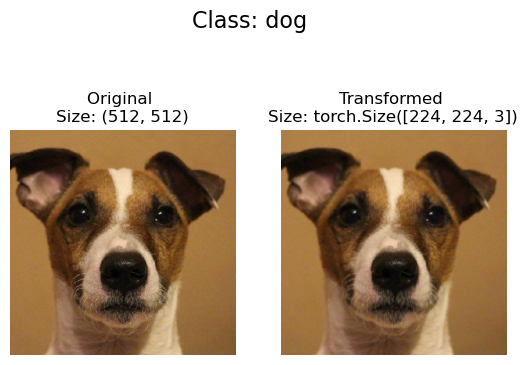

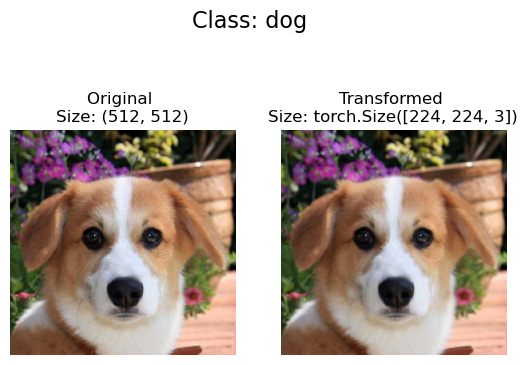

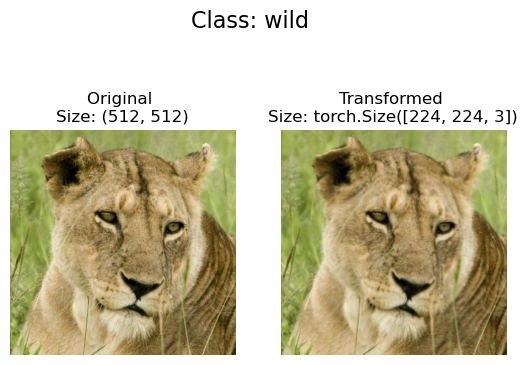

In [13]:
import random
import matplotlib.pyplot as plt
from PIL import Image
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=transformer,
                        n=3,
                        seed = None)

In [14]:
train_data_transformer = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.Resize((224,224)),
    transforms.ToTensor()])
test_data_transformer = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()])

In [15]:
from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir,
                                  transform = train_data_transformer,
                                  target_transform = None)
#val_data = datasets.ImageFolder(root= test_dir,
                                 #transform = test_data_transformer,
                                 #target_transform= None)

print(f'{train_data}, {val_data}')

NameError: name 'val_data' is not defined

In [16]:
class_names = train_data.classes
class_names

['cat', 'dog', 'wild']

In [17]:
len(train_data), len(test_data)


NameError: name 'test_data' is not defined

In [18]:
img, label = train_data[0][0], train_data[0][1]
img, label

(tensor([[[0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          ...,
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157]],
 
         [[0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          ...,
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157]],
 
         [[0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ...,

In [20]:
from torchvision import datasets
from torch.utils.data import DataLoader, random_split


# Train, validation ve test setlerini bölme
train_size = int(0.8 * len(train_data))  # %80 train
val_size = int(0.1 * len(train_data))    # %10 validation
test_size = len(train_data) - train_size - val_size  # %10 test

train_data, val_data, test_data = random_split(train_data, [train_size, val_size, test_size])

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=32,
                               shuffle=True,
                               num_workers=2)
val_data_loader = DataLoader(dataset=val_data,
                               batch_size=32,
                               shuffle=False,
                               num_workers=2)
test_data_loader = DataLoader(test_data,
                         batch_size=32, 
                         shuffle=False)
train_data_loader, test_data_loader, val_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x1f80ded8e90>,
 <torch.utils.data.dataloader.DataLoader at 0x1f80e14e010>)

In [21]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [22]:
from torch import nn
class CNN_Architecture(nn.Module):
    
  """
  Fazla kompleks olmayan bir CNN mimarisi oluşturuldu.
  Katmanlar sırasıyla şöyle:
  conv_block_1; conv2d->batchnorm2d->relu->maxpool2d
  conv_block_2; conv2d(stride=2)->batchnorm2d->relu
  classifier; adaptiveavgpool2d->flatten->linear (veri seti çok büyük olmadığı için basit tutmak mantıklı, daha kompleks yapılar için dropout ve bir linear daha eklenebilir)
  """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units*2,
                  kernel_size=3,
                  stride=1),
        nn.BatchNorm2d(hidden_units*2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units*2,
                  out_channels=hidden_units*2,
                  kernel_size=3,
                  stride=2),
        nn.BatchNorm2d(hidden_units*2),
        nn.ReLU()
    )
    self.classifier = nn.Sequential(
        nn.AdaptiveAvgPool2d(1),
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*2,
                  out_features=hidden_units),
        nn.Dropout(p=0.4),
        nn."Linear"(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self, x:torch.Tensor):
    x= self.conv_block_1(x)
    x= self.conv_block_2(x)
    x= self.conv_block_3(x)
    x= self.classifier(x)
    return x

model_0 = CNN_Architecture(input_shape=3,
                           hidden_units=32,
                           output_shape=len(class_names)).to(device)
model_0


CNN_Architecture(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (classifier): Sequential(
    (0): AdaptiveAvgPool2d(output_size=1)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Dropout(p=0.4, inplace=F

In [23]:
try:
      from torchinfo import summary
except:
    !pip install torchinfo
    from torchinfo import summary
summary(model_0, imput_size=(32,3,224,224))

Layer (type:depth-idx)                   Param #
CNN_Architecture                         --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       896
│    └─BatchNorm2d: 2-2                  64
│    └─ReLU: 2-3                         --
│    └─MaxPool2d: 2-4                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-5                       18,496
│    └─BatchNorm2d: 2-6                  128
│    └─ReLU: 2-7                         --
│    └─MaxPool2d: 2-8                    --
├─Sequential: 1-3                        --
│    └─Conv2d: 2-9                       36,928
│    └─BatchNorm2d: 2-10                 128
│    └─ReLU: 2-11                        --
├─Sequential: 1-4                        --
│    └─AdaptiveAvgPool2d: 2-12           --
│    └─Flatten: 2-13                     --
│    └─Linear: 2-14                      2,080
│    └─Dropout: 2-15                     --
│    └─Linear: 2-16                      99
Total params:

In [24]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: device):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [25]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: device):
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():

        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [79]:
from tqdm.auto import tqdm

def training(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
         device: device):

    results = {"train_loss": [],
                "train_acc": [],  
                "test_loss": [],
                "test_acc": []
               }
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                          device = device)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            device = device)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results


In [26]:
def val_step(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             device: device):
    """Validation set üzerinde değerlendirme yapar"""
    model.eval()
    val_loss, val_acc = 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            val_pred_logits = model(X)
            loss = loss_fn(val_pred_logits, y)
            val_loss += loss.item()
            val_pred_labels = val_pred_logits.argmax(dim=1)
            val_acc += (val_pred_labels == y).sum().item() / len(val_pred_labels)

    val_loss /= len(dataloader)
    val_acc /= len(dataloader)
    return val_loss, val_acc

In [27]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          val_dataloader: torch.utils.data.DataLoader,  # ✅ Validation eklendi
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          scheduler: torch.optim.lr_scheduler.StepLR,
          loss_fn: torch.nn.Module,
          epochs: int,
         device: device):

    results = {"train_loss": [],
               "train_acc": [],
               "val_loss": [],  # ✅ Validation sonuçları eklendi
               "val_acc": [],
               "test_loss": [],
               "test_acc": []
               }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        
        val_loss, val_acc = val_step(model=model,  # ✅ Validation ekliyoruz
                                     dataloader=val_dataloader,
                                     loss_fn=loss_fn,
                                     device=device)
        scheduler.step()

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"val_loss: {val_loss:.4f} | "  # ✅ Validation loss ekliyoruz
            f"val_acc: {val_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["val_loss"].append(val_loss)  # ✅ Validation loss kaydediliyor
        results["val_acc"].append(val_acc)

    # 📌 Test setinde son değerlendirme yapılıyor
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    print(f"Test Results -> Loss: {test_loss:.4f} | Acc: {test_acc:.4f}")

    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

    return results

In [89]:
import torch.optim as optim
from tqdm.auto import tqdm

NUM_EPOCHS = 20

model_0 = CNN_Architecture(input_shape=3, hidden_units=32, output_shape= 3).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr= 0.0005, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model= model_0,
                       train_dataloader= train_data_loader,
                       val_dataloader= val_data_loader,
                       test_dataloader= test_data_loader,
                       optimizer = optimizer,
                       scheduler= scheduler,
                       loss_fn = loss_fn,
                       epochs = NUM_EPOCHS,
                       device = device)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8618 | train_acc: 0.5832 | val_loss: 0.8336 | val_acc: 0.6135
Epoch: 2 | train_loss: 0.7100 | train_acc: 0.7019 | val_loss: 0.7747 | val_acc: 0.6538
Epoch: 3 | train_loss: 0.6299 | train_acc: 0.7440 | val_loss: 0.6052 | val_acc: 0.7375
Epoch: 4 | train_loss: 0.5749 | train_acc: 0.7683 | val_loss: 0.5729 | val_acc: 0.7465
Epoch: 5 | train_loss: 0.5198 | train_acc: 0.8025 | val_loss: 1.9204 | val_acc: 0.5594
Epoch: 6 | train_loss: 0.4659 | train_acc: 0.8266 | val_loss: 0.7023 | val_acc: 0.7322
Epoch: 7 | train_loss: 0.4495 | train_acc: 0.8307 | val_loss: 0.4005 | val_acc: 0.8517
Epoch: 8 | train_loss: 0.4393 | train_acc: 0.8322 | val_loss: 0.5877 | val_acc: 0.7440
Epoch: 9 | train_loss: 0.4070 | train_acc: 0.8483 | val_loss: 0.3233 | val_acc: 0.8910
Epoch: 10 | train_loss: 0.3843 | train_acc: 0.8583 | val_loss: 0.4429 | val_acc: 0.8148
Epoch: 11 | train_loss: 0.3686 | train_acc: 0.8654 | val_loss: 0.4950 | val_acc: 0.8148
Epoch: 12 | train_loss: 0.3569 | train_ac

In [31]:
from typing import Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['val_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['val_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(10, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0MAAAJuCAYAAAByhdmzAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAD1yElEQVR4nOzdd3hUZfr/8fekh5BCgCSE3juIdBAEERAV0RXBXUVxZdUva2VX1+yqP9suq66KqFhWENtiw4IFFaULIiDBQq+hJPQU0pM5vz9OziQhPZmWzOd1XXPN5MyZc54ZmGTuue/nfmyGYRiIiIiIiIj4GD9PD0BERERERMQTFAyJiIiIiIhPUjAkIiIiIiI+ScGQiIiIiIj4JAVDIiIiIiLikxQMiYiIiIiIT1IwJCIiIiIiPknBkIiIiIiI+CQFQyIiIiIi4pMUDIk4wcKFC7HZbGzatMnTQxERkQZg7ty52Gw2evXq5emhiDRoCoZEREREvMyCBQsA+O2339iwYYOHRyPScCkYEhEREfEimzZtYuvWrVx22WUAzJ8/38MjKl9WVpanhyBSZwqGRNxk7dq1jBkzhvDwcBo1asSwYcP44osvSu2TlZXFX//6V9q3b09ISAjR0dEMGDCARYsWOfbZt28f1157LfHx8QQHBxMbG8uYMWNITEx08zMSERFXsIKff//73wwbNox33323TOBx5MgRbrnlFlq3bk1QUBDx8fFMnjyZY8eOOfZJTU3lL3/5Cx06dCA4OJiYmBguvfRSduzYAcDKlSux2WysXLmy1LEPHDiAzWZj4cKFjm3Tp0+ncePG/PLLL4wbN47w8HDGjBkDwLJly5g0aRKtWrUiJCSETp06ceutt3Ly5Mkyz23Hjh38/ve/JzY2luDgYNq0acMNN9xAbm4uBw4cICAggNmzZ5d53OrVq7HZbHzwwQe1ek1FKhLg6QGI+IJVq1YxduxY+vTpw/z58wkODmbevHlMnDiRRYsWMXXqVABmzZrFW2+9xeOPP06/fv3IzMzk119/5dSpU45jXXrppRQWFvLkk0/Spk0bTp48ybp160hNTfXQsxMREWfJzs5m0aJFDBw4kF69evHHP/6RGTNm8MEHH3DjjTcCZiA0cOBA8vPz+fvf/06fPn04deoUX3/9NWfOnCE2NpaMjAwuuOACDhw4wN/+9jcGDx7M2bNnWb16NcnJyXTr1q3GY8vLy+OKK67g1ltv5f7776egoACAvXv3MnToUGbMmEFkZCQHDhzgmWee4YILLuCXX34hMDAQgK1bt3LBBRfQrFkzHn30UTp37kxycjJLliwhLy+Pdu3accUVV/Dyyy9z33334e/v7zj3Cy+8QHx8PFdddZUTXmWREgwRqbPXX3/dAIyNGzeWe/+QIUOMmJgYIyMjw7GtoKDA6NWrl9GqVSvDbrcbhmEYvXr1Mq688soKz3Py5EkDMObMmePcJyAiIl7hzTffNADj5ZdfNgzDMDIyMozGjRsbI0aMcOzzxz/+0QgMDDS2bdtW4XEeffRRAzCWLVtW4T4rVqwwAGPFihWltu/fv98AjNdff92x7cYbbzQAY8GCBZWO3263G/n5+cbBgwcNwPj0008d91100UVGVFSUcfz48SrH9PHHHzu2HTlyxAgICDAeeeSRSs8tUhsqkxNxsczMTDZs2MDkyZNp3LixY7u/vz/Tpk3j8OHD7Ny5E4BBgwaxdOlS7r//flauXEl2dnapY0VHR9OxY0eeeuopnnnmGbZs2YLdbnfr8xEREdeZP38+oaGhXHvttQA0btyYa665hjVr1rB7924Ali5dyujRo+nevXuFx1m6dCldunTh4osvdur4rr766jLbjh8/zm233Ubr1q0JCAggMDCQtm3bArB9+3bALANftWoVU6ZMoXnz5hUef9SoUfTt25cXX3zRse3ll1/GZrNxyy23OPW5iIDmDIm43JkzZzAMgxYtWpS5Lz4+HsBRBjd37lz+9re/8cknnzB69Giio6O58sorHX8AbTYb3333HePHj+fJJ5/k/PPPp3nz5tx5551kZGS470mJiIjT7dmzh9WrV3PZZZdhGAapqamkpqYyefJkoLjD3IkTJ2jVqlWlx6rOPjXVqFEjIiIiSm2z2+2MGzeOjz76iPvuu4/vvvuOH3/8kR9++AHA8aXemTNnKCwsrNaY7rzzTr777jt27txJfn4+//3vf5k8eTJxcXFOfT4ioGBIxOWaNGmCn58fycnJZe47evQoAM2aNQMgLCyMRx55hB07dpCSksJLL73EDz/8wMSJEx2Padu2LfPnzyclJYWdO3dyzz33MG/ePO699173PCEREXGJBQsWYBgGH374IU2aNHFcrK5yb7zxBoWFhTRv3pzDhw9Xeqzq7BMSEgJAbm5uqe3lNT4A8wu5c/36669s3bqVp556ijvuuINRo0YxcOBAmjZtWmq/6Oho/P39qxwTwB/+8AeaNm3Kiy++yAcffEBKSgp//vOfq3ycSG0oGBJxsbCwMAYPHsxHH31UquzNbrfz9ttv06pVK7p06VLmcbGxsUyfPp3f//737Ny5s9wWpl26dOGBBx6gd+/e/PTTTy59HiIi4jqFhYW88cYbdOzYkRUrVpS5/OUvfyE5OZmlS5cyYcIEVqxY4SixLs+ECRPYtWsXy5cvr3Cfdu3aAfDzzz+X2r5kyZJqj9sKkIKDg0ttf+WVV0r9HBoayoUXXsgHH3xQYbBlCQkJ4ZZbbuGNN97gmWee4bzzzmP48OHVHpNITaibnIgTLV++nAMHDpTZPnv2bMaOHcvo0aP561//SlBQEPPmzePXX39l0aJFjj8mgwcP5vLLL6dPnz40adKE7du389ZbbzF06FAaNWrEzz//zO23384111xD586dCQoKYvny5fz888/cf//9bn62IiLiLEuXLuXo0aM88cQTjBo1qsz9vXr14oUXXmD+/Pm88MILLF26lJEjR/L3v/+d3r17k5qayldffcWsWbPo1q0bd999N++99x6TJk3i/vvvZ9CgQWRnZ7Nq1Souv/xyRo8eTVxcHBdffDGzZ8+mSZMmtG3blu+++46PPvqo2uPu1q0bHTt25P7778cwDKKjo/nss89YtmxZmX2tDnODBw/m/vvvp1OnThw7dowlS5bwyiuvEB4e7th35syZPPnkk2zevJnXXnutVq+pSLV4tn+DSMNgdZOr6LJ//35jzZo1xkUXXWSEhYUZoaGhxpAhQ4zPPvus1HHuv/9+Y8CAAUaTJk2M4OBgo0OHDsY999xjnDx50jAMwzh27Jgxffp0o1u3bkZYWJjRuHFjo0+fPsazzz5rFBQUeOKpi4iIE1x55ZVGUFBQpZ3Wrr32WiMgIMBISUkxDh06ZPzxj3804uLijMDAQCM+Pt6YMmWKcezYMcf+Z86cMe666y6jTZs2RmBgoBETE2Ncdtllxo4dOxz7JCcnG5MnTzaio6ONyMhI4/rrrzc2bdpUbje5sLCwcse1bds2Y+zYsUZ4eLjRpEkT45prrjGSkpIMwPh//+//ldn3mmuuMZo2bWoEBQUZbdq0MaZPn27k5OSUOe6oUaOM6OhoIysrq5qvokjN2QzDMDwWiYmIiIiInOP48eO0bduWO+64gyeffNLTw5EGTGVyIiIiIuIVDh8+zL59+3jqqafw8/Pjrrvu8vSQpIFTAwURERER8QqvvfYao0aN4rfffuOdd96hZcuWnh6SNHAqkxMREREREZ+kzJCIiIiIiPikGgVDs2fPZuDAgYSHhxMTE8OVV15ZaY97y6pVq+jfvz8hISF06NCBl19+ucw+ixcvpkePHgQHB9OjRw8+/vjjmgxNRERERESkRmoUDK1atYo///nP/PDDDyxbtoyCggLGjRtHZmZmhY/Zv38/l156KSNGjGDLli38/e9/584772Tx4sWOfdavX8/UqVOZNm0aW7duZdq0aUyZMoUNGzbU/pmJiIiIiIhUok5zhk6cOEFMTAyrVq1i5MiR5e7zt7/9jSVLlrB9+3bHtttuu42tW7eyfv16AKZOnUp6ejpLly517HPJJZfQpEkTFi1aVK2x2O12jh49Snh4uGMBSxERcT3DMMjIyCA+Ph4/P1VfW/R3SUTEc6r7t6lOrbXT0tIAiI6OrnCf9evXM27cuFLbxo8fz/z588nPzycwMJD169dzzz33lNlnzpw5FR43NzeX3Nxcx89HjhyhR48etXgWIiLiDIcOHaJVq1aeHobXOHr0KK1bt/b0MEREfFpVf5tqHQwZhsGsWbO44IIL6NWrV4X7paSkEBsbW2pbbGwsBQUFnDx5khYtWlS4T0pKSoXHnT17No888kiZ7YcOHSIiIqKGz0ZERGorPT2d1q1bEx4e7umheBXr9dDfJRER96vu36ZaB0O33347P//8M2vXrq1y33PLA6zKvJLby9unsrKChIQEZs2a5fjZesIRERH6oyMi4gEqBSvNej30d0lExHOq+ttUq2DojjvuYMmSJaxevbrKkoi4uLgyGZ7jx48TEBBA06ZNK93n3GxRScHBwQQHB9dm+CIiIiIiIjXrJmcYBrfffjsfffQRy5cvp3379lU+ZujQoSxbtqzUtm+++YYBAwYQGBhY6T7Dhg2ryfBERERERESqrUbB0J///Gfefvtt/ve//xEeHk5KSgopKSlkZ2c79klISOCGG25w/Hzbbbdx8OBBZs2axfbt21mwYAHz58/nr3/9q2Ofu+66i2+++YYnnniCHTt28MQTT/Dtt99y99131/0ZioiIiIiIlKNGZXIvvfQSAKNGjSq1/fXXX2f69OkAJCcnk5SU5Livffv2fPnll9xzzz28+OKLxMfHM3fuXK6++mrHPsOGDePdd9/lgQce4MEHH6Rjx4689957DB48uJZPS0S8hWEYFBQUUFhY6OmhSC35+/sTEBCgOUEuoPeHuILesyLVV6d1hrxJeno6kZGRpKWlaaKqiJfIy8sjOTmZrKwsTw9F6qhRo0a0aNGCoKCgMvfp92/5qnpd9P4QV6rsPSviC6r7t6lO6wyJiFTEbrezf/9+/P39iY+PJygoSN9S1kOGYZCXl8eJEyfYv38/nTt31sKqTqD3h7iK3rMiNaNgSERcIi8vD7vdTuvWrWnUqJGnhyN1EBoaSmBgIAcPHiQvL4+QkBBPD6ne0/tDXEnvWZHq01cFIuJS+kayYdC/o2vodRVX0f8tkerRO0VERERERHySgiEREREREfFJCoZERFyoXbt2zJkzxynHWrlyJTabjdTUVKccT8TTnPn+EBGpDTVQEBE5x6hRozjvvPOc8iFt48aNhIWF1X1QIl5C7w8RaUgUDImI1JBhGBQWFhIQUPWv0ObNm7thRCLeQ++PYnl5eVrnR8TLqUxORNzCMAyy8go8cqnJ2tLTp09n1apVPPfcc9hsNmw2GwsXLsRms/H1118zYMAAgoODWbNmDXv37mXSpEnExsbSuHFjBg4cyLffflvqeOeWAdlsNl577TWuuuoqGjVqROfOnVmyZEmtX9fFixfTs2dPgoODadeuHU8//XSp++fNm0fnzp0JCQkhNjaWyZMnO+778MMP6d27N6GhoTRt2pSLL76YzMzMWo9F6qY+vEe8+f1RWFjIzTffTPv27QkNDaVr164899xzZfZbsGCB4z3TokULbr/9dsd9qamp3HLLLcTGxhISEkKvXr34/PPPAXj44Yc577zzSh1rzpw5tGvXrtTrc+WVVzJ79mzi4+Pp0qULAG+//TYDBgwgPDycuLg4/vCHP3D8+PFSx/rtt9+47LLLiIiIIDw8nBEjRrB3715Wr15NYGAgKSkppfb/y1/+wsiRI6v12ohIxZQZEhG3yM4vpMdDX3vk3NseHU+joOr9unvuuefYtWsXvXr14tFHHwXMDykA9913H//5z3/o0KEDUVFRHD58mEsvvZTHH3+ckJAQ3njjDSZOnMjOnTtp06ZNhed45JFHePLJJ3nqqad4/vnnue666zh48CDR0dE1el6bN29mypQpPPzww0ydOpV169Yxc+ZMmjZtyvTp09m0aRN33nknb731FsOGDeP06dOsWbMGgOTkZH7/+9/z5JNPctVVV5GRkcGaNWtqFDiKc9WH94g3vz/sdjutWrXi/fffp1mzZqxbt45bbrmFFi1aMGXKFABeeuklZs2axb///W8mTJhAWloa33//vePxEyZMICMjg7fffpuOHTuybds2/P39q/UaWr777jsiIiJYtmyZ4/2Ul5fHY489RteuXTl+/Dj33HMP06dP58svvwTgyJEjjBw5klGjRrF8+XIiIiL4/vvvKSgoYOTIkXTo0IG33nqLe++9F4CCggLefvtt/v3vf9dobCJSloIhEZESIiMjCQoKolGjRsTFxQGwY8cOAB599FHGjh3r2Ldp06b07dvX8fPjjz/Oxx9/zJIlS0p923yu6dOn8/vf/x6Af/3rXzz//PP8+OOPXHLJJTUa6zPPPMOYMWN48MEHAejSpQvbtm3jqaeeYvr06SQlJREWFsbll19OeHg4bdu2pV+/foAZDBUUFPC73/2Otm3bAtC7d+8anV98jze/PwIDA3nkkUccP7dv355169bx/vvvO4Khxx9/nL/85S/cddddjv0GDhwIwLfffsuPP/7I9u3bHRmdDh06VP2inCMsLIzXXnutVHncH//4R8ftDh06MHfuXAYNGsTZs2dp3LgxL774IpGRkbz77rsEBgYCOMYAcPPNN/P66687gqEvvviCrKwsx/MSkdpTMCQibhEa6M+2R8d77NzOMGDAgFI/Z2Zm8sgjj/D5559z9OhRCgoKyM7OJikpqdLj9OnTx3E7LCyM8PDwMiUz1bF9+3YmTZpUatvw4cOZM2cOhYWFjB07lrZt29KhQwcuueQSLrnkEkf5Ud++fRkzZgy9e/dm/PjxjBs3jsmTJ9OkSZMaj0Oco76/R7zh/fHyyy/z2muvcfDgQbKzs8nLy3OUth0/fpyjR48yZsyYch+bmJhIq1atSgUhtdG7d+8y84S2bNnCww8/TGJiIqdPn8ZutwOQlJREjx49SExMZMSIEY5A6FzTp0/ngQce4IcffmDIkCEsWLCAKVOmqPmEiBMoGBIRt7DZbNUuVfNW537wuPfee/n666/5z3/+Q6dOnQgNDWXy5Mnk5eVVepxzP/DYbDbHh6OaMAwDm81WZpslPDycn376iZUrV/LNN9/w0EMP8fDDD7Nx40aioqJYtmwZ69at45tvvuH555/nH//4Bxs2bKB9+/Y1HovUXX1/j3j6/fH+++9zzz338PTTTzN06FDCw8N56qmn2LBhAwChoaGVPr6q+/38/MqUkebn55fZ79zXITMzk3HjxjFu3DjefvttmjdvTlJSEuPHj3e8FlWdOyYmhokTJ/L666/ToUMHvvzyS1auXFnpY0SketRAQUTkHEFBQRQWFla535o1a5g+fTpXXXUVvXv3Ji4ujgMHDrh+gEV69OjB2rVrS21bt24dXbp0ccxzCAgI4OKLL+bJJ5/k559/5sCBAyxfvhwwP2QOHz6cRx55hC1bthAUFMTHH3/stvFL/eSt7481a9YwbNgwZs6cSb9+/ejUqRN79+513B8eHk67du347rvvyn18nz59OHz4MLt27Sr3/ubNm5OSklIqIEpMTKxyXDt27ODkyZP8+9//ZsSIEXTr1q1MpqtPnz6sWbOm3ODKMmPGDN59911eeeUVOnbsyPDhw6s8t4hUTcGQiMg52rVrx4YNGzhw4AAnT56s8FvpTp068dFHH5GYmMjWrVv5wx/+UKsMT2395S9/4bvvvuOxxx5j165dvPHGG7zwwgv89a9/BeDzzz9n7ty5JCYmcvDgQd58803sdjtdu3Zlw4YN/Otf/2LTpk0kJSXx0UcfceLECbp37+628Uv95K3vj06dOrFp0ya+/vprdu3axYMPPsjGjRtL7fPwww/z9NNPM3fuXHbv3s1PP/3E888/D8CFF17IyJEjufrqq1m2bBn79+9n6dKlfPXVV4C5vtKJEyd48skn2bt3Ly+++CJLly6tclxt2rQhKCiI559/nn379rFkyRIee+yxUvvcfvvtpKenc+2117Jp0yZ2797NW2+9xc6dOx37jB8/nsjISB5//HFuuummur5cIlJEwZCU9cPL8MF0KCzw9EhEPOKvf/0r/v7+9OjRw1HSUp5nn32WJk2aMGzYMCZOnMj48eM5//zz3TbO888/n/fff593332XXr168dBDD/Hoo48yffp0AKKiovjoo4+46KKL6N69Oy+//DKLFi2iZ8+eREREsHr1ai699FK6dOnCAw88wNNPP82ECRPcNn6pn7z1/XHbbbfxu9/9jqlTpzJ48GBOnTrFzJkzS+1z4403MmfOHObNm0fPnj25/PLL2b17t+P+xYsXM3DgQH7/+9/To0cP7rvvPkcWrHv37sybN48XX3yRvn378uOPPzq+eKhM8+bNWbhwIR988AE9evTg3//+N//5z39K7dO0aVOWL1/O2bNnufDCC+nfvz///e9/S5UM+vn5MX36dAoLC7nhhhvq8lKJuFZhAXx0C6x91tMjqRab0UD6qKanpxMZGUlaWhoRERGeHk799nQ3yEiGP62Alu77YCcNS05ODvv376d9+/aEhIR4ejhSR5X9e+r3b/kqe130/pDa+NOf/sSxY8eqtfaS/o+JxyT9AAuKmsFM+xg6XuSRYVT3b5MyQ1JW7tmi6wzPjkNERERIS0vj22+/5Z133uGOO+7w9HBEKpdaIlv8+T2Ql+W5sVSDgiEpzTAgv2gF+jytRC/iTrfddhuNGzcu93Lbbbd5engiHuXL749JkyZxxRVXcOutt5Zay0nEK5UMhs4cgJWzPTaU6qi/PTzFNQpywSia4KpgSMStHn300QrnIKj8THydL78/1EZb6pW0Q+Z1q4FweCOsfxF6T4YWfSt/nIcoGJLS8kukMvPOem4cIj4oJiaGmJgYTw9DxCvp/SFST1iZof7TIbIV/PYxLLkDZiwHf+8LPVQmJ6WVzAYpMyQiIiIiNZFalBmKbA2XPAEhkZC8FTa85NlxVUDBkJRWKjOkYEhEREREqskwisvkotpAeCyMe9z8ecW/zDlEXkbBkJRWKjOkMjkRERERqabME1CQA9ggoqW5rd80aDfC/ML983vMgMmLKBiS0pQZEhEREZHasErkwltAQJB522aDic+BfzDsXQ4/v++58ZVDwZCUlqdgSERERERqIa2oeUJU69Lbm3aEC+8zb3+dAJmn3DuuSigYktLUTU6kztq1a8ecOXOqta/NZuOTTz5x6XhEvElN3h8iUs9YneSi2pS9b/hdENMTsk7B139377gqoWBISlOZnIiIiIjURslOcufyD4Qr5gI2+Pld2POdW4dWEQVDUppaa4uIiJSrsLAQu93u6WGIeC9HJ7lygiGAVgNg8K3m7c/v8YrPmgqGpDRlhsRVDMP8P+WJSw0617zyyiu0bNmyzAeeK664ghtvvJG9e/cyadIkYmNjady4MQMHDuTbb7912sv0yy+/cNFFFxEaGkrTpk255ZZbOHu2uGR15cqVDBo0iLCwMKKiohg+fDgHDx4EYOvWrYwePZrw8HAiIiLo378/mzZtctrYxMXqwXvE3e+PZ555ht69exMWFkbr1q2ZOXNmqfcDwPfff8+FF15Io0aNaNKkCePHj+fMmTMA2O12nnjiCTp16kRwcDBt2rThn//8J2C+l2w2G6mpqY5jJSYmYrPZOHDgAAALFy4kKiqKzz//nB49ehAcHMzBgwfZuHEjY8eOpVmzZkRGRnLhhRfy008/lRpXamoqt9xyC7GxsYSEhNCrVy8+//xzMjMziYiI4MMPPyy1/2effUZYWBgZGRm1fr1EPK6yMjnLRQ9ARCtIPQgrZ7tnXJXwvmVgxbPyNGdIXCQ/C/4V75lz//0oBIVVa9drrrmGO++8kxUrVjBmzBgAzpw5w9dff81nn33G2bNnufTSS3n88ccJCQnhjTfeYOLEiezcuZM2bSr55V8NWVlZXHLJJQwZMoSNGzdy/PhxZsyYwe23387ChQspKCjgyiuv5E9/+hOLFi0iLy+PH3/8EZvNBsB1111Hv379eOmll/D39ycxMZHAwMA6jUncqB68R9z9/vDz82Pu3Lm0a9eO/fv3M3PmTO677z7mzZsHmMHLmDFj+OMf/8jcuXMJCAhgxYoVFBYWApCQkMB///tfnn32WS644AKSk5PZsWNHjcaQlZXF7Nmzee2112jatCkxMTHs37+fG2+8kblz5wLw9NNPc+mll7J7927Cw8Ox2+1MmDCBjIwM3n77bTp27Mi2bdvw9/cnLCyMa6+9ltdff53Jkyc7zmP9HB4eXuPXScQrGEaJMrlK3u/B4XD5M/C/KbD+Reg1GeLPc8sQy6NgSErLV5mc+Lbo6GguueQS/ve//zk+7H3wwQdER0czZswY/P396du3r2P/xx9/nI8//pglS5Zw++231+nc77zzDtnZ2bz55puEhZkfTF944QUmTpzIE088QWBgIGlpaVx++eV07NgRgO7duzsen5SUxL333ku3bt0A6Ny5c53GI3Iud78/7r77bsft9u3b89hjj/F///d/jmDoySefZMCAAY6fAXr27AlARkYGzz33HC+88AI33ngjAB07duSCCy6o0Rjy8/OZN29eqed10UUXldrnlVdeoUmTJqxatYrLL7+cb7/9lh9//JHt27fTpUsXADp06ODYf8aMGQwbNoyjR48SHx/PyZMn+fzzz1m2bFmNxibiVXJSIa8osxnZqvJ9u4yHnr+D3z6CJXfAn1aAv2fCEgVDUpoyQ+IqgY3Mb589de4auO6667jllluYN28ewcHBvPPOO1x77bX4+/uTmZnJI488wueff87Ro0cpKCggOzubpKSkOg9z+/bt9O3b1xEIAQwfPhy73c7OnTsZOXIk06dPZ/z48YwdO5aLL76YKVOm0KJFCwBmzZrFjBkzeOutt7j44ou55pprHEGT1AP15D3izvfHihUr+Ne//sW2bdtIT0+noKCAnJwcMjMzCQsLIzExkWuuuabcx27fvp3c3FxH0FZbQUFB9OnTp9S248eP89BDD7F8+XKOHTtGYWEhWVlZjueZmJhIq1atHIHQuQYNGkTPnj158803uf/++3nrrbdo06YNI0eOrNNYpZayU2Hts3D+DWYLaKkdq0QurDkEVeN3yoQnzHWHUn6GH+bB8DtdO74KaM6QlFZyzlBBDhQWeG4s0rDYbGYZjicuRWVk1TVx4kTsdjtffPEFhw4dYs2aNVx//fUA3HvvvSxevJh//vOfrFmzhsTERHr37k1eXl6dXyLDMBwlb2VfPnP766+/zvr16xk2bBjvvfceXbp04YcffgDg4Ycf5rfffuOyyy5j+fLl9OjRg48//rjO4xI3qSfvEXe9Pw4ePMill15Kr169WLx4MZs3b+bFF18EzGwNQGhoaIWPr+w+MEvwwHzfWazjnnucc9+X06dPZ/PmzcyZM4d169aRmJhI06ZNHc+zqnODmR16/fXXAfN9fdNNN1X4/hcXW/0UfD8HVv7b0yOp3yrrJFeexjEw7nHz9op/wen9rhlXFRQMSWnnlsblq1ROfE9oaCi/+93veOedd1i0aBFdunShf//+AKxZs4bp06dz1VVX0bt3b+Li4hyTreuqR48eJCYmkplZ/L77/vvv8fPzK/UNc79+/UhISGDdunX06tWL//3vf477unTpwj333MM333zD7373O8eHLV8wb9482rdvT0hICP3792fNmjWV7v/iiy/SvXt3QkND6dq1K2+++WaZfRYvXuyYOK/g0uSu98emTZsoKCjg6aefZsiQIXTp0oWjR0tnzvr06cN335Xfnrdz586EhoZWeH/z5s0BSE5OdmxLTEys1tjWrFnDnXfeyaWXXkrPnj0JDg7m5MmTpcZ1+PBhdu3aVeExrr/+epKSkpg7dy6//fabo5RP3MwwYNsS8/ax3zw7lvquqk5y5el3PbQbAQXZZne5GjQ8chYFQ1JaycwQaN6Q+KzrrruOL774ggULFji+9Qbo1KkTH330EYmJiWzdupU//OEPTmu1e9111xESEsKNN97Ir7/+yooVK7jjjjuYNm0asbGx7N+/n4SEBNavX8/Bgwf55ptv2LVrF927dyc7O5vbb7+dlStXcvDgQb7//ns2btxYak5RQ/bee+9x9913849//IMtW7YwYsQIJkyYUGF51ksvvURCQoIjm/bII4/w5z//mc8++8yxz/r165k6dSrTpk1j69atTJs2jSlTprBhwwZ3PS2v5Y73R8eOHSkoKOD5559n3759vPXWW7z88sul9klISGDjxo3MnDmTn3/+mR07dvDSSy9x8uRJQkJC+Nvf/sZ9993Hm2++yd69e/nhhx+YP3++Y6ytW7fm4YcfZteuXXzxxRc8/fTT1Rpbp06deOutt9i+fTsbNmzguuuuK5UNuvDCCxk5ciRXX301y5YtY//+/SxdupSvvvrKsU+TJk343e9+x7333su4ceNo1aqKORbiGsmJkFb0e+LUblXE1IWVGaqsk9y5bDaY+Bz4B8O+FfDze64ZW2WMBiItLc0AjLS0NE8PpX6bf4lh/L+I4suJXZ4ekdRT2dnZxrZt24zs7GxPD6VWCgoKjBYtWhiAsXfvXsf2/fv3G6NHjzZCQ0ON1q1bGy+88IJx4YUXGnfddZdjn7Zt2xrPPvtstc4DGB9//LHj559//tkYPXq0ERISYkRHRxt/+tOfjIyMDMMwDCMlJcW48sorjRYtWhhBQUFG27ZtjYceesgoLCw0cnNzjWuvvdZo3bq1ERQUZMTHxxu33367017/yv49veH376BBg4zbbrut1LZu3boZ999/f7n7Dx061PjrX/9aattdd91lDB8+3PHzlClTjEsuuaTUPuPHjzeuvfbaao2pstdF749nq3WeZ555xmjRooURGhpqjB8/3njzzTcNwDhz5oxjn5UrVxrDhg0zgoODjaioKGP8+PGO+wsLC43HH3/caNu2rREYGGi0adPG+Ne//uV47Nq1a43evXsbISEhxogRI4wPPvjAAIz9+/cbhmEYr7/+uhEZGVlmXD/99JMxYMAAIzg42OjcubPxwQcflHlep06dMm666SajadOmRkhIiNGrVy/j888/L3Wc7777zgCM999/v1qvR03U9/9jbvPtI6U/9xzf6ekR1V+L/mC+hj+8UvPHrv6P+dh/tzOMsyecMpzq/m2yGYYH8lEukJ6eTmRkJGlpaURERHh6OPXXKxea35JYblkJ8f08NRqpx3Jycti/f7+jbEnqt8r+PT39+zcvL49GjRrxwQcfcNVVVzm233XXXSQmJrJq1aoyj+nfvz+XXnopjz32mGNbQkICTz/9NJmZmQQGBtKmTRvuuece7rnnHsc+zz77LHPmzHGs7VRSbm4uubm5jp/T09Np3bp1ua+L3h8CZgfJu+66i6NHjxIUFOTUY+v/WDUYBrww0MwIYQMMmPIW9LjC0yOrn14ZCclb4ffvQtcJNXtsYT68OgqO/Qq9p8DV/63zcKr7t0llclKayuREpJ45efIkhYWFxMbGltoeGxtLSkpKuY8ZP348r732Gps3b8YwDDZt2sSCBQvIz893zP1ISUmp0TFnz55NZGSk49K6dQ3q5sWnZGVl8dtvvzF79mxuvfVWpwdCUk0ndpqBkH8QdLusaFvN1qGSEmpTJmfxD4SJcwEb/PI+7HHeYuZVUTAkpVmttW1F/zUUDInU2jvvvEPjxo3LvVhroYjznNuJy6ikO9+DDz7IhAkTGDJkCIGBgUyaNInp06cD4O/vX6tjJiQkkJaW5rgcOnSoDs+m4fPl98eTTz7JeeedR2xsLAkJCZ4eju/aXtQ4ocNoaD3IvH18u+fGU5/lnoXs0+bt6naTO1er/jD4NvP25/e47TOo1hmS0qzucY2aQuYJrTUkUgdXXHEFgwcPLve+wMBAN4+m4WrWrBn+/v5lMjbHjx8vk9mxhIaGsmDBAl555RWOHTtGixYtePXVVwkPD6dZs2YAxMXF1eiYwcHBBAcHO+EZ+QZffn88/PDDPPzww54ehljBUPeJ0Ljofa3MUO1YneRCIiGkDuXSFz0AOz431yxa8S8Y/0/njK8SCoakNCszFBZTFAwpMyRSW+Hh4YSHh3t6GA1eUFAQ/fv3Z9myZaXmDC1btoxJkyZV+tjAwEBHF693332Xyy+/3LH+zNChQ1m2bFmpOUPffPMNw4YNc8Gz8D16f4hHnd4PKb+AzR+6Xlr85e/J3eb8Ff+GHZA7XV1K5EoKbgyXPQP/u8ZciLXX1dDy/LqPrxIKhqSYvRAKiyb/Nm4Ox1EwJHXWQHq0+Dxv/3ecNWsW06ZNY8CAAQwdOpRXX32VpKQkbrvNLLlISEjgyJEjjrWEdu3axY8//sjgwYM5c+YMzzzzDL/++itvvPGG45h33XUXI0eO5IknnmDSpEl8+umnfPvtt6xdu9Zp4/b211XqL/3fqsL2ojb67YZDWFMIbQKBYWaFzOl90LyrZ8dX36QWNZWJrGMwBNBlnBkE/boYPrsT/rTCpcGpgiEpVjLwCYsp2qYyOakdq8wlKyurWquxi3fLyjKzxt5avjR16lROnTrFo48+SnJyMr169eLLL7+kbdu2gLmwZsk1hwoLC3n66afZuXMngYGBjB49mnXr1tGuXTvHPsOGDePdd9/lgQce4MEHH6Rjx4689957FZZ21YTeH+Jq3v6e9ThHiVxR5zg/PzMAOvqTOW9IwVDN1GbB1cpc8m84tBH63VA8j91FFAxJMUcnOZs5ZwiUGZJa8/f3JyoqiuPHjwPQqFGjCieei/cyDIOsrCyOHz9OVFRUqeYC3mbmzJnMnDmz3PsWLlxY6ufu3buzZcuWKo85efJkJk+e7IzhlaL3h7hKfXrPekz6UTi80bzd7fLi7THdzWBI84ZqziqTq23zhHM1joE7f3JLuaKCISlmBT5BYWbNZsltIrUQFxcH4PjAJ/VXVFSU499TnEPvD3ElvWcrsf1z87r1YIhoUby9eTfz2sc7yuXkF2KzQXBADQLp1KLMe13nDJXkpnlbCoakmJUZCmxkBkSgYEjqxGaz0aJFC2JiYsjPz/f0cKSWAgMD9e2yC+j9Ia6i92wVSnaRKymmu3ntw5mhdXtPcueiRPIKCrltVEduGtae0KBq/F9ydpmcGykYkmL52eZ1UCMIsjJDmjMkdefv768/zCIV0PtDxI0yT8LB783b5wZDVmbo1B6f6yhnGAavrt7HE1/twF7Ue+PJr3ay8PsD3DmmM1MHtibQv4K5O/k5cPaYedsZDRTcTIuuSjErCxQYVpwZylUwJCIi4lUMo3gpDKmZnV+CYYe4PtCkXen7IltBUDjYC+DUXo8MzxPO5hYw852fmL3UDIR+d35L/nNNX1o1CeV4Ri4PfPIrFz+ziiVbj2K3l9OlMO2weR0YBo2i3Tt4J1AwJMUcZXKhJTJDKpMTERHxKt88AP9uY66TIzWzrahErscVZe+z2Yq7yJ3wjXlDe45nMOmFtSz9NYVAfxuPXdmLp6/py+T+rVj+l1E8ckVPmjUO4uCpLO5ctIXLn1/Lyp3HS7duT7PmC7U2X8N6RsGQFLO+ZQrSnCERERGvdfB7sOfDvpWeHkn9kpNW/Jp1LycYAoixmig0/HlDS39JZtIL37P3RCaxEcG8e8tQpg1p6+hsGRTgx43D2rHq3tH8ZWwXwoMD2JaczvTXN3Ltqz+w+eAZ80BO7iR3IiOXTxOPcN+HW3l5leszdJozJMXyS5bJac6QiIiIV8o8ZV778ET/Wtn1tRlENuta8TpC1ryhBpwZKii089TXO3ll9T4AhnSI5vnfn0/z8OBy9w8LDuCOMZ25bkhbXlq5hzfWH2TD/tNc/dI6Lu4eyxNN9tAUat1J7mxuAT/uP8Xa3adYt/ckO1IyHPf1aBHBbRd2rNVxq0vBkBRTZkhERMT7ZZ4wr0/s8uw46puKusiV1Lyoo1wDzQydPJvLHf/bwvp9ZkB9y8gO3De+KwEVNUcoITosiH9c1oObhrdn7ne7eX/TIb7dfozVgT9xlT+kBsURVY0x5BfaSTyUytrdJ/l+z0kSD6VScM5cpB4tIrigczOGd2pWi2dZMwqGpJgjM6RgSERExCvlZUJBUffXkzvNZgr1cJ6G2+Vlwu5vzdvlzReyWGVyp/dCQR4EBLl+bG6yJekMM9/5ieS0HBoF+fPU5L5c1qdF1Q88R3xUKP++ug8zRnTgmWU7id95EoCHV6cTlfMbt1/UiWaNi7NMhmGwIyWD7/eYwc+G/afJyissdcw20Y0Y3qkpwzs1Y2iHpjRtXH6WyhUUDEkxR2aoRJlcfibY7eCn6WUiIiIel3my+HZOGpw9DuGxnhtPfbHnOzOIjGpjdpKrSERLCI6A3HSzxXZsD7cNMS0rn1+OpNGndSQRIc5r620YBv/7MYlHlmwjr9BOh+ZhvHJ9fzrHhtfpuJ1iGjPvuv7kPZUBmXCwsBmfrDvA+5sOMWNEB1pGhfD9HrP07eTZvFKPjQ4LYlhHM/gZ3rEZbZo2qtNY6kLBkBQrb9FVa3twY8+MSURERIqVDIbAzA4pGKqao0TuisozaVZHucMbzXlDbgqGkk5lcd38Hzh0Ohs/G/RpFeUIFvq3bUJIYO3WIsvJL+SBT37lw81m++tLesbx1DV9CHdWsFWYT1BWMgD3/34c/1x9mp8PpzH3u92ldgsN9GdQ+2gu6NSMYZ2a0j0uAj8/78hoKhiSYlZJXFAjs702NsAwtysYEhER8bysc4KhEzuh/UjPjKW+KMg1mydAxV3kSmrezQyG3DRvaM/xDK57bQOp6Rm0D8hgf0FTEg+lkngolXkr9xIU4MeAtk0Y3qkZwzo2pXfLyGrN8Tl0Oovb3t7Mb0fT8bPBfZd049aRHRzd4pwi/ai5bpN/EIN7dePT3ja++jWF/64xmzOYwU8z+rWJIjjAOxeXVjAkxRyZoTDzm5GgxpCXUdRRTt86iYiIeFyZzJCaKFRp3yqz7K1xHLQaWPX+MUVNFNzQre/XI2ncsOBHTmfm8d/wN7i4YBUnp77PytxurNt7iu/3nOR4Ri7r9p5i3V6z6UF4cACDOzRleKemDOvYjC6xjcsEOKt2neCud7eQmpVPdFgQz/++n2uaEaSVaKvt54cNmNC7BRN613wukqcoGJJi+UUTMoOK6jaDwoqCITVREBER8QpWJzm/QLNN9Imdnh1PfeAokbu8enOgHe21XRsMbTpwmpte30hGbgF9W4YzJnMLtnw7zRNf4pppH3HNgNYYhsHeE5ms22s2H1i/9xTpOQV8u/0Y324/BkCzxsFFJXVmcPTJliM88+0uDAP6topk3vX9aRkV6ponkVpiwdV6SsGQFMsrsc4QqKOciIiIt7HK5Fr2h0M/KDNUlcIC2PGFebs6JXJQnBk6tdcssQtwfmezNbtPcMubm8nOL2RQu2henxiJ339TzTv3fgcnd0OzzthsNjrFNKZTTGNuGNqOQrvBb0fTHI0JNh44zcmzuSzZepQlW4+WOscfBrfh/03s4dryNCcvuOoJCoakmKNMrujbAwVDIiIi3sVacLXtMDMYykg2u8qFRHp2XN4qaR1kn4bQaGg7vHqPCW8BwZGQm1bUUa6nU4f09W8p3PG/LeQV2rmwS3Nevr4/ob8tKr3Tj/+FS58s81h/Pxt9WkXRp1UU/zeqI7kFhWxJSmXdnpN8v/cUWw+lEuBv49FJvZgywA0BSpqVGWrr+nO5iIIhKVZy0VUobq+dd9Yz4xEREZHSrDK56Pbmh/aMZHPx1dbVmAvji7YVlch1uxT8q/mx19FR7kc4vt2pwdAnW47wlw+2Umg3mNArjjnXnmdmbg5vNHeIPx+O/gSJ78BFD0BIRKXHCw7wZ0iHpgzp0JRZQGZuAQH+Nvc1K2gAZXI1Xjxm9erVTJw4kfj4eGw2G5988kml+0+fPh2bzVbm0rNn8X+shQsXlrtPTk5OjZ+Q1EG+yuRERES8mlUmF9YcmnUxb5/UvKFy2e2w43PzdvdJNXtsjPPnDb2z4SD3vJ9Iod3g6vNb8fzv+xUHLYeKgqEL7oFmXc0vorcuqvhgFQgLDnBv17YGUCZX42AoMzOTvn378sILL1Rr/+eee47k5GTH5dChQ0RHR3PNNdeU2i8iIqLUfsnJyYSEhNR0eFIXZTJDCoZERES8ilUm16iZmb0ANVGoyJFNZuYsOAI6XFizxzYvmjd0fLtThvLKqr384+NfMQy4cWhbnprcp7g9dk46HN9m3m49GAb9ybz946tmQOet7HZIM9cvqs+ZoRqXyU2YMIEJEyZUe//IyEgiI4vrWD/55BPOnDnDTTfdVGo/m81GXFxcTYcjzlRy0VUoUSaX4ZnxiIiISGlWmVxY0xKZITVRKJfVRa7L+Jo3QXBSZsgwDJ5Ztovnl+8BYOaojtw7vmvpVthHfwIMiGpjLqDb9/fw3aPmfKV9y6HTxXUag8ucTTE7Gtr8ITze06OptRpnhupq/vz5XHzxxbRtW3qi1dmzZ2nbti2tWrXi8ssvZ8uWLZUeJzc3l/T09FIXqQPDKLHoalFGyFpoVZkhERERz8vLhIKiZTDCmiszVBnDKJ4v1H1izR9vZYZO74P82k3bsNsNHv18myMQuu+Srtx3Sbeyi55aJXLWGkjBjaHf9ebtDa/U6txuYZXIRbSs/nwsL+TWYCg5OZmlS5cyY8aMUtu7devGwoULWbJkCYsWLSIkJIThw4eze/fuCo81e/ZsR9YpMjKS1q3rb3rOKxTkAIZ5O1BlciIiIl7HWnDVP9is3mhWFAylHqz1B/YGK+UX83UJCK1dZiU8zuzQZ9jhVMWfRytSaDe4/6Ofef37AwA8OqknM0d1Kn9nq3lCq0HF2wbOAGywe5nZ4tsbWQuu1uMSOXBzMLRw4UKioqK48sorS20fMmQI119/PX379mXEiBG8//77dOnSheeff77CYyUkJJCWlua4HDp0yMWjb+Cs+UJQHAQ5giF1kxMREfE4KxgKa2Z2PGscU+ID+x7Pjs3bWCVyncYUf56pCZutODtUw8xbXoGdO9/dwvubDuNng/9c05cbhrYrf2fDKA6GSnYEbNoROo8FDNj4Wo2H7xapB83rqDaeHUcduS0YMgyDBQsWMG3aNIKCgird18/Pj4EDB1aaGQoODiYiIqLURerAmi/kHwx+RV1IglQmJyIi4jWySgRDUPSBvWhuizrKlbb9M/O6Rw27yJVkzRuqQROFnPxCbn1rE1/8nEygv40X/3A+k/u3qvgBp/aa6yAFhEBs79L3DbrVvN7yNuR64RfTDaCTHLhxnaFVq1axZ88ebr755ir3NQyDxMREevfuXeW+4iT553SSA5XJiYiIeBMrM9SoWfG2Zl3g0AZzrSEfdCw9h+U7jmMDmjYOpmnjIOJyk4g/sQP8AqHzuNof3JEZql4ThbO5Bcx4YyM/7DtNSKAfL1/fn1FdYyp/kJUVanEeBJyTLOh4ETTtZGb9fn63qHTOizSQMrkaB0Nnz55lz57iVOz+/ftJTEwkOjqaNm3akJCQwJEjR3jzzTdLPW7+/PkMHjyYXr16lTnmI488wpAhQ+jcuTPp6enMnTuXxMREXnzxxVo8JakVK+AJVDAkIiLilRyd5EoEQ44mCs5bD8fbpefk89WvKXyaeIR1e09hGKXvn+n/CfcFwurCnvx97k80axxMs8ZBNA0zg6VmjcteN2lkBiL5hfaii4GtcQeaAHnJv7E/JaPUffmFdvIK7eQXFP+8cN0BEg+l0jg4gAXTBzKofXTVT+bwj+Z1qwFl7/Pzg0G3wNL7YMOrMOBmMxvoLRwLrtbvMrkaB0ObNm1i9OjRjp9nzZoFwI033sjChQtJTk4mKSmp1GPS0tJYvHgxzz33XLnHTE1N5ZZbbiElJYXIyEj69evH6tWrGTRoULn7iwuc21YbSpTJeWFqVkRExNeUXHDVYjVRaODttXPyC1m58zifJh7lux3HySsoXn+nX5soohsFcTIzj5MZuVyabWZbvigYyOEz2Rw+k12rczbnDBtDwD/1AFfM+ZZcKp/mARDVKJA3/ziIPq2iqncSq5Nc6wo+81pttk/uhH0roePo8vdzN8Pw3TK5UaNGYZwbgpewcOHCMtsiIyPJysoqu3ORZ599lmeffbamQxFnOnfBVVBmSERExJs4FlxtWrytedFaQ6f2QGFBvW5xfK5Cu8GGfaf4NPEoX/6aTEZOgeO+TjGNufK8eCad15LW0SU+u5w5CM/tx7D5cfv/3cmUwnBOnc3lVFGgdCozj5Nnczl5NpdTZ/M4lZnHmay8MtklgNN+TUg1woiyZXJ+oxPsD+hIYICNQD8/Av39zNv+5u0gfz+ahAVx50Wd6BwbXr0nmHsWjv9m3m5VQTAUEgHn/cFcgPXHV70nGMo6VdzmPbKSOVH1QMN5x0jd5FtlciU6rigYEhER8R7nNlAAiGxjto8uyDa7ezXt6JmxOYlhGPx2NJ1PE4+wZOtRjqXnOu6LiwjhivPimXRePD1aRJRdrwccjRNsbYfTulUbqpOzKCi0k5qdj7/NRmCAHwF+ZpDj72eDBX0gaT2LroyCPmOc8yQtR38yOwFGtIKIFhXvN+gWMxDauRTOHIAm7Zw7jtqwSuTCW9R8QVsvo2BITOVmhtRNTkRExGs45gyVKJPz84Nmncx1dU7srLfBUNKpLD5NPMIniUfYe6L4c0dESACX9m7BpPNaMrh9NH5+VcyZsbrIdb+i2ucO8PejWeMKPtA37wZJ62vUUa7aDhXNFyrZUrs8zTpDxzGw9zv48b8w/p/OH0tNWcFQPS+RAwVDYil3zlCJdYYMw7sm7YmIiPgaR5lcs9Lbm3U1g6GTO4FL3T6s2sotKOTDzYf5cPNhtiSlOrYHBfhxcfcYJp3XklFdmxMc4F+9A2akmJ31ALpf7pxBxtSso1yNHN5kXldUIlfS4FvNYGjLWzD677VbO8mZGkgnOVAwJBYr+xNUTpmcYYeCHAgMdf+4RERExOQok2taerujo1z9aKKQX2jnw82Hef673RxNywHAzwbDOjZj0nnxjO8VR0RIYM0PvONzwIBWAyEi3jmDbV7ztYaqxTBKdJKrIjME0GksNGkPZ/bDz+/DgJucO56aspon1PNOcqBgSCzlZYZK3s7LVDAkIiLiKXmZxX+rS5bJgbnWEHj9wquFdoMlW48w59vdHDxlPpe4iBBuvqA9k86LJyYipG4n2LbEvO4+sY4jLcHKDJ05APnZzvssdHqf2YTAPwha9Kl6fz8/GPQn+Prv5vyh/tM9W7GjMjlpcMpbdNXP3wyI8rPMUrmwZuU/VkRERFzLWnDVP7h4Tq/Fyl6c2OWVZe12u8FXv6XwzLJd7DluLtfRrHEQM0d14g+D2xASWM0yuMpknYYDa83bzgyGwppDaDRknzbbl7fo65zjWiVyLc6rfgOC866D5Y/D8W3mc20/wjljqY00ZYakobEaKASeU4MaFFYUDKmJgoiIiMeU7CR3brAT3QFs/pCXAelHIbKl+8dXDsMwWL7jOE9/s4ttyekARIYGcuuFHZg+rB2Ngpz4MXTnl2AUQmxv8/VwFpvNzA4d/B6O73BiMFSDEjlLaJS57tCm+bDhZc8GQyqTkwanvMwQmMFQ5gmzF76IiIh4RmY5bbUtAUFmAHBqt1kq5+FgyDAM1u09xX++2elojNA4OICbL2jPzSPa124+UFWsLnI9qt9FrtqadzODoRNOnDdU3U5y5xp0ixkM7fzSLFXzRDCSnQq5aebter7GECgYEouV+Qk8NxgqWjgsT8GQiIiIx1jB0Lmd5CzNu5rB0Ild0PEi943rHJsOnOY/3+zkh32nAQgJ9GP6sPbcOrIDTcKCXHPSnHTYu9y87cwSOYujiYKTOsrlZcKxKhZbrUhMN2h/IexfBRvnw9hHnDOmmrBK5Bo19XxXOydQMCSm8hoogBZeFRER8QblLbhakoebKPxyOI3/fLOTVbvMtZCC/P34w+A2zBzdkZjwOjZGqMrub6AwD5p2Lg5cnCnGmpPlpMzQ0S1mSV94fO2yeINvNYOhn96AUfe7v8GVVSLXAJongIIhsZS36CooGBIREfEG5S24WpKH2mvvTMngmWU7+fq3YwAE+Nm4ZkBr7rioE/FRbvqQvr1EFzlXNI9obnWUO2h+Xjr3s1JN1bZEztLlErM8LjUJfvkAzr+hbuOpKauTXAOYLwQKhsSSb5XJldNAAVQmJyIi4kmOBVebln+/mzNDR1OzefKrHXy69SiGYa4TdGW/ltw1pjNtm7qxdCo/G3YvM2+7Yr4QQOPm5uuedcp8feP71e14NVlstTx+/jDwT7DsQdjwKvSb5t4Ogg2okxwoGBJLhZmhovadygyJiIh4TnXL5DJPmG2mG0W7ZBjZeYW8vGovr6zeS06+HYDLerfgnrGd6RQT7pJzVmrvcrPUP7K12abaVZp3h4NrzXlDdQmGarrYakX6XQ8r/gXHfoGk9dB2WO2PVVMNaI0hAD9PD0C8hOYMiYiIeK+qyuSCG0NEUWevk84vlTMMg08Tj3DR0yt57rvd5OTbGdQums/vuIAXrzvfM4EQwK6vzOtul7k2O+KseUNnDpj/ln6BdWvT3Sga+kwxb294pW5jqimVyUmDZAU753YFUTAkIiLieY4yuUoWQG/eBdIPw4md0GaI00699VAqj36+jc0HzwDQMiqUf1zWnQm94rB5coFXux12fWPe7jLetedyLGxbxzJEx2KrfSGwjo0lBt9qNlHY/hmkHXFfS3VHmVzDyAwpGBJThZkhq0xOc4ZEREQ8xlEmV8GcITA/sO9dXvcP7EWOpefw5Fc7WfzTYQAaBfkzc1RHZozoQEigv1POUScpW+FsivlZpe1w154rpqiJwvE6ZoacUSJnie0J7UbAgTXm2kNjHqr7MauSl2nOnYIGUyanYEigsMBsSQnKDImIiHibvMziLy0rKpMDpzVRyMkvZP7a/by4Yg9ZeYUA/O78lvztkm7ERri4TXZN7PravO44GgKCXXsuq6Nc6kHz36O26+sc3mhe17aT3LkG3WIGQ5sXwsj76p5tqorVVjs4EkKjXHsuN1EwJMW/YEFzhkRERLyNteCqf3BxxUZ56the2zAMlv6awr++3M7hM9kA9GsTxf+b2JPzWkfV6pguZc0X6nKJ688V1tQMRDNPmJm3lufX/Bj52ZDyi3nbGZkhgK6XmnPF0g/Dbx/BeX9wznEr0sBK5EANFASKgyGbX9lvVtRaW0RExLNKdpKrbI5Os6JgKC2pxl9i/nY0jamv/sDMd37i8Jls4iJCmDP1PD76v2HeGQilJ5uLl2KDzuPcc07HvKEdtXv80S1gL4DGcc4rMfMPgIE3m7c3vGJ2q3OlBtZJDhQMCRT/wgxsVPaXrFpri4iIeFZmFW21LWFNi9chOrm7Woc+kZHL/Yt/5vLn1/Lj/tMEB/hx55jOLP/rhVzZr6VnGyRUZndR44SW/aFxjHvOaQVDtZ03VLJEzpmv6/k3QkAIJCcWn8NVGlgnOVCZnEDFzRNAZXIiIiKeZgVDlXWSszTrCknrzPba8edVuFtegZ2F6/Yz97s9nM0tAGBi33jun9CNllGhThi0i1nzhdxRImeJqWNm6JATmyeUFNYUek+GLW/DhpehdS0Xc62OBlgmp2BIKl5wFRQMiYiIeFpVC66W1LyLGQxV0lHu0Oks/vTmJnakZADQu2Uk/29iDwa0c81CrU6XnwP7Vpi3Xd1SuySricLxWgRDhlGctWnlgmBl0K1mMLTtU7OEMKKF888BxQ0UVCYnDUq+VSZXTmcUR5lchvvGIyIiIsWqWnC1JGveUAUd5X7Yd4pJL37PjpQMmoYF8eTkPnz65+H1JxACOLDWrGoJj4e43u47r9VeOy0Jcms4lzrtEJw9Bn4BlWbsaq1FH2gz1JyTtPl15x/f4sgMNZwyOQVDUnlmKLjEnCFXT8oTERGRshwLrlayxpCleVF77XI6yr31w0Guf20DpzPz6N0yks/vvIApA1rj5+el84Iq4ugiN965c2+q0igawormJ9V0LSerRC6uNwS6qAxx0C3m9abXoSDX+ccvyIWMZPO2giFpUKozZ8heYi0iERERcZ+alMlZmaHTe6EwHzDnB/3j41948JNfKbAbXNE3ng9uG0qLyHowN+hchuGZ+UKW2s4bcmWJnKX7RLNTXeZx2LfS+cdPMxffJSC0eoF5PaFgSIrnA5W3gFjJ0jnNGxIREXG/mpTJRbYyS9ztBXB6H6fO5nL9/A28syEJmw3+dkk3nrv2PEIC/V07Zlc5vt0sUwsIgfYj3X9+a97QiRp2lHN0knNhMOQfCN0uNW9bAaMzlWye4K1dBmtBwZCYi4BB+Zkh/wDzFw5orSERERFPcJTJVSMzZLNBs84AHNqVyBUvfM+P+0/TODiA124YwP+N6ui97bKrY9dS87r9heWX97ualRmqSROF/BxI/tm83WqA88dUkpUt2/W186c3NMC22qBgSKC4gUJFv1TUUU5ERMRzHGVy1SxNKiqVW/z1dxxJzaZd00Z88udhjOke66IBupGV8ejqgRI5KJEZqkEwlJwI9nxzvlFUW5cMy6H9SLOMLf0wHPvNucdugJ3kQMGQQHEDhfK6yYGCIREREU/Jyyye21uNMjm73WBtmtkZrq1xmAs6NeOTPw+nU0y4K0fpHpmnihsRdHZjS+2SmhfNyUo7BLnV7LRbskTO1Vm5wFDoMMq8bTWacJYGuMYQKBgSKNFAoYKJlI722iqTExERH+fuzqrWgqv+wcV/jyvaNbeAme/8xJu7gwEYHH6ShTcNJKpRkKtH6R57lgGG2ZEtsqVnxtAoGhoXZdiq21HOsdiqi0vkLNbaS86eN+Qok3NxdsvNFAxJiQYKKpMTkfpr3rx5tG/fnpCQEPr378+aNWsq3f+dd96hb9++NGrUiBYtWnDTTTdx6tQpx/0LFy7EZrOVueTk5Lj6qYi3StoAT3aAn95y3zlLdpKrJKtw6HQWV7+0jq9+S+GgzfzmPj7/EAH1eHpQGY6W2h4qkbM0t+YNVaOJgqsXWy2PFQwd3lgcTDuDyuSkwcpXmZyI1G/vvfced999N//4xz/YsmULI0aMYMKECSQlJZW7/9q1a7nhhhu4+eab+e233/jggw/YuHEjM2bMKLVfREQEycnJpS4hISHueErijfZ8C9mnYccX7jtnZtVttUsupNqscTD/mnEF+AWaf9/TD7tpoC5WmA97vjNvezoYiqnBvKH0I+baPDZ/iO/n2nFZIuIhrg9gwO5vnHPMwgLzuYDK5KQBqmzRVVCZnIh4vWeeeYabb76ZGTNm0L17d+bMmUPr1q156aWXyt3/hx9+oF27dtx55520b9+eCy64gFtvvZVNmzaV2s9msxEXF1fqUpHc3FzS09NLXaSBsRacdGeAYQVDFXSSO3ch1c/uGE7/9s2haUdzh3IWX62XktZDbrr5OsSf79mx1CQz5FhstZd7u985uso5ad5QxlEwCs0gu3HFvwfrIwVDUtxNTpkhEamH8vLy2Lx5M+PGjSu1fdy4caxbt67cxwwbNozDhw/z5ZdfYhgGx44d48MPP+Syyy4rtd/Zs2dp27YtrVq14vLLL2fLli0VjmP27NlERkY6Lq1bN6xvTwXISDGv09wYDFWw4Gp+YemFVCf2jef9W0sspNqsi3l9sprzWrzdTqtEbjz4efjjqyMzVI3X1t0lchYrGNqzHAry6n48R4lcK8+//k7WsJ6N1E6VmSEFQyLivU6ePElhYSGxsaXbBsfGxpKSklLuY4YNG8Y777zD1KlTCQoKIi4ujqioKJ5//nnHPt26dWPhwoUsWbKERYsWERISwvDhw9m9e3e5x0xISCAtLc1xOXTokPOepHgHKzOUfab4b6erlbPg6unMPK5/rXgh1fsu6crca88jNKjEQqpW17OatID2ZrtKBEOeZmWG0g9DThUZYEcwNNC1YzpXfD/z/0xeBiSV/6VQjTTQTnKgYEigxJyhqoIhlcmJiPc6dyFJwzAqXFxy27Zt3HnnnTz00ENs3ryZr776iv3793Pbbbc59hkyZAjXX389ffv2ZcSIEbz//vt06dKlVMBUUnBwMBEREaUu0sBYwRAUz59wNceCq+YaQzn5hdy44Ec2lFhIdeaoTmX/r1sf2BtCmdzJPXB6r1mi1WG0p0cDoVEQ3sK8XVl2qCAXkreat1u7ORjy8ytuP+6MrnINdMFVUDAkUKKbXEVlco1L7yci4kWaNWuGv79/mSzQ8ePHy2SLLLNnz2b48OHce++99OnTh/HjxzNv3jwWLFhAcnJyuY/x8/Nj4MCBFWaGpIEryIWs4m6DbiuVO6dM7vEvtvHLkTSaNArk45mVLKRaskzO3e3Anc3KCrW7AEK85EsGR7BZybyh5K1QmGfOc2rS3j3jKslamHbn0rr/H7CCoUgFQ9IQ5Web11VmhhQMiYj3CQoKon///ixbtqzU9mXLljFs2LByH5OVlYXfOXXv/v5miZFRwYcGwzBITEykRYsWThi11Dtnj5X+2W2ZoeIyuU8Tj/D2D+aH0mennkfn2EoWUm3WGbCZJX3ObK/sCd7SUrska97Q8UrKEEuWyLl6sdXydBgF/kFwZj+c2lO3Y6lMThq0/GrOGcpVmZyIeKdZs2bx2muvsWDBArZv384999xDUlKSo+wtISGBG264wbH/xIkT+eijj3jppZfYt28f33//PXfeeSeDBg0iPj4egEceeYSvv/6affv2kZiYyM0330xiYmKpUjrxIennZAzT3Fsmdyi3EQkf/QLA7aM7MaprTOWPCwwtLmmqz00UslPNTnIAXcZVuqtbOeZkVZIZsjrJubtEzhIcbmbToO5d5RpwmVyApwcgHmYYxRmfCrvJFX3zpDlDIuKlpk6dyqlTp3j00UdJTk6mV69efPnll7Rta66UnpycXGrNoenTp5ORkcELL7zAX/7yF6Kiorjooot44oknHPukpqZyyy23kJKSQmRkJP369WP16tUMGuTmrlDiHTLOCYbc1V67qEzuwW9SyMprzJAO0dx9cefqPbZ5V0g9aM5rsT4U1zd7l4O9AJp1hegOnh5NseY1yQx58HdGl0vM13DnVzDsjtodw24vLgttYAuugoIhKcgBikpCAkPL30dlciJSD8ycOZOZM2eWe9/ChQvLbLvjjju4446KPxw8++yzPPvss84antR3VlttbIDhnsxQXqajemPjSX+aNQ5m7u/7EeBfzcKeZl3MRTdP1uMmCtbkf2/oIleSlRnKOGpmr0KjSt+fdsQspbT5uW+x1fJ0HgdL7zOza9lnILRJzY+Redyc+2TzMxd0bWBUJufrSrYGrbCBgoIhERHxcVZmyPoQ7I45Q0VzfXKNQLJtIcz9/XnEhIdU//GOUq56WiZnLzSDOfCu+UJQ1FGuKDAo7/W1skKxPSG4sduGVUZ0e7PZg1EIe76r3TGsNYYiWoJ/oPPG5iUUDPk6a8FV/2Dw8y9/H3WTExERX2cFQy0HmNdph13epW1/0kEAThHOrLFdGdaxWRWPOEezomCovmaGDm+E7NMQEgmtB3t6NGXFVNJRzhtK5Cxd6thiO9X8f9gQS+RAwZBUteAqaJ0hERERKxhq1d+8zjsLOWkuO93Z3AJeXWpOwM8LasrMUZ1qfpDmRe21049UvTioN7Im/XcaC/5eOLPDmjdUWWbI3YutlsfKqu1ZBoUFNX98A+4kBwqGJL+K5gmgMjkRERFrzlB0x+J5Fy4qlTMMg4SPfiE/4zgA8S1b4edXi9bMoU0grKjr3Ml6uD6WlcnoOsGz46iIlRk6fk5mqCAPjiaat1t7QWao1SAIiTLnDFlBWk1YZXLKDEmDVJPMUGEuFOa7fkwiIiLexgqGwltARCvztouaKLz9w0E+23qUZrYMAIIiqmijXRlr3lB9a6995iAc3wY2f+h4kadHUz5HZuicjnIpv5ifmUKjvaMDnn+A2UgBatdiuwG31QYFQ2KtMVTRgqtQPGcIlB0SERHfk3sWcovKzMLjILKledsF7bV/PpzKY5+bmYZLOxRNVg9rXvsD1tcmClbjhDZDoFG0Z8dSEUdHuWSzo5zlcNH6Qp5abLU8dZk3pDI5adAcC65WUiYXEAR+Rb+QFQyJiIivsbJCgWHmQpaRrskMpWXlM/Odn8grtDOuRyy9m+SZdzRqWvuD1tcmClYGw9taapcUElGcJSyZHfL0Yqvl6TTGzLKd2A5nDlT/cYZRokxOmSFpiPKqkRkCzRsSERHfZTVPiGhhftMfYWWGnBcMGYbBXz/cyuEz2bSODuWpa/piyzpl3hlWwy5yJVlNFOpTZij3LOxfbd72tpba57KyQyXnDR3eZF57Qyc5S2gTaDPUvF2T7FDW6eL55daXAA2MgiFfl1+NOUNQor22OsqJiIiPKTlfCEpkhpxXJjd/7X6WbTtGkL8f8/7Qn8jQQMc6Q3Uqk7MyQ2f2Q0Fu3QfqDvtWmot8NmlnLhzrzWLOmTeUkQJpSeYCpS3P99y4yuMolavBvKG0ovlCjWMhsAZrXNUjCoZ8nZXpUWZIRESkfFZmKDzOvHZyZmjzwdP8e6n5YfrBiT3o3SrSvMMKhhrVITMUHgfBEWDY4dTeOo7UTRwlcpd4z5ybijQ/p6OcVSIX08MsqfQmVpbtwFrIzajeYxp4JzlQMCTVaaAACoZERMR3nRsMWQ0U0o7UeeHVU2dz+fM7WyiwG1zRN57rB5eYl5FlZYbqMGfIZivOrtSHjnJ2e3HzBG+eL2Q5NzPkTesLnatZZ2jS3sy67VtZvcc08E5yoGBIrOCmyjI5LbwqIiI+yhEMxZe4tpntk63sTS3Y7Qb3vL+VlPQcOjQP41+/643NyoTkZRZ/YVmXMjko0VGuHjRRSE6Es8fM8vy2F3h6NFWzXtuzx8z5Nd4cDNlsxdmh6pbKNfBOcqBgSByZoUq6yUGJOUPKDImIiI9xzBkqygwFBEHjorV/6tBee97KPazedYKQQD/mXXc+jYMDiu+0giz/4NJLXNSGlRk6dz0cb2RN7u94kfk6e7vg8OISspRf4OgW87Y3LLZaHse8oW/MLFxVVCYnDV51Fl0FZYZERMR3OTJDLYq3RZQolauFdXtP8swyM1Pz2KRedIuLKL2Do0SuWd3nzTSvR+21S84Xqi+seUO/fggFORASBdEdPTqkCrUdDkHhkHkckrdUvb+jTK6ta8flQQqGfF1+NRsoBCszJCIiPsgwymaGoMTCqzUPho6n53DnokTsBkwZ0IprBpTzrXumE9pqWxzB0G6wF9b9eK6SnmyWyWGDzmM9PZrqi7GCoY/M61YDwc9LP2IHBEGni8zbO6tRKmd1k1OZnDRYedVYdBXUWltERHxT9hnz2344Jxgq+nBYw/baBYV27nx3CyfP5tItLpxHruhV/o6ZJ8zrunSSs0S1NcvtCnMh9WDdj+cqu4tK5Fr2Ly5DrA+aFzVRsD4jeWuJnKW684Zy0swLNOgyuYCqd5EGTd3kREREKmZlhUKbQGBo8fYK2mtn5xVyJDWbo0WXI0UX63ZKWg75hQZhQf68eN35hAb5l3/ekmVydeXnb3YSO/ar2UQhukPdj+kK1nyh+lQiB8WZIUurAZ4ZR3V1GgvYIOVnSD8KEfHl72fNFwqNLq4QaoAUDPm6/OpmhhQMiYiIDzpnvtDpzDwOnc7CnhZGPyBp/27++damooAnh9OZeVUeMjw4gP9M6UvH5pV8wHTGgqslNetiBkMnd0JXLww28rOL2z3Xh5baJVkL2wJgg5ZeHgw1bm4GbIc3mgHogJvK388HOsmBgiHJq2lmSGVyIiLiQ4oyQ4cKIrj9xe/ZeigVgH62ND4OBr+zR/n6t2OlHhIW5E/LJqG0jAolPiq09O2oUGLCgwnwr2KmgmPB1TqsMVSSt7fXPrDW/II2oiXE9fb0aGomuDFEtjHn18R0h5CIqh/jaV3GVx0M+UAnOVAwJPnV7SanBgoiIuI7kk5l8eWvyYRtWM804IfjQWwtSAUgNiKY6PD2cAribWd47IputIhq7Ah8IkICitcLqi1nlsmB9y+86ugiN77u3fM8IaabGQx5e4mcpcslsPxxMxuXn126BNSS1vA7yYGCIcmrZjc5lcmJiEgDd/BUJl/8ksyXvyTz65F0AB4NSIEACIhqyWMX9GJ8z1hiwkPMrmyPB+BnL2BazxCIjHXuYJxdJlcyM2QY3hVwGEb9nS9kOe8PkLwV+k3z9EiqJ7aXmYVLPwL710CXcWX3SW34neRAwZCogYKIiPiw/Scz+fKXZL74OZltyemO7X42GNqxKaPzC+EYXDWyPwwq8Q25n785jyjtkPmB0mq17SyOMjknZYaadgKbH+SmmaV/ES2qfoy7HN9mvo4BodB+pKdHUzs9rzIv9YXNZmbhNi0ws3LlBkO+USZX49baq1evZuLEicTHx2Oz2fjkk08q3X/lypXYbLYylx07Sq+CvHjxYnr06EFwcDA9evTg448/runQpKYKC6CwaKKnWmuLiIiP2HviLM9/t5tL5qxm9H9W8tTXO9mWnI6/n40RnZsx+3e92fiPi3lnxhBaBxS1Fg4vJ3hwLLxas/ba1eIok3PSnKGAYGjSzrztbaVyVolchwvLL9cS1+gywbze9bWZnTuXGiiULzMzk759+3LTTTdx9dVXV/txO3fuJCKieEJZ8+bFad/169czdepUHnvsMa666io+/vhjpkyZwtq1axk8eHBNhyjVlV8iy6PMkIiINGB2u8GC7/fz4ebD7EjJcGwP8LMxrFMzLusdx9gecUSHBZV+YHrpbnKlRLaEQ9Rq4dVK5WUWV244q0wOzK5np/eZpXIdRjnvuHW1s8R8IXGf9iPMbFz6YbPTYMnGFXlZxWtdRbXxzPjcpMbB0IQJE5gwYUKNTxQTE0NUVFS5982ZM4exY8eSkJAAQEJCAqtWrWLOnDksWrSoxueSarI6ydn8zG+MKqNgSERE6rG3Nxzk8S+2A2YAdEHnZlzauwXjesQS1Sio/AfZC+FsUae48srKIluZ12lODoasEjn/4OLKDGdo3hV2LfWuzFDmSbOrGUBnBUNuFRhqBsW7lprZuZLBkJXtDAqHkChPjM5talwmV1v9+vWjRYsWjBkzhhUrVpS6b/369YwbV7pWcfz48axbt67C4+Xm5pKenl7qIjXkmC8UVvVESuuXcX6W+cdBRESknsjJL+TFFXsAuO3Cjmx+YCwLbxrElAGtKw6EwPygbhQCNgiLKXt/RFEwlO7kMrmSneSc2ejA0UTBi4Kh3csAw/wg7ux5V1I1KxtnNbCwpJVonuBNzTZcwOXBUIsWLXj11VdZvHgxH330EV27dmXMmDGsXr3asU9KSgqxsaW7sMTGxpKSklLhcWfPnk1kZKTj0rp1w65ndAkry1NVW20oPafICqJERETqgf9tSOJYei4to0K5Z2xnIhsFVu+B1oKrjWPAv5xiGuvDu9MzQ6fMa2e11bZYi4Oe9KK1hhwttetpF7n6zgqGDm+CsyeKtzs6yTXsEjlwQze5rl270rVr8cq8Q4cO5dChQ/znP/9h5MjijiHn9uM3DKPSHv0JCQnMmjXL8XN6eroCoprKzzavq5ovBBAQYpbTGXYziAoOd+3YREREnCA7r5B5K/cCcPtFnQgO8K/+g4sWXCU8rvz7rQYKzp4zZM3VcFYnOUuzzub12WOQnQqhUc49fk3lpMPe5ebtLjWfgiFOEBEPcX0g5WfYs8xsEQ4+00kO3FgmV9KQIUPYvXu34+e4uLgyWaDjx4+XyRaVFBwcTERERKmL1JDVQKGqTnJgpki18KqIiNQzb/9wkJNnc2kdHcrk/q1q9uCMo+Z1ec0ToHjO0NljUJBb+0Gey9kLrlpCIiA83rzt6ezQ0S3wykjITTeDyvh+nh2PL7OyclaWDnymkxx4KBjasmULLVoU/2IZOnQoy5YtK7XPN998w7Bhw9w9NN+SV801hixW0JSbUfl+IiIiXiAzt4CXV5lZoTsu6kygfw0/9jgyQxUEQ42ampUTAOlHaznKcjh7wdWSmncxrz01b8gw4IeX4bWxcGY/RLaBqW+Bn0c+kgoUB0N7lkNB0ZIrKpOr2NmzZ9mzZ4/j5/3795OYmEh0dDRt2rQhISGBI0eO8OabbwJmp7h27drRs2dP8vLyePvtt1m8eDGLFy92HOOuu+5i5MiRPPHEE0yaNIlPP/2Ub7/9lrVr1zrhKUqFHA0UqtnTX5khERGpR95cf5BTmXm0bdqI3/WrxeT8jEraaoNZNRERb7arTj8C0e1rP9iSHAuuOmmNoZKadYV9K+HEjip3dbrsM/Dp7bDjc/PnbpfDpBcgtIn7xyLF4vuZDUIyj0PSOrPDnKNMTsFQGZs2bWL06NGOn615OzfeeCMLFy4kOTmZpKQkx/15eXn89a9/5ciRI4SGhtKzZ0+++OILLr30Usc+w4YN49133+WBBx7gwQcfpGPHjrz33ntaY8jV8mpQJldyPwVDIiLi5TJy8nlltZkVumtMZwJqmhWCqucMgVnidXqfc5souKpMDoozQ+4ukzu0ET78o9mlzD8Ixj0Og25p8J3K6gU/P+gyDra8ba751GZY8RcBPlAmV+NgaNSoURjlrVJbZOHChaV+vu+++7jvvvuqPO7kyZOZPHlyTYcjdZFf0zI5KzN01jXjERERcZKF3x8gNSufDs3DuKJvfO0OUtmCq5ZIF7TXdmWZXDM3t9e222H98/Ddo2AvgCbt4ZrXNUfI23S5xAyGdi2FwbcAhlkC6or/g17G5d3kxItZc4aq01oblBkSEZF6IS07n/+u2QfUISsExd+Ol7fgqiXCBe21HWVyrsgMFQVDqUlmV9nqlsrXRuYp+OQ22P2N+XPP38HE58xGDuJdOowyM3ZnDsCe78xtkQ1/jSHwUAMF8RJWN7lAlcmJiEjDsWDtftJzCugS25jL+9QyK1SQV1yuVq3MkCvK5FwwZyisOYREAQac3F3V3rV34Ht4ebgZCAWEwOVzYPICBULeKjgc2l1g3t74mnntAyVyoGDIt9U6M6QyORER8U6pWXksWLsfgLsv7oK/Xy2/2T57zLz2C4TQ6Ir3s4IhZ2WG8jKLy9hdUaJks0HzbuZtV8wbshfCqqfgjcvNzFqzLjDjOxhwk09kGeo1q6uc1VzDBzrJgYIh3+bIDNV0zpAyQyIi4p1eW7OfjNwCusWFc0nPShofVMXRSS6u8rbPjoVXnTRnyCqR8w8u/rvrbK5qr51xDN66ClY8bi7S3vcP8KcVENfLuecR1+g8rvTPPrDgKmjOkG/Lzzav1U1OREQagNOZebz+vZkVumdsF/xqmxWCqttqWyKLgqHsM+bfx+r+Ta1IyU5yrsqkWE0UTjoxGNq7Aj66xWzPHNgILnsazvuD844vrhfd3swaKjMkPqO2i64qGBIRES/06up9ZOYV0jM+gnE9Yut2sOq01QYIiYSgcPO2M0rlMk+Z165oq22xmiiccEKZXGEBLH/czAhlHoeYnnDLSgVC9VWX8cW3fSQYUmbIl+XXdJ0htdYWERHvdPJsLm+sOwDArLFdsNU1q1LdzBCY2aETO8xSOasErbYyT5jXrugkZ2lWNMZTe8yAyFbL78bzM2Hp/eZCnQD9p8Ml/3ZthzpxrS6XwPfPmbdVJicNnjJDIiLSQLyyai/Z+YX0bRXJRd1i6n7A6maGwJw3dGKHczJDrlxw1RLZ2vzbn58FLw6s+/GCwmHiHOit9SLrvVaDoN0I8POv3hcBDYCCIV/mWHS1mt/gKBgSEREvdDw9hzfXHwTMuUJ1zgoBpB81r6ubGQLntNd25YKrFj8/GDgDfnoDjDoeK643XDEXmnZ0ytDEw/wDYPrnnh6FWykY8mV5KpMTEZH676VVe8ktsHN+mygu7OKkIMLKDFW24Kolwmqv7YSOco4FV12wxlBJ4x4zLyI+Tg0UfFm+yuRERKR+S0nL4Z0NSQDMGtvVOVkhKFEmV53MkBMXXnVHmZyIOCgY8mW1XnRVwZCIiHiHF1fsIa/AzqB20Qzv5KRsSl4m5KaZt6szZ8gqk3NKNzk3lMmJiIOCIV9lGCUyQzVdZ0hlciIi4nlHUrN5d2NRVmick+YKQXFWKLARBEdUvX9EicyQUcdJOI4yOWWGRNxBwZCvys/GMWuyupmh4KJ1FPIywW53ybBERESq64Xle8gvNBjWsSlDOjhxjk3JttrVCbAi4s3rvLOQk1q3czvK5Fw8Z0hEAAVDvsvKCkHN5wxhQEG204ckIiJSXYdOZ/HBpkOA2UHOqWoyXwjMLxVDo83bdSmVy8ss/vusMjkRt1Aw5KusX7YBIWYv+eoICAWKviHTvCEREfGg55fvpsBuMKJzMwa2i3buwR2ZoWrMF7I4o722VSLnH1zcwVVEXErBkK+q6YKrYK5LoHlDIiLiYQdOZrL4JzPocHpWCCC9FsGQM9prl+wk56z5TyJSKQVDviq/hmsMWdRRTkREPGzu8t0U2g1Gd23O+W2aOP8EVmbImgtUHU7JDJ0yr9VWW8RtFAz5KkdmKLRmj1MwJCIiHrT3xFk+2eLCrBCUmDNUk8yQE9prZ6mTnIi7KRjyVTVdcNWiMjkREfGgud/txm7Axd1j6dMqyjUnKdlNrroiW5vXdcoMnTCvlRkScRsFQ74qr7Zlco1LP15ERMRNdh/LYMnWowDcfXFn15zEMGqXGXIsvFqHOUNacFXE7RQM+ao6Z4YUDImIiHvN+W43hgGX9IyjV8tI15wkJ7V4+YiaZIasMrn0o7VfeDWraM5QI60xJOIuCoZ8lTVnqLoLrloUDImIiAfsSEnni5+Tsdng7rEuygpBcVYoJKpm82oj4gEbFOYWZ3hqSmVyIm6nYMhXWd3kAmtbJqc5QyIi4j7PLtsFwGW9W9AtLsJ1J6rNfCEA/0BoHGveTjtUu3OrTE7E7RQM+SplhkSkgZk3bx7t27cnJCSE/v37s2bNmkr3f+edd+jbty+NGjWiRYsW3HTTTZw6darUPosXL6ZHjx4EBwfTo0cPPv74Y1c+BanA3hNn+fq3Y2ZWyFVzhSy1mS9kqWt7bXWTE3E7BUO+SnOGRKQBee+997j77rv5xz/+wZYtWxgxYgQTJkwgKSmp3P3Xrl3LDTfcwM0338xvv/3GBx98wMaNG5kxY4Zjn/Xr1zN16lSmTZvG1q1bmTZtGlOmTGHDhg3uelpSxGqlPbprDJ1iwl17snSzQUONM0NQ9/bajsyQ5gyJuIuCIV9lBUO1XnRVZXIi4j2eeeYZbr75ZmbMmEH37t2ZM2cOrVu35qWXXip3/x9++IF27dpx55130r59ey644AJuvfVWNm3a5Nhnzpw5jB07loSEBLp160ZCQgJjxoxhzpw5bnpWAmAYBp8kmsHFlf1auv6EVmYoohbBUGQr8zq9Fh3l8rKK/zarTE7EbRQM+aq82maGiuYM5SoYEhHvkJeXx+bNmxk3blyp7ePGjWPdunXlPmbYsGEcPnyYL7/8EsMwOHbsGB9++CGXXXaZY5/169eXOeb48eMrPGZubi7p6emlLlJ3PyWd4dDpbMKC/BnbPdb1J6ztnCGoW2bIKpHzDy7+WysiLqdgyFdZDRRqPGdI6wyJiHc5efIkhYWFxMaW/qAcGxtLSkpKuY8ZNmwY77zzDlOnTiUoKIi4uDiioqJ4/vnnHfukpKTU6JizZ88mMjLScWndunUdn5kAfLLFLFsb3yuO0CB/15+wTnOGrMxQLYKhkp3kbLaaP15EakXBkK+qdWZIc4ZExDvZzvkAaRhGmW2Wbdu2ceedd/LQQw+xefNmvvrqK/bv389tt91W62MmJCSQlpbmuBw6VMuOYuKQX2jn85/NYOgqd5TIQYlgqA5lcrXJDGVqjSERTwjw9ADEQ2rdQEGttUXEuzRr1gx/f/8yGZvjx4+XyexYZs+ezfDhw7n33nsB6NOnD2FhYYwYMYLHH3+cFi1aEBcXV6NjBgcHExwc7IRnJJbVu05wJiuf5uHBDOvohg5rdjucrUMwZJXJZSSDvRD8apDJylJbbRFPUGbIV1mZnVo3UFBmSES8Q1BQEP3792fZsmWlti9btoxhw4aV+5isrCz8/Er/CfT3Nz+4GoYBwNChQ8sc85tvvqnwmOJ8Hxd1kbuibzz+fm4oHcs6CfYCwAaNY2r++MYx4BcARmFxhqm6tOCqiEcoM+Sr1FpbRBqQWbNmMW3aNAYMGMDQoUN59dVXSUpKcpS9JSQkcOTIEd58800AJk6cyJ/+9Cdeeuklxo8fT3JyMnfffTeDBg0iPj4egLvuuouRI0fyxBNPMGnSJD799FO+/fZb1q5d67Hn6UsycvJZtu0YAFee564SuaLmCWHNzUVUa8rPH8LjIS0J0g4XrztUHZlaY0jEExQM+apaL7qqBgoi4n2mTp3KqVOnePTRR0lOTqZXr158+eWXtG3bFoDk5ORSaw5Nnz6djIwMXnjhBf7yl78QFRXFRRddxBNPPOHYZ9iwYbz77rs88MADPPjgg3Ts2JH33nuPwYMHu/35+aKvfztGboGdjs3D6NUywj0nrUvzBEtkSzMYSj8M1OD/SlbRnCFlhkTcSsGQr7K6yQXWYZ0hw1DHGxHxGjNnzmTmzJnl3rdw4cIy2+644w7uuOOOSo85efJkJk+e7IzhSQ1ZC61eeV7LCptWOF1dFly11La9tsrkRDxCc4Z8Va0zQ0XBkFEIBbnOHZOIiAhwLD2HdXvNsrFJ7iqRg7otuGqxSuNq2l5bZXIiHqFgyBcV5oM937xd2zlDoFI5ERFxic+2HsVuQP+2TWjTtIZ/p+qiLguuWiKs9tqHa/Y4dZMT8QgFQ77Iap4ANe8m5+cPAaHmbbXXFhERF/gksahEzl1rC1mcMmeolguvWpmhMK0zJOJOCoZ8kVUiZ/MH/6CaP14d5URExEX2HM/g1yPpBPjZuKx3HTI0tZHhhDlDkbWYM5SXVfxFpcrkRNxKwZAvsn7hBoXVrgGCgiEREXGRT7aYAcmors2JDqvFF3Z1kVGHBVctVplc5vHqz621SuT8gyE4vPbnFpEaUzDki6wgJjC0do93tNdWmZyIiDiPYRiOEjm3Nk4Acz6t1dGtLsFQo2gICDFvW93pqlKyk5y6tIq4lYIhX1TbBVctygyJiIgLbD54hsNnsmkcHMDF3WPde/Kz5gKv+AVAozrM27HZSrTXrmYThcyiNYbqcl4RqRUFQ77ICmJq2jzBomBIRERc4OOitYXG94wjNMjfvSe3SuQax4FfHT8e1bS9tjrJiXiMgiFf5LTMUIZzxiMiIj4vr8DOF7+Yra2vcncXOSguaavLGkOWmrbX1oKrIh6jYMgX1XbBVYs1uVOZIRERcZJVu06QmpVPTHgwQzt6oFzMGW21LTXNDGnBVRGPUTDki/KtBgoqkxMREe9gNU64om88/n4eaCLgjAVXLRE1bK+dVTRnSJkhEbdTMOSL8rPN69pmhhQMiYiIE2Xk5PPtNrOBgdsXWnUMwpmZodbmdbUzQyqTE/EUBUO+KK+uc4bUWltERJznq19TyC2w0ymmMT3jIzwzCGcsuGqJrGk3OZXJiXiKgiFflK9uciIi4j2sErkrz4vH5ql1dpyx4KrFKpPLSa3e30p1kxPxGAVDvqjOmSEFQyIi4hwpaTms22vOmXH7QqslOXPOUEgEBBdluKozb8jKDIVpnSERd1Mw5IscDRRCa/d4lcmJiIiTfLb1KIYBA9o2oXV0Lb+kq6u8LMhJM287Y84QlGiicKjqc1tLXqhMTsTtFAz5IkdrbZXJiYiIZ1kLrXqscQIUZ4UCQiEk0jnHrG57batEzj+4eOkKEXEbBUO+yGmLrioYEhGR2tt1LINtyekE+Nm4rLcTytNqy5ovFNECnDVnqbrttUt2kvPUfCkRH6ZgyBflqYGCiIh43idFWaFRXWNoEhbkuYE4c76QJbKVeZ1eRUe5zKI1hhppvpCIJygY8kV1zgxpzpCIiNSN3W7waaLZzvrKfvGeHYwz1xiyVDczpE5yIh6lYMgXOeYMqUxOREQ8Y9PBMxxJzaZxcAAXd4/17GBckhmq5pwhLbgq4lEKhnyRo5tcHcvkCvOgIM85YxIREZ9irS10Sa84QgL9PTsYlwRDrc3rtCNgGBXvpwVXRTxKwZAvys82r2ubGSoZROUrOyQiIjWTV2Dni5/NAOQqT3aRs7ikTK6o9C8/01x8tSJZRXOGlBkS8QgFQ76orouuBgSBf9FEV5XKiYhIDa3ceZy07HxiwoMZ0sELGge4IjMUGFrcFKGyeUMqkxPxKAVDvsYwihso1LabXMnH5qqJgoiI1IxVIjfpvHj8/TzcTtowXJMZghJNFCrpKKcyORGPUjDka/KzgaLa5dpmhgCCihaGU2ZIRERqID0nn2+3Hwdg0nleUCKXk1b8JaEzM0NQvfba6iYn4lEKhnyN9QsfzBR+bTk6yikzJCIi1ffVLynkFdjpHNOYnvERnh5OcVYoJLL2c2krUp322tY6Q2FeUC4o4oNqHAytXr2aiRMnEh8fj81m45NPPql0/48++oixY8fSvHlzIiIiGDp0KF9//XWpfRYuXIjNZitzycnJqenwpCpWJicgBPzq0L1H7bVFRKQWrBK5K/u1xGbzcIkcuGa+kKWq9tp5WcWNiFQmJ+IRNQ6GMjMz6du3Ly+88EK19l+9ejVjx47lyy+/ZPPmzYwePZqJEyeyZcuWUvtFRESQnJxc6hISElLT4UlV6rrgqkXBkIiI1FBKWg7r95mZkCv6enihVYur5gsBRBSVyVWUGbJK5PyDITjc+ecXkSoF1PQBEyZMYMKECdXef86cOaV+/te//sWnn37KZ599Rr9+/RzbbTYbcXEu+EUkpeU5oXkCQFDjouOpTE5ERKpnydYjGAYMbNeE1tFOLkmrrYyj5rVLM0MVzBmymieENQNvyJKJ+CC3zxmy2+1kZGQQHR1davvZs2dp27YtrVq14vLLLy+TOTpXbm4u6enppS5SDY4FV5UZEhER9/p4ixl4XOkNawtZHJkhVwRDVgOFo2C3l73f0UlO84VEPMXtwdDTTz9NZmYmU6ZMcWzr1q0bCxcuZMmSJSxatIiQkBCGDx/O7t27KzzO7NmziYyMdFxat27tjuHXf47MkIIhERFxn50pGWxPTifQ38ZlvV0QeNSWK+cMhbcAbFCYV1wSV5I6yYl4nFuDoUWLFvHwww/z3nvvERMT49g+ZMgQrr/+evr27cuIESN4//336dKlC88//3yFx0pISCAtLc1xOXTokDueQv3nmDNU1zI5dZMTEZHqsxonjOoaQ1SjIA+PpgRXzhnyDyw+bnlrDZUskxMRj6jxnKHaeu+997j55pv54IMPuPjiiyvd18/Pj4EDB1aaGQoODiY4ONjZw2z48p2VGbLmDCkzJCIilbPbDT7dUtRFzhvWFirJlWVyYLbXzkg2g6GW55e+L/OEea1OciIe45bM0KJFi5g+fTr/+9//uOyyy6rc3zAMEhMTadHCi9LoDUWeusmJiIh7bTxwmqNpOYQHBzCme0zVD3AXu724TC7CRZ85KmuvnWWtMaRgSMRTapwZOnv2LHv27HH8vH//fhITE4mOjqZNmzYkJCRw5MgR3nzzTcAMhG644Qaee+45hgwZQkqK+Q1MaGgokZGRADzyyCMMGTKEzp07k56ezty5c0lMTOTFF190xnOUkqwGCnXuJqcyORERqR6rRO6SXnGEBNZhjTtnyzoF9gLzduNY15zD0V5bZXIi3qjGmaFNmzbRr18/R1vsWbNm0a9fPx566CEAkpOTSUpKcuz/yiuvUFBQwJ///GdatGjhuNx1112OfVJTU7nlllvo3r0748aN48iRI6xevZpBgwbV9fnJuRyZodC6HUdlciIiUg1ncwv44mcz+3KVN3WRg+KsUFhzc36PK1SWGVKZnIjH1TgzNGrUKAzDqPD+hQsXlvp55cqVVR7z2Wef5dlnn63pUKQ2tOiqiIi40RvrDpCeU0C7po0Y3MHLWki7snmCJaIoGCpv4VV1kxPxOLe31hYPy3N2mZyCIRERKV9GTj7/XbMPgDvHdMbfz8sWFnUsuBrvunM41hoqLzNkzRnysiBRxIcoGPI1TssMWWVymjMkIiLle2PdAVKz8unQLIwr+row4Kgtd2SGrGAoIxkKC4q352UVz+NVmZyIxygY8jWOzJCzyuQUDImISFnpOfm8utrMCt11cWcC/L3wI4crF1y1hMWAXyAYdjibUrzdKpHzD4bgcNedX0Qq5YW/mcSlnLXoarAaKIiISMVeX2vOFeoU05jL+3hhVgjckxny8ytu211y3lDJTnI2LysfFPEhCoZ8TX62ee2sRVcLckqn/UVExOelZefz2lovnitkcUdmCEq01z5UvM0KhhppvpCIJykY8jVWJqeumaGSDRjylR0SEZFiC9buJyOngC6xjbmstxcvoJ7u4gVXLeW111YnORGvoGDI11hlcnXNDPkHgV9RZ3aVyomISJG0rHwWrN0PwF1junhvVqgwv3idH5dnhsppr60FV0W8goIhX5PnpG5yNpvaa4uISBmvrd1HRm4B3eLCmdDLhXNx6ursccAAm7/ru7mV115bC66KeAUFQ74m30nrDIHaa4uISCmpWXm8/v0BAO6+uDN+3poVgtLNE/xc/HHIkRk6XLwty1pjSMGQiCcpGPI1jsxQaN2PpcyQiIiU8N81+zibW0D3FhGM6+HFWSEoseCqG+Y0lTdnSGVyIl5BwZAvKcwHe755u65lcqBgSEREHE5n5rGwvmSFwD1ttS2Rrc3rzBNQkFt8G1QmJ+JhCoZ8ScmgRWVyIiLiRK+u3kdmXiE94yMY1yPW08OpmrvaagOENoGAoooMKzukbnIiXkHBkC+xOsnZ/M1ucHWlzJCIiAAnz+by5voDANxzcRds9WERUXdmhmy24lI5q6NcpjVnSOsMiXiSgiFfYs0XCgpzzmrXCoZERAQzK5SVV0ifVpGM6R7j6eFUT3rRnKGIePecr2QThbys4oZGKpMT8SgFQ77E+sXrjPlCUCIYUpmciIivOpFRnBW6++LO9SMrBO7NDEGJ9tqHi0vk/IMhONw95xeRcikY8iX52eZ1XRdctTjmDCkzJCLiq15ZtZecfDt9W0cxums9yQqBe+cMQemFV0t2kqsvwaNIA6VgyJdYQUugE5ongMrkRER83PH0HN764SAA99SnrFB+NuSkmrfdlhkq0V7bCoYaab6QiKcpGPIlVgMFp2WGioKhXJXJiYj4opdW7SW3wE6/NlFc2KUedUWzSuQCQiAkyj3njCgqk0s7ok5yIl5EwZAvcSy46uwyOQVDIiK+5lh6Du9sSAJg1th60kHOUrJEzl3jdmSGDmvBVREvomDIlzi9gYLmDImI+KqXVu4lr8DOgLZNuKBTPftQ7+75QlA8ZygnDc4cMG+rk5yIxykY8iV5LiqTUzAkIl5g3rx5tG/fnpCQEPr378+aNWsq3Hf69OnYbLYyl549ezr2WbhwYbn75OTkuOPpeLXktGz+V5QVuqe+ZYXA/Z3kAEIiIDjSvJ3ys3mtzJCIxykY8iX5zi6TUzAkIt7hvffe4+677+Yf//gHW7ZsYcSIEUyYMIGkpKRy93/uuedITk52XA4dOkR0dDTXXHNNqf0iIiJK7ZecnExISIg7npJXm7diL3mFdga1j2ZYx3rYBMATmSEoLpVL+cW8VjAk4nEKhnyJFbQEOaubnOYMiYh3eOaZZ7j55puZMWMG3bt3Z86cObRu3ZqXXnqp3P0jIyOJi4tzXDZt2sSZM2e46aabSu1ns9lK7RcX58ZMgpc6mprNexsPAXDPxfUwKwSQXhQMRbg5GLJK5QqKsosqkxPxOAVDvkSZIRFpgPLy8ti8eTPjxo0rtX3cuHGsW7euWseYP38+F198MW3bti21/ezZs7Rt25ZWrVpx+eWXs2XLlgqPkZubS3p6eqlLQ/Tiij3kFdoZ0iGaofUxKwQlyuQ8lBmyqJuciMcpGPIlmjMkIg3QyZMnKSwsJDY2ttT22NhYUlJSqnx8cnIyS5cuZcaMGaW2d+vWjYULF7JkyRIWLVpESEgIw4cPZ/fu3eUeZ/bs2URGRjourVu3rv2T8lKHz2Tx/qbirFC95SiTc3Omz2qvbQmrp8GkSAOiYMiXODJDTi6Ty88Eu905xxQRqaVzy7UMw6hWCdfChQuJioriyiuvLLV9yJAhXH/99fTt25cRI0bw/vvv06VLF55//vlyj5OQkEBaWprjcujQoVo/F2/14oo95BcaDO/UlMEd6ukHecPwnsyQyuREPC7A0wMQN3LVoqvWsYMbO+e4IiI10KxZM/z9/ctkgY4fP14mW3QuwzBYsGAB06ZNIygoqNJ9/fz8GDhwYIWZoeDgYIKDg2s2+Hrk0OksPth0GKjnWaHc9OKlJtyeGSoRDPkHQ3C4e88vImUoM+RL8py8zlBgKGArfWwRETcLCgqif//+LFu2rNT2ZcuWMWzYsEofu2rVKvbs2cPNN99c5XkMwyAxMZEWLdycTfASLyzfQ4HdYETnZgxoF12zB6cnQ9ph1wyspqysUHCk8xoKVVdkiTK5sGbuW/BVRCqkzJAvcWSGnPTL32YzS+XyMoo6ylX+DayIiKvMmjWLadOmMWDAAIYOHcqrr75KUlISt912G2CWsB05coQ333yz1OPmz5/P4MGD6dWrV5ljPvLIIwwZMoTOnTuTnp7O3LlzSUxM5MUXX3TLc/ImB09l8uFPZjBzd02yQoYBG1+Dr/8BgSHwl13mtSd5ar4QQER88e1G9bTMUKSBUTDkS/Kc3E0OzMAqL0OZIRHxqKlTp3Lq1CkeffRRkpOT6dWrF19++aWjO1xycnKZNYfS0tJYvHgxzz33XLnHTE1N5ZZbbiElJYXIyEj69evH6tWrGTRokMufj7d5fvkeCu0GF3ZpTv+2Tar3oOwzsOQO2P6Z+XNhLmSegCgPN5bwxIKrlsBQc55Q1kl1khPxEgqGfEm+k8vkQB3lRMRrzJw5k5kzZ5Z738KFC8tsi4yMJCsrq8LjPfvsszz77LPOGl69tf9kJh9vOQLAPWOrmRVK2gCLb4a0Q+AXaFYSFOZBTirg6WDIQwuuWiJbFgVDap4g4g00Z8iXOLu1NigYEhFp4J5fvptCu8FF3WI4r3VU5Tvb7bDmaXh9ghkINWkPN38DTdqZ92enuni01eCpBVctVnttdZIT8QrKDPkSZy+6CsXttfPOOu+YIiLiFXLyC/nyFzN4uOOiTpXvnHEMPr4F9q00f+41GS5/FkIiICSq6ICprhpq9Xk6M9SiL+z8AmK6e+b8IlKKgiFfYbc7v4FCyWMpGBIRaXDW7ztFTr6d+MiQyrNCe76Dj2815wQFhMKlT0G/64u7pYUWPTYnzdVDrpon5wwBjJgFXcZDXB/PnF9ESlEw5CsKsotvOzMzZK0tpDI5EZEGZ8WO4wCM6hZT/gK2hfmw4p+wtmhuVUxPuOZ1aN619H4hkea1N5TJeWrBVYt/IMSf55lzi0gZCoZ8RV6JScIuaaCgzJCISENiGAbLi4Kh0V1jyu5w5qDZJOHwRvPnATfD+H8WrUF3Dm8pk7PbPV8mJyJeRcGQr7BK5AJCwc+JfTOClBkSEWmI9p44y+Ez2QT5+zG80zlr4mz71GybnZNmLl56xVzoeWXFB7PK5DydGco+DfZ883ZjrY0nIgqGfEe+CzrJgbrJiYg0UCt2nABgcIdoGgUVfVzIzzYXUN003/y51UC4ej40aVv5wRyZIQ/PGbKyQo2aQUCQZ8ciIl5BwZCvcCy46sTmCaAyORGRBsoqkbuoW1GJ3Imd8OEf4div5s/D74aLHjDnwFTFmjPk6TI5T88XEhGvo2DIV1gLrjo9M6QyORGRhiYjJ5+NB04DMLpLc9jyNnx5r1llENYcrnoFOo2p/gG9pUwuw8NrDImI11Ew5CscmaFyJrbWhcrkREQanLW7T1JgN+jQLIx2Pz8La/5j3tFhFFz1KoTXcL6NtzRQsBZc9VRbbRHxOgqGfIWVGXJZmZyCIRGRhmLFzqKW2l2aw8b/mhsvvB8u/FvtmvB4W2ZIZXIiUsSJbcXEq+W5qoGCVSanOUMiIg2BYRis2Gk2TxjXPqC46cEFd9e+G6ljzpCnGyh4eMFVEfE6CoZ8hdVNzplrDIEyQyIiDcxvR9M5kZFLoyB/zm98ytwY0apuZdZWmVxhrtmRzlOUGRKRcygY8hVWsBKkMjkREanYiqIucsM7NSModb+5sWnHuh00OBxs/uZtT5bKKRgSkXMoGPIVLssMqZuciEhDsnxniZbap/eaG+saDNlsnm+vXVgAZ83npmBIRCwKhnyFVZbgskVXz4JhOPfYIiLiVqcz80g8lArAqK7N4dQe846mnep+cE/PG8o8DhhmhiqsmWfGICJeR8GQr8hzcTc5ww4FOc49toiIuNWqXccxDOjeIoIWkaFwap95R3QdM0Pg+Y5yVolc41jw8/fMGETE6ygY8hX5LuomV7LsTqVyIiL12oodZhe50V2bm9l+R5mcMzJDUea1p8rkMo6Z1+okJyIlKBjyFY7MkJODIT//4mPmZjj32CIi4jYFhXZW7TKDoYu6xZiZlPwss6ysSdu6n8DTmaHs0+Z1o6aeOb+IeCUFQ77CkRlycpkcqImCiEgDkHgolbTsfCJDAzmvdRScKsoKNWkL/oF1P4EjM+ShOUPZZ8zr0CaeOb+IeCUFQ77CWnS1LutEVETttUVE6r0VRV3kLuzSnAB/v+LmCc6YLwSe7yanYEhEyqFgyFfku6iBApTIDJ11/rFFRMQtllvzhbo1Nzc4q622xdNlcllFZXIKhkSkBAVDviLPRQ0UQJkhEZF6LiUth+3J6dhsMLJzUTB0yonNE8DzDRSUGRKRcigY8hWuWnQVFAyJiNRzVoncea2jaNo42NxoBUPRHZxzEiszpDlDIuJFFAz5ijxXNlAosfCqiIjUOyt2mMHQ6K4x5gZ7IZzZb952WmaoaM6Qx7rJFQVDjaI9c34R8UoKhnxFvotaa4O6yYmI1GO5BYWs3XMSKGqpDZB2CArzwD8IIls550QeL5MrOq8yQyJSgoIhX1CYD/YC87bmDImISAkb958hK6+Q5uHB9GgRYW50dJLrYK4n5wyebqCgMjkRKYeCIV9QMkhxSTc5BUMiIvXVckeJXHP8/GzmxlP7zGtntdWG4sxQfqb5JZ07FeZDXtHC4AqGRKQEBUO+wGqe4BcAAUHOP75aa4uI1Fsrd54zXwiKM0POaqsNxXOGwP1NFKys0LnjEBGfp2DIFzgWXHVBVgiUGRIRqacOnMxk38lMAvxsXNC5WfEdzl5jCMxyu+CiMjx3l8pZwVBIpPPK/kSkQVAw5Aus5gmumC8ECoZEROopq6X2wHbRhIcEFt/hyAw5qZOcxVNNFBzzhdRJTkRKUzDkCxyZoVDXHF+ttUVE6qUVO08AJbrIARTkQWqSeduZc4YAQj3UXlvNE0SkAjUOhlavXs3EiROJj4/HZrPxySefVPmYVatW0b9/f0JCQujQoQMvv/xymX0WL15Mjx49CA4OpkePHnz88cc1HZpUxNFW21VlcmqtLSJS32TlFfDDvlMAjO7WvPiO1INg2M2/GeFxzj2pxzNDCoZEpLQaB0OZmZn07duXF154oVr779+/n0svvZQRI0awZcsW/v73v3PnnXeyePFixz7r169n6tSpTJs2ja1btzJt2jSmTJnChg0bajo8KY9jwVWVyYmIiGndnlPkFdhp1SSUjs0bF9/hKJHrADabc09qNS9QMCQiXiKgpg+YMGECEyZMqPb+L7/8Mm3atGHOnDkAdO/enU2bNvGf//yHq6++GoA5c+YwduxYEhISAEhISGDVqlXMmTOHRYsWlXvc3NxccnNzHT+np6fX9Kn4DqubnCsWXAWVyYmI1EPLi+YLXdQtBlvJoOeU1TzByfOFwHNrDSkYEpEKuHzO0Pr16xk3blypbePHj2fTpk3k5+dXus+6desqPO7s2bOJjIx0XFq3bu38wTcUVsYmyEVlcsHhRedRMCQiUh8YhsHKHeW01IYSC646eb4QeK5MLuu0ea1gSETO4fJgKCUlhdjY2FLbYmNjKSgo4OTJk5Xuk5KSUuFxExISSEtLc1wOHTrk/ME3FPnZ5rXLM0OZYBiuOYeIiDjNzmMZHE3LITjAj6Edm5a+0xVttS2OYMhD6wwpGBKRc9S4TK42bOfUHBtFH5hLbi9vn3O3lRQcHExwcLATR9mA5btpzpC9AArzIED/LiIi3mzFDrOL3LCOTQkJPGfdnYZcJtdIrbVFpDSXZ4bi4uLKZHiOHz9OQEAATZs2rXSfc7NFUkt5Lu4mV/K4aqIgIuL1Vuwoni9USl4WpB8xbzekMjllhkSkAi4PhoYOHcqyZctKbfvmm28YMGAAgYGBle4zbNgwVw/PN7g6M+QfAAEh5m3NGxIR8WppWflsTjKDg1Hnzhc6vc+8DolyTRbF05khBUMico4al8mdPXuWPXv2OH7ev38/iYmJREdH06ZNGxISEjhy5AhvvvkmALfddhsvvPACs2bN4k9/+hPr169n/vz5pbrE3XXXXYwcOZInnniCSZMm8emnn/Ltt9+ydu1aJzxFKV501UXBEJilcgU5ygyJiHi51btPUGg36BzTmNbR5/xdKDlfyNlttaFEa213zxlKNa8VDInIOWqcGdq0aRP9+vWjX79+AMyaNYt+/frx0EMPAZCcnExSUpJj//bt2/Pll1+ycuVKzjvvPB577DHmzp3raKsNMGzYMN59911ef/11+vTpw8KFC3nvvfcYPHhwXZ+fQIlFV10cDIGCIRERL7eiqKX26HNL5KDEGkMumC8EnimTKyyA3KLgS8GQiJyjxpmhUaNGORoglGfhwoVltl144YX89NNPlR538uTJTJ48uabDkepw9aKrAEFFC/apTE5ExGvZ7QardprNE0Z1bV52h1NFZXKumC8ExWVyOelgt4Ofy6v1SwdeVjAmIlLEDb+FxONcvegqKDMkIlIP/HwkjVOZeTQODmBgu3LmBDkyQy4KhqwyOYzibI2rWfOFgiPNOa4iIiUoGPIFrl50teSxFQyJiHgtq4vciM7NCPQv5yOAK9cYAnPphYBQ87a75g05midEued8IlKvKBjyBW7JDKlMTkTE21U6XygnDTLNEjqXlcmB+zvKqZOciFRCwZAvcLTWVmZIRMRXncjI5efDZjam/PlCRVmhsBgIiXDdQNzdREHBkIhUQsGQL3BXa21QMCQi4qVWFmWFereMJCY8pOwO1hpDruokZ1FmSES8iIIhX+DqRVehRDCkMjkREW+0sqiL3OjyskJQonlCB9cOxJEZctOcoazT5rWCIREph4Khhs5uLzFnyJVlckVzhnIVDImIeJv8QjurdxUFQ+XNF4LiMjlXZ4YcC6+muvY8FmWGRKQSCoYauoLs4ttuyQypTE5ExNtsPniGjNwCosOC6NMqqvydrMyQK5sngOfK5BqV00pcRHyegqGGzpovBMXtTF3B0U1OwZCIiLexushd2KU5/n62sjsYhuvbalvUQEFEvIiCoYYuvyg4CQh17Urfaq0tIuK1rPWFKiyRyzpVPIcn2sVzhtRAQUS8iIKhhi7PDc0TQGVyIiJe6vCZLHYdO4ufDUZ2blb+TtZ8oYhWEOjCKgIoMWfI3YuuKhgSkbIUDDV07mieAAqGRES81IqiLnL92zYhqlFQ+Ts5Osm5uEQOVCYnIl5FwVBDZwUnLs8Mac6QiIg3WllUIjeqawUlcuC++ULg3jI5e2FxBkrBkIiUQ8FQQ5fvhgVXQesMiYh4oZz8Qr7fexKAiyqaLwQlMkMubqsN7s0M5aQBhnlbwZCIlEPBUEPnWHBVZXIiIr7mh32nyMm30yIyhG5x4RXveGqfee3qttpQes6QYbj2XFaJXFA4+Ae69lwiUi8pGGro8tycGSrMhcJ8155LRKQc8+bNo3379oSEhNC/f3/WrFlT4b7Tp0/HZrOVufTs2bPUfosXL6ZHjx4EBwfTo0cPPv74Y1c/DadaWTRfaFTXGGy2clpqwzlttd2QGbLK5OwFrv8CTfOFRKQKCoYaunx3dZNrXHxb2SERcbP33nuPu+++m3/84x9s2bKFESNGMGHCBJKSksrd/7nnniM5OdlxOXToENHR0VxzzTWOfdavX8/UqVOZNm0aW7duZdq0aUyZMoUNGza462nV2a9HzPkyQzpUsuBoRrL5t8LmD03aun5QgY3AryhL4+pSOUcwFOXa84hIvaVgqKGzAhNXd5MLCCr+46ZgSETc7JlnnuHmm29mxowZdO/enTlz5tC6dWteeumlcvePjIwkLi7Ocdm0aRNnzpzhpptucuwzZ84cxo4dS0JCAt26dSMhIYExY8YwZ84cNz2rujuWkQNAqyaVtMu22mo3aeueUjKbzX1NFJQZEpEqKBhq6NyVGQLNGxIRj8jLy2Pz5s2MGzeu1PZx48axbt26ah1j/vz5XHzxxbRtW5wZWb9+fZljjh8/vsJj5ubmkp6eXuriSYZhcCw9F4CY8JCKd7SaJ7hjvpDFXWsNZZ02rxUMiUgFFAw1dI45Qy5eRA9KtNdWRzkRcZ+TJ09SWFhIbGxsqe2xsbGkpKRU+fjk5GSWLl3KjBkzSm1PSUmp0TFnz55NZGSk49K6desaPhPnSs3KJ6/ADkBMRHDFO7pzvpDFXR3llBkSkSooGGro8t1UJgfKDImIR53bIMAwjIqbBpSwcOFCoqKiuPLKK+t0zISEBNLS0hyXQ4cOVX/wLpCSbpbIRYcFERzgX/GOp9y4xpDF3WVyjSqZMyUiPi3A0wMQF8tTmZyINGzNmjXD39+/TMbm+PHjZTI75zIMgwULFjBt2jSCgoJK3RcXF1ejYwYHBxMcXEkGxs2OFQVDsRGVlMiBZ4IhZYZExEsoM9TQuWvRVdDCqyLiEUFBQfTv359ly5aV2r5s2TKGDRtW6WNXrVrFnj17uPnmm8vcN3To0DLH/Oabb6o8prcoDoYqCdDshXBmv3m7Ic4ZUjAkIlVQZqihs7I0rl50FSC4aEE/BUMi4mazZs1i2rRpDBgwgKFDh/Lqq6+SlJTEbbfdBpglbEeOHOHNN98s9bj58+czePBgevXqVeaYd911FyNHjuSJJ55g0qRJfPrpp3z77besXbvWLc+prqzmCbGVNU9IOwSFeeAfBJGt3DQy1E1ORLyGgqGGLj/bvHZrZkhlciLiXlOnTuXUqVM8+uijJCcn06tXL7788ktHd7jk5OQyaw6lpaWxePFinnvuuXKPOWzYMN59910eeOABHnzwQTp27Mh7773H4MGDXf58nMGRGYqsTie5DuBXybwiZ1OZnIh4CQVDDZ3VQEFzhkSkgZs5cyYzZ84s976FCxeW2RYZGUlWVlalx5w8eTKTJ092xvDcrlplcqf2mdfuLJEDN2aG1FpbRCqnOUMNnaO1tju6yam1toiIt7DK5OIqa6BgZYbc2TwB3DNnyG4vDrZC1U1ORMqnYKih06KrIiI+KaU63eROe6CTHLinTC43DTDM21YmSkTkHAqGGjq3ZoYUDImIeIOCQjsnzxY1UKhWZsiNC66Ce8rkrPlCgWEQ4D0tz0XEuygYaug8MmdIZXIiIp504mwuhgH+fjaahgWVv1NBHqQWNZVw95whd2SG1DxBRKpBwVBDVpAH9gLzdmCo68/nmDOkzJCIiCdZ84ViwoPx87OVv9OZA2DYzcxJeJz7BgfFc4YKciA/xzXnUDAkItWgYKhIXoGd05l5nh6Gc+WXCEpUJici4jOO1Wi+UAewVRAwuUpwBFB0Tlc1UXA0T4hyzfFFpEFQMAR8tvUoQ2Z/xz+/2O7poTiXNV/ILwACKiiTcCYFQyIiXqF6bbWtYMjN84UA/PxKdJRLdc05stRWW0SqpmAIiI8K4XRmHl/+kszZ3AJPD8d58t3YPAHUWltExEtYwVC12mq7e76QxdVNFKwyuUZqqy0iFVMwBJzfpgkdmoWRnV/Il78ke3o4zpPnxuYJoMyQiIiXSEkrmjNUrTI5D2SGwPVNFDRnSESqQcEQYLPZuLp/KwA+3HTYw6Nxovxs8zpQwZCIiC85nlGdzJCH1hiyuHrhVQVDIlINCoaKXH1+K/xs8OOB0xw42UA+zLuzrTYUl8nlZ4G90D3nFBGRMqpsoJCXBelHzNueygy5q0xOwZCIVELBUJG4yBBGdG4OwIebG0h2yJ0LrkJxZgiK5yuJiIjbpaRV0UDh9D7zOiTKc3NqVCYnIl5AwVAJ1wwwS+UW/3SYQrvh4dE4gRWQuCszFBACtqL/UrlqoiAi4gnZeYWk55jNgGIjK8gMnfZwiRwoMyQiXkHBkKWwgIu7xxIZGkhyWg7f7znp6RHVnTV3x11zhmw2CAovfW4REXErq0QuNNCf8OCA8neyOsl5qkQO3DBnyGqtrW5yIlIxBUMAmafgtTGEbPuAK/rGAw2kVM7RWttNwRCUaKKgzJCIiCc42mpHhmCraDHVU0Vlcp5qqw2uLZOz25UZEpFqUTAE8NMbkJwIn/wfM5psAeDr31JIy8737LjqKs/NZXKgjnIiIh6WUhQMxYRXtuCqlRlqoGVyeRlg2EufR0SkHAqGAIbfDeffAIadNivv4o/Rv5BbYOezrUc9PbK6sbrJuauBAigYEhHxsOPp5hpDcRXNFwLvmDPkysyQlRUKCIXAUOcfX0QaDAVDAH5+cPlz0Pf32IxC/pH9FGP8NvNBfS+V80hmqKi9tsrkREQ8osq22jlpkHnCvO0VZXIumDOkEjkRqSYFQxY/P5j0IvSajL9RwEuBzxF1ZBW7j2V4emS159E5Q8oMiYh4QpVlctZiq2ExEBLhplGVw5VlcgqGRKSaFAyV5OcPV70C3a8gyFbAq4HPsHH5x54eVe05WmurTE5ExFdUWSZnrTHkyU5yUJwZysv4/+3deXhU5fn/8ffMZA8kLAlJICEEZN8JO+KGIuCuCK2IqFhLsa1I7UL99uvWr1R/FlErVquIC0VURFFQxBUQFEGC7KCASSAhhCULkHXO74+TmSRkIZPMluTzuq655uTMmTPPjDGHe+77uR8oLXHvuc84OskpGBKR2ikYOpctACYuJKv9ZQRbirlx7x8oObDO16OqnyJ1kxMRaW4yz1cm52ye0NlLI6qBo7U2uL9UzpEZClMwJCK1UzBUHVsgraf9l/UMJIQi+O8kSP3W16NynbcXXYUKc4aUGRIR8TbDMMpba9cYDDmaJ/g4M2QLKL9muLuJgqP0TpkhETkPBUM1CAwOZe2gp1hX2oeAkjOweCKkb/H1sFxTpG5yIiLNSc7ZYgpLzJbS0TXOGSrLDPmyeYKDpzrKac6QiNSRgqFa3Di0C78q/gPf2HtBYS68cQMcSfH1sOrOJ5khBUMiIr5ytGy+UOuwQEICbVUPMIwKbbV9nBkCzzVRUDAkInWkYKgWPWIj6NqhHXcW3c/RVgPMmubXr4fMHb4eWt045wx5MzOk1toiIr5y3rbaZ46Xz89pk+SlUdVCmSER8TEFQ+cxMTmeM4Qwk79Ch8HmH9jXroOsPb4e2vk5F1314oJzygyJiPiMs632+eYLRSb4x2KkjiYKygyJiI8oGDqP6wa0J8hmZUtmCbsvfwXi+sOZbHjtWsj+0dfDq51PFl1VMCQi4itZzuYJ55sv5ONOcg6OMjm3d5NztNZu497zikiTo2DoPFqFBXFFrxgAlm7Pg6nvQUwfyD8Kr15Tvl6Dv7HboeSsua0yORGRZuG8bbWd84X8oHkCqExORHxOwVAdTBwcD8D7KYcpCmoFt70P0T0g7wi8ei2cSvXtAKvjaJ4APsoMKRgSEfE2RwOF868x5AfNE8AzDRQMQ8GQiNSZgqE6uKhrNDERwZw8U8zne45CeBTctsK8mOSkwaKrIeewr4dZWcVgKMCLdeHBWmdIRMRXzttA4XhZNYM/tNWG8jlD7swMFeWDvcTcVjAkIuehYKgObFYLNww0s0Nvb043d7aMgWkfQOskOPWzWTKXl+nDUZ7DEQwFhoHVi/+ZNWdIRMRnal1w1d/aakOFMjk3zhlyZIVswf7RJEJE/JqCoTq6uaxU7st9x8jKMy82RLQ3A6JWHc0LzKvXQP4xH46ygqIKwZA3BVXIDNnt3n1tEZFmrNRucCzPUSZXTQOFvAzzizKLDVonenl0NfBEmVzFEjmLxX3nFZEmScFQHXWJbsGgjq0otRss/75CSVyrBDMgiugA2ftgzd98N8iKfLHgKpRnhjDKGziIiIjHZecXYjfMaoa2LaoJhhzzhVongi3Qu4OriScaKGi+kIi4QMGQC24enADA21vSMQyj/IHWneCml8zt3R9AsR8EAY4yNW92koOy+UmWymMQERGPc5TIRbcIxmatJiPiWGPIX+YLgWcyQ2fK2mqHqa22iJyfgiEXXNUvjpBAKz9m5bMt/Zz65oThEBFvTtz88VPfDLAiX2WGrFZ1lBMR8YHMHEfzhBrWGPK3+UJQ3kChMNd9pdXKDImICxQMuSAiJJBxvWMBeHtzWuUHrVbofb25veNd7w6sOs7MkJeDIVATBRERHziad7622n62xhCUl8kZdijKc885ncFQK/ecT0SatHoFQwsWLCApKYmQkBCSk5NZt25djcfefvvtWCyWKrfevXs7j1m0aFG1xxQUFNRneB7lKJVbse0IBcWllR/sc6N5v+9j3wcCxT5qoAAKhkREfOBozvnaavthMBQYAgFl43VXqZwyQyLiApeDoaVLlzJr1iweeOABtm7dyujRoxk/fjypqdUvPPr000+TkZHhvKWlpdGmTRtuvvnmSsdFRERUOi4jI4OQkBr+oPvQiM5t6dAqlLyCElbvPKeVdvtB0CrRDET2rfbNAB2KfFQmByqTExHxAWdb7chqrp32Ujh50Nz2pzlD4P4mCo6gSsGQiNSBy8HQvHnzmD59OnfddRc9e/Zk/vz5JCQk8Pzzz1d7fGRkJLGxsc7b5s2bOXnyJHfccUel4ywWS6XjYmNj6/eOPMxqtXBTstlm+50t6ZUftFig9w3m9s7lXh7ZOYp91EABKrfXFhERr3CUybVrWc2coZw0KC0y196JjPfyyM7DufCqm9YaUmZIRFzgUjBUVFTEli1bGDt2bKX9Y8eOZcOGDXU6x8svv8zll19OYmLlNQ7y8/NJTEwkPj6eq6++mq1bt9Z6nsLCQnJzcyvdvGXiIPNCsv7HbI6cOqdznKNUbv8nUOim+uf68IvMkIIhERFvqbVMztFWu00SWG1eHFUduLuj3NmybnKh6iYnIufnUjCUnZ1NaWkpMTExlfbHxMSQmZlZw7PKZWRk8NFHH3HXXXdV2t+jRw8WLVrEihUrWLJkCSEhIYwaNYr9+/fXeK65c+cSGRnpvCUkJLjyVhqkY9swhiW1wTDg3e/PyQ7F9oM2naGkAPZ+7LUxVeFo7605QyIizcLRvFrK5I4fMO/9rUQOPFAmp8yQiNRdvRooWM5Z0dkwjCr7qrNo0SJatWrF9ddfX2n/8OHDufXWW+nfvz+jR4/mrbfeolu3bjz77LM1nmvOnDnk5OQ4b2lpaTUe6wmORgrvnLvmkMUCvcuyQ74slXOUyQX5skxOc4ZERLyhoLiUU2eKAYhpWUtmyJ+aJzi4PTOkYEhE6s6lYCgqKgqbzVYlC5SVlVUlW3QuwzBYuHAhU6dOJSgoqPZBWa0MGTKk1sxQcHAwERERlW7eNKFvLOFBNg4dP8N3h05WftBRKvfjGvfVQLuqSN3kRESai6xcc75QSKCViNCAqgec8MNOcg7unDNkGAqGRMQlLgVDQUFBJCcns2bNmkr716xZw8iRI2t97ldffcWPP/7I9OnTz/s6hmGQkpJCXFycK8PzqrCgAK7qZ46vyppD7XpBVDdzsuqeVT4YHb5bdBXKg6FCZYZERLwhM7d8vlC1lRrOzJAfLbjq4M4yueIz5rUXFAyJSJ24XCY3e/ZsXnrpJRYuXMju3bu57777SE1NZcaMGYBZvnbbbbdVed7LL7/MsGHD6NOnT5XHHn74YVavXs2BAwdISUlh+vTppKSkOM/prxylciu3Z3C6sKT8AX8olSvyZTc5tdYWEfGmo7m1NE8oKYJTZctf+OOcIXeWyTmyQtZA35SJi0ijU00uvXaTJ0/m+PHjPPLII2RkZNCnTx9WrVrl7A6XkZFRZc2hnJwcli1bxtNPP13tOU+dOsXdd99NZmYmkZGRDBw4kLVr1zJ06NB6vCXvGZzYmk5twzh0/Awf7chkYnKFdqV9boSv/gE/fW7+cfb2N1Q+zQy1NO9VJici4hW1BkMnD4FhN78ca+mHy1a4MzNUsUSuDnOZRURcDoYAZs6cycyZM6t9bNGiRVX2RUZGcubMmRrP99RTT/HUU0/VZyg+ZbFYmJgcz5Of7OPtzWmVg6Ho7tCuN2TthN0fwqCp3h2cc85QqHdfFzRnSETEy5zBUHVrDDnnC3X2zwDBMWfIHZmhM2VttcPUVltE6qZe3eSk3I2D4rFY4NuDJ0g9fk7A51yA9V3vD8yni64qGBIR8aajZQ0Uqm+r7cfzhaC8TM4dDRTUPEFEXKRgqIHatwrlwguiAHhnyzmNFBxd5Q58BaePe3dgPl10Va21RUS8ydFAoV21C66WZYb8cb4QeK5MTkSkDhQMuYGjkcKy7w9jt1dYc6htF3MRVqMUdq/w7qAcc4aUGRIRafKyyoKh2OqCIWeZnJ9nhs6eMltjN4SCIRFxkYIhNxjbK4aWIQEcPnWWjQfOyQD5qlTOH1prKxgSEfE4wzAqtNauZs7QcT9eYwjK5wzZi8uvXfWlYEhEXKRgyA1CAm1c2789AM98tp/SitkhRzB0aD3kZ3lnQCVFYC9r9e2TRVcdZXIKhkREPC23oISCYjtQTTe5ojOQe9jc9tfMUFALsNjM7YbOG3IGQ60adh4RaTYUDLnJ3Rd1JizIxrcHT/DC2p/KH2iTBO0HmW1Nd73vncEUVwhCfLHOQsV1hhpa8iAiIrVylMhFhgYSEmir/OCJA+Z9SCv/7bBmsbhvrSFnMOSn71VE/I6CITdJbBvOQ9f2BmDeJ/vYlnaq/EFnqZyXFmB1NE+wBoIt0DuvWZEjGDJKofis919fRKQZqbVEzt/nCzm4q4mCyuRExEUKhtzo5uR4ruobR4nd4N43t5JfWFaq5giGft4AuRmeH4gv5wsBBLeE4LIa8BM/1X6siIg0iKOtdrULrjrbavvpfCEHd601pGBIRFykYMiNLBYLj93Ql/aRIRw6foaHVuw0H2iVAPFDAcM7pXJFPlxjCMySh9i+5nbGD74Zg4hIM+FccLXaYKisTM5f22o7uGutIQVDIuIiBUNuFhkWyFOTB2C1wDtb0vlg2xHzAW92lfN1Zgggrp95n7ndd2MQEWkGjtbWVvvwFvM+upsXR1QPKpMTER9RMOQBwzq35Z5Lzfrsvy7fTvrJM9D7esACad9CTrpnB+CYMxQY6tnXqU2sIxhSZkhExJOO1jRn6MRBOLbb7NTW+RLvD8wV7migUHwWSgrKzqdgSETqRsGQh/x+TFcGdmxFXkEJ9y1NoSQ8FjqOMB/c+Z5nX7zYx2VyUF4ml7kd7HbfjUNEmo0FCxaQlJRESEgIycnJrFu3rtbjCwsLeeCBB0hMTCQ4OJguXbqwcOFC5+OLFi3CYrFUuRUUFHj6rbgks6Y5Q/s+Nu8TR/p/cOCYM9SQzJAjK2QNMOeuiojUgYIhDwm0WXl68kBaBAfw3aGTLPjyJ+hzo/mgp0vlivygTC66O9iCoTAXTv3su3GISLOwdOlSZs2axQMPPMDWrVsZPXo048ePJzU1tcbnTJo0ic8++4yXX36ZvXv3smTJEnr06FHpmIiICDIyMirdQkKqKUfzoaya5gztXWXedx/v5RHVg7NMrgFzhs6cMO9DW5tzV0VE6kDBkAd1bBvGo9eb7baf/mw/21peBBarWcN98pDnXtiZGfJhMGQLhHY9zW2VyomIh82bN4/p06dz11130bNnT+bPn09CQgLPP/98tcd//PHHfPXVV6xatYrLL7+cTp06MXToUEaOHFnpOIvFQmxsbKWbPym1G2TlVZMZOnvK7GAKjSMYckeZnOYLiUg9KBjysBsGxnPdgPaU2g3uWXGYkoSyC60nS+Uca/v4YsHVihxNFNRRTkQ8qKioiC1btjB27NhK+8eOHcuGDRuqfc6KFSsYPHgwTzzxBB06dKBbt27cf//9nD1beW20/Px8EhMTiY+P5+qrr2br1q01jqOwsJDc3NxKN087frqQUruB1QJRLYLKH/jxU7CXQHQPaNPZ4+NoMHc0UFAwJCL1oGDICx69vg/xrUNJP3mWdwuHmjs9WSrnbKDgw8wQVGiioI5yIuI52dnZlJaWEhMTU2l/TEwMmZmZ1T7nwIEDrF+/nh07drB8+XLmz5/PO++8wz333OM8pkePHixatIgVK1awZMkSQkJCGDVqFPv376/2nHPnziUyMtJ5S0hIcN+brMHRHDMrFNUimABbhUv63o/M+27jPD4Gt1BmSER8RMGQF0SEBPL0LwZis1r4x8/dsFtskLENjntoQVJHmZyvM0PqKCciXmQ5Z56IYRhV9jnY7XYsFguLFy9m6NChTJgwgXnz5rFo0SJndmj48OHceuut9O/fn9GjR/PWW2/RrVs3nn322WrPOWfOHHJycpy3tLQ0977BajjbakdWKJErLYb9a8zt7hM8Pga3cDZQaMCcIQVDIlIPCoa8JDmxNb+/rCsniOAbuzmPiJ3LPfNi/pIZiukNWCAvA/KP+XYsItJkRUVFYbPZqmSBsrKyqmSLHOLi4ujQoQORkZHOfT179sQwDNLTq1/+wGq1MmTIkBozQ8HBwURERFS6edrRPDMYateyQjCUuhEKcyAsCuIHe3wMbqEyORHxEQVDXnTPpV0Y0qk175UMA8DY4aFSOX9YdBUguAW0LVv1XNkhEfGQoKAgkpOTWbNmTaX9a9asqdIQwWHUqFEcOXKE/Px85759+/ZhtVqJj4+v9jmGYZCSkkJcXJz7Bt9AR3McmaEKaww5S+SuBKvNB6OqB0eZXPEZKCmq3zmcwVAbtwxJRJoHBUNeFGCz8tTkAXwdOIJiw4Ylaycc2+f+Fyryg3WGHFQqJyJeMHv2bF566SUWLlzI7t27ue+++0hNTWXGjBmAWcJ22223OY+/5ZZbaNu2LXfccQe7du1i7dq1/PGPf+TOO+8kNNRcsPrhhx9m9erVHDhwgJSUFKZPn05KSorznP7gqGONIUdmyDAaV0tth+BIoKyksb7ZobOO1tqt3DAgEWkuFAx5WXzrMP5ywwjW2/sAkL5+sftfxJEZCgx1/7ldpY5yIuIFkydPZv78+TzyyCMMGDCAtWvXsmrVKhITEwHIyMiotOZQixYtWLNmDadOnWLw4MFMmTKFa665hmeeecZ5zKlTp7j77rvp2bMnY8eO5fDhw6xdu5ahQ4d6/f3VJPPcNYaO7TWXbrAFQ+dLfTcwV1mtEFxWVljfJgqO56lMTkRcEODrATRH1/Rvz5ubJsDhbRT9sIycK/+HyLBA972APyy66hDb17xXRzkR8bCZM2cyc+bMah9btGhRlX09evSoUlpX0VNPPcVTTz3lruF5hKOBQoyjgYIjK9T5YrNUuTEJjTTnOtW3iYLmDIlIPSgz5CNXT/oVRQTQ2Ujj2aUrMAzDfScv9qcyuf7m/fEfoTC/9mNFRMQlzmAoomzOUGNrqV1RQ5soKBgSkXpQMOQjLSLbcrbjJQBE/LSCt7dU372oXvwpM9QiGlrGAQYc3enr0YiINBmFJaWcPFMMQGxEiNm1M/0788HGGAw1dK0hBUMiUg8KhnwocvBkAK6yfstDK3ZwMPu0e05cXLaCuj9khqBCqZzmDYmIuEtWWfOEoAArkaGBsH81YEDcAIjs4NOx1YtzraFTrj+3uKB8vqyCIRFxgYIhX+o+HsMWTBdrBp2KD3Dvm1spKrE3/LzORVf9IDME6ignIuIBzgVXI0LMxWUdJXKNqYtcRQ0pk3M8x2IrD6pEROpAwZAvBbfE0vUKAG4K3sQP6TnMW+OGVtv+suiqgzrKiYi4nbOtdkSwmRn56XPzgcYaDDWkTO5MhbbaFoubBiQizYGCIV/rcyMAvwzfAhi8sPYnPt11tP7ns9uhpKxMLsjPyuSydkNpsW/HIiLSRDjaareLCIGDa80ysYgO5dn4xqYhmSHNFxKRelIw5GvdxkFAKGGn07i/z1kMA36zeAsfbc+o3/kcNdPgP5mhVp3M9SNKCyHbA4vMiog0Q1kVyuQqLbTaWDMjjvK2+mSGFAyJSD0pGPK1oHDodiUAv4lO4ep+cRSXGvx2yVbe23rY9fM5gyGLfyy6CuZieo7skErlRETcwrngassg2PexubNbIy2Rg/JApj7rDCkYEpF6UjDkD8pK5Wy73ufpyQOYmBxPqd3gvrdSWLIp9TxPPkeRY42hMP/6dlCLr4qIuJWjgUI34wDkZUBQC0ga7eNRNYDK5ETEBxQM+YOuY8022Dlp2I5s4Ymb+jF1eCKGAXPe3c7C9Qfrfi5HZshfskIO6ignIuJWjtbaF5xYa+7ochkEBPtwRA3kbKDQkMxQG7cNR0SaBwVD/iAwtLz7z853sVotPHJdb+6+qDMAj3y4i+e++LFu5/KnBVcriqsQDBmGb8ciItLIGYbhLJOLPtLIu8g5NGSdobOObnLKDImIaxQM+YuyUjl2vgd2OxaLhTnje3DvmK4A/L/Ve/nnJ3sxzhdIONYY8pcFVx2iuoM10KwFP+Vi6Z+IiFSSX1jCmaJS2pNNcPZOsFjNKoPGzFEmV5gL9lLXnqsyORGpJwVD/qLLGLPjWt6RslXEwWKxcN8V3fjL+B4APPv5j/x95e7aAyJ/zQwFBEG7nua2SuVERBrEMV9oQsg2c0fCMAiP8uGI3MBRJgeuN1FQMCQi9aRgyF8EhkDPa83tJb+E5b+B3CMAzLi4Cw9f2xuAl9cf5H/e24HdXkNAVOxnC65WpMVXRUTcwrHg6pW2780djb1EDsAWWF7V4GqpnIIhEaknBUP+5Mq/Q99JgAHb/gvPJsMXc6HoNNNGduKJm/phscDib1O5/51tlJTaq57DEQz5y4KrFcX2N++VGRIRaZDMnALCOcuA0h3mjsbcUrui+q415DhewZCIuEjBkD8JbQ03/Qfu+hwShpuBzVf/MIOirYuZlNyB+ZMHYLNaePf7w9z7ZgpFJecEREV+nBlSe20REbc4mlfAaOt2AimGNl0gqquvh+QejlK5epfJtXLnaESkGVAw5I/ik+HOj+HmV6FVorl+xPsz4cWLuS7yAM/dMohAm4WV2zOYuXgLBcUVJpo6Gij425whgNg+gAVyD8Pp474ejYhIo5WVW8gVti3mD93H+9e6cg1Rn7WGSoqgKN/cDlNrbRFxjYIhf2WxQO/r4Z5NcMUjZnOFzB/g1asZt+MPvHFDFMEBVj7dncWvXtvM2aKygMiZGfLDMrngltDGbBdO5jbPv55hwI5lcPKQ519LRMSLsk6d5lLrVvOHpjBfyMG51tCpuj/HkRXCAsGRbh6QiDR1Cob8XWAIjLoXfr8VhtwFFhvs+ZBhq8bzRZ/VxAWdZd3+bKYt3EReQXGFOUN+mBkC75bK7XoP3rkT3v+t519LRMSLWp3YShtLPkWBkWZZdVNRn8xQxRI5q/5ZIyKu0V+NxiI8Cq76J/xmg7mWhL2E9nteYV3IbGaEfMLWQ1nc+vImCs/kmcf745wh8G5HuV3vm/dpm8wyChGRJqJX3gYA8jteBrYAH4/GjerTQEGd5ESkARQMNTbtesCUt+HWd6FdLwKKcvgLi/g05M+0O/wpG/aULWjqr8GQtzrKlRTB/k/N7dJCOKqmDSLSNNjtBiNKNgFg6dGESuSgfg0UFAyJSAMoGGqsLhgDM9bDNU9DeDSJZPCfoHlcWLgegFx7kI8HWANHmVz2fig67bnXObQOivLKf07f7LnXEhHxolNpu+liOUKRYaNF7yt9PRz3alCZnIIhEXGdgqHGzGqD5NvN+USj/4DdFkygxWyk8My6w6SfPOPb8VWnZQy0iAEMOLrLc6+z9yPz3lYWFCoYEpEmonDXSgC+t/YhMKyVbwfjbg1poBCqTnIi4joFQ01BcEsY879Yf7eZ091v4qAlgY9ykpj0740czPZg9qW+YsvmDXmqo5xhlAdDyXeY9+nfeea1RES8LOTAagBSQptQ4wQHx5whZYZExEsUDDUlrToS/suFhM7aTHB0J47kFDDphY3sP5p3/ud6k6c7ymX+ALnp5ryp0bPNfScPam0jEWn8zpwg8pi5vtCBNhf5eDAe4CyTc2XO0AnzXsGQiNSDgqEmKDYyhKV3j6BHbEuO5RUy+cVv2HHYxdW8PcnTHeX2rDLvu1wGLWOhbdnK7IdVKicijdz+T7BiZ7e9IwFtE309GvdrUJmcgiERcZ2CoSYqumUwb949nH7xkZw4XcQt//mGraknz/9Eb3CUyWXtgtIS959/b1kw1H2CeR8/xLzXvCERaezKSoDX2AcR0zLEx4PxgIqZIcOo23MUDIlIAygYasJahQXxxl3DGJzYmtyCEm596Vu+OeAHpWKtkyCoJZQUwPH97j33qTSzTM5ihW5lXZbik817zRsSkcaspBB+/AyAT0uTiY0M9vGAPMAxZ8gohcI6lngrGBKRBlAw1MRFhATy2vShjOzSltNFpdz+yibW7jvm20FZrRDbx9x2d6ncvo/N+4Rh5kK1UJ4ZOrwF7Hb3vp6IiLccWg9FeZywtGa7kUS7iCaYGQoMLe8CWtd5QwqGRKQBFAw1A2FBASy8fQiXdo+moNjOXa9uZs2uo74dlLOjnJuDoT1my1lniRxAu94QEAqFue7PRImIeEvZlz1fkoyBldimGAxZLK6vNeSYXxSm1toi4joFQ81ESKCNF6YOZnyfWIpK7fzmjS18sO2I7wbk7CjnxmCoIMf85hQqB0O2AGg/0NxWqZyINEYVlgz4sHAAADFNMRgC15oolBabX3SBMkMiUi8KhpqRoAArz/5yINcPaE+J3eDeN7fyzpZ03wymYke5uk6SPZ8fPwV7MUR1g6gLKj8WP9i8VxMFEWmMju6AnDTsASF8be9DkM1K67BAX4/KM1xZa6hiwOR4noiICxQMNTMBNiv/nDSAXwxJwG7A/W9v4/Vvfvb+QKJ7gjXQvNjlpLnnnI6FVruPr/qYgiERaczK/r7lxl1IIUG0iwjGYrH4eFAe4spaQ475QiGRYLV5bEgi0nQpGGqGbFYLc2/sy+0jOwHwt/d28NK6A94dREAQRPcwt92x+GppMez/xNzuflXVxx1NFLJ2QtHphr+eiIg3lQVDqdGXAE24RA5cK5NT8wQRaSAFQ82UxWLhwWt6MfOSLgD8feVunv1sP4a7Stbqwp2Lr/68wfwWMSyqPAtUUUR7aNkeDDsc2drw1xMR8ZbcDDjyPWBhZ4sRAE2zeYKDKw0UFAyJSAMpGGrGLBYLfxrXgz9c0Q2Af67ZxxOr93ovIHJnRznnQqvjai6VUKmciDRGjiUDOiRzqDAcgHYRTXCNIQfH3B9lhkTECxQMCb8b05X/uaonAM9/+RMPf7DLOwGRIzPU0DI5w6gQDE2o+ThHqZw6yolIY+IIhrqPJyu3EGjimSFHmZwrc4ZC1VZbROpHwZAAcNfozjx6vbkQ6qINh/jr8u2U2j0cEMWULbyakwZnTtT/PEd3wqlUCAiBzpfUfFzFzJA3ywFFROqr6DQc+NLc7j6Bo7kFQBOfM+RSmVzZtUOZIRGpJwVD4jR1eCJP3twfqwWWbEpj1tIUikvtnnvBkAhonWRuN6RUztFFrvOlEBRe83FxA8Big/xMyD1c/9cTEfGWA19CSQG06gjtepLZHIIhNVAQES9SMCSVTEyO59lfDiLQZuGDbUf49etbKCgu9dwLuqOJwt6V5n11LbUrCgqDmN7mtkrlRKQxcC4ZMAEsFmeZXExzmDOkBgoi4gX1CoYWLFhAUlISISEhJCcns27duhqP/fLLL7FYLFVue/bsqXTcsmXL6NWrF8HBwfTq1Yvly5fXZ2jiBlf1i+PF2wYTHGDl8z1ZTFu4ibyCYs+8WGxf876+84Zyj5R1h7OcPxiCCvOG1ERBRPyc3V5pvlB+YQn5hSVAE88MOcrklBkSES9wORhaunQps2bN4oEHHmDr1q2MHj2a8ePHk5qaWuvz9u7dS0ZGhvPWtWtX52MbN25k8uTJTJ06lW3btjF16lQmTZrEt99+6/o7Ere4tHs7XrtzKC2CA/j24AmmvPQtJ08Xuf+FYvub9/Utk3N8axo/GFq0O//xCoZEpLE4vAVOH4PgSEgc5Zwv1DI4gPDgAB8PzoPq1UBBwZCI1I/LwdC8efOYPn06d911Fz179mT+/PkkJCTw/PPP1/q8du3aERsb67zZbOXtj+fPn88VV1zBnDlz6NGjB3PmzGHMmDHMnz/f5Tck7jOsc1uW/Go4bcKD+CE9h0kvbHRejN3GUSaXvQ+Kzrj+/IolJHXhaKKQkWIu1Coi4q8cXTIvGAO2QOff3ybdVhvKM0OlhVB8tvZjHcFQmLrJiUj9uBQMFRUVsWXLFsaOHVtp/9ixY9mwYUOtzx04cCBxcXGMGTOGL774otJjGzdurHLOK6+8stZzFhYWkpubW+km7tc3PpK3fj2c2IgQ9mflM/HfG0g9Xo+gpSYtYiA82lwMNWu3a88tzIODX5nbdQ2G2nQxL7QlBXB0h2uvJyLiTRarOX+m7O+bIxiKjWzCJXIAQS3M9w7nL5VTZkhEGsilYCg7O5vS0lJiYmIq7Y+JiSEzM7Pa58TFxfHiiy+ybNky3n33Xbp3786YMWNYu3at85jMzEyXzgkwd+5cIiMjnbeEhARX3oq44IJ2LXl7xggS24aRduIsE/+9gX1H89xzcoulwuKr21x77k+fQ2kRtOkM0d3r9hyrFTokm9uNqVSuuACO/+TrUYiIN435G/zxJ+h1HQBHHc0TWjbxYMhqrVsThdKS8lI6BUMiUk/1aqBgsVgq/WwYRpV9Dt27d+dXv/oVgwYNYsSIESxYsICrrrqKJ598st7nBJgzZw45OTnOW1paWn3eitRRQpsw3v71CLrHtCQrr5DJL2zkh/RT7jl5fTvKndNlqc4a27yhU6nw7wvh2UHw/Wu+Ho2IeJMtEAKCAMjMKWur3dQzQ1BhraFa5g1VfMxxvIiIi1wKhqKiorDZbFUyNllZWVUyO7UZPnw4+/fvd/4cGxvr8jmDg4OJiIiodBPPahcRwtJfD6d/QitOninmlv98yzcHjjf8xPXpKFdaUqHLUh1L5Byci682gvbaR3fBy2PheNn/LyvvL+ueJyLNTVZeWTDUsonPGYK6rTXkKJELjgBbE24oISIe5VIwFBQURHJyMmvWrKm0f82aNYwcObLO59m6dStxcXHOn0eMGFHlnJ988olL5xTvaBUWxOK7hjGic1vyC0uYtnATn+852rCTOjrKHd0J9jquaZT2rXkhDG0NCcNcez1HmdyJn+DMCdee600/b4RXxkFeBkT3hC5jzAnFb93m3+MWEY9wZoaaclttB2dm6FTNxzjnC7Xy8GBEpClzuUxu9uzZvPTSSyxcuJDdu3dz3333kZqayowZMwCzfO22225zHj9//nzee+899u/fz86dO5kzZw7Lli3jt7/9rfOYe++9l08++YTHH3+cPXv28Pjjj/Ppp58ya9ashr9DcbsWwQG8cscQLu/ZjsISO3e/toUV247U/4RtOkNgOJSchez95z8eyrssdRvn+jeCYW2g7QXm9uEtrj3XW/asgtevN8tAEobBHatg4kJo3cksm1v+a3MNEhFpNpxzhppFmVzZnKG6ZIY0X0hEGsDlYGjy5MnMnz+fRx55hAEDBrB27VpWrVpFYmIiABkZGZXWHCoqKuL++++nX79+jB49mvXr17Ny5UpuvPFG5zEjR47kzTff5JVXXqFfv34sWrSIpUuXMmyYi9/4i9eEBNp4/tZkrh/QnhK7wb1vbuW/39a+1lSNrFaI7WNu16VUzjBgz0pzuy4LrVang6NUzg/nDX3/GiydYna86zYOpr5nBnChrWDS6xAQAvs/gXVPnu9MItJEGIZRXibXHDJDdVlryBkMqa22iNRfvYpsZ86cycyZM6t9bNGiRZV+/tOf/sSf/vSn855z4sSJTJw4sT7DER8JtFmZN2kA4cEBLP42lb8u305eQTG/vriL6yeL7WeWvmVug343137ssb1w8iDYgszSsfqIHww/vOlf84YMA9bPg88eMX8ecCtc83TlzFdcP7hqHrw/E754zCz5u6Cen4H43uoHYPs7MH21mfUTqcGJ00UUlxoAtGsOc4bqVCZXVi6szJCINEC9usmJOFitFv5+fR9+c4kZAM39aA9Prt6LYRiunciVjnKOErmkiyG4hWuv4+BoonB4s3+Um9nt8PFfygOhC++D6/5VfQngwCkwaBpgwLK74JQ6KTZKP2+Ejf+C/EzY8a6vRyN+zlEiF9UiiEBbM7h0u9JAQcGQiDRAM/iLKp5msVj487ge/GmcudbPv774kQdX7MRudyEgqthR7nyBlCMYqm+JHEBMH7PcrCDHbKTgSyVF8O5d8O2/zZ+vnAuXP1R7u/DxT0DcAPOb0benQUmhN0Yq7lJaAqvuL//50DrfjUUaBceCq82iRA7qts6QgiERcQMFQ+I2My+5gEev74PFAq9t/Jm7XtvMqu0Z5JwtPv+T2/UCa4D5j/vcwzUfl3e0fJ5PQ4IhW6AZTIBvS+UK8+C/N8OOZeb7v/ElGFF9CWolgSEw6TWzlOTwFvh4jseHKm60+WU4usMMyAFSvzGDYpEaNL9gqJV5X6c5QwqGRKT+FAyJW00dnshTkwZgs1r4fE8WMxd/z6BH1zDp3xt57osf2Xkkp/oSuoBgiO5hbtdWKrfvY8CA9gMhon3DBhvv4yYK+cfg1WvgwJdmN71b3jr/fKmKWifCTS8BFvMf19ve9NRIxZ3ys+Dz/zO3r/w/CIuC4jP+29lQ/EKmMxhqBvOFQGVyIuI1CobE7a4f2IH3Zo5i+oVJdIkOp9RusOnQCf7f6r1c9cx6hs/9jD+9s41V2zPILaiQNarL4qt7PzLvu1/V8IHGDzHvfZEZOnkIFl5pLqAa1hamfVC/Rghdr4CLyxqUfDDLXKtJ/NunD0FhDsT1h+Q7oNOF5n6VykktnG21m11m6FTNxziCoTB1kxOR+tOSzeIRfeMj6Rsfyd+u7kXaiTN8uTeLL/ceY8NPxzmaW8hbm9N5a3M6AVYLgxJbc0n3aG4M60YsQGYNmaGi03DgC3O7ISVyDo7M0NGdUHQGgsIafs66yNwOb9wE+UchsiNMfReiutb/fBf/2Qzofvoclk6Fu78or7dvikqL4ev50HWsGVA0JmmbIGWxuT3hn2C1QdJo2PUeHFxbHtiKnCOr2ZXJaZ0hEfEOZYbE4xLahDF1RCdevn0IW//3Cl6fPpTpFybROTqcErvBpoMneOLjvdz7pdnV7cRPm/no3KwRmOVkJQXQqiPE9G74wCI6QMs4MEohI6Xh56uLQ+vhlQlmINSuN0z/pGGBEJj/oL7xJYhMMJtBvDfz/E0oGrPvX4PP/w7vTG9c79NeCiv/YG4PuBUSyjKTSReb92mboLjAN2NrIhYsWEBSUhIhISEkJyezbl3t2bbCwkIeeOABEhMTCQ4OpkuXLixcuLDSMcuWLaNXr14EBwfTq1cvli9f7sm3UCNHmVxscwmGHAFO8WnzC5DqnFFrbRFpOGWGxKtCAm2M7hrN6K7RVbJGP/xkloG0Kc7kz4vXcsbakp5xEXSPbUmP2JZcc/BdYgC6T6i901pdWSzmOj17PjQzK4kjG37O2uz+wPwHfGkhdBwJv1xSXhffUOFtYdKrsHCc+X42PAOj7nXPuf3Nng/N++P7zflejqDC3215xcx6hkSa3QId2l4ALWLNFtvp35mZInHZ0qVLmTVrFgsWLGDUqFG88MILjB8/nl27dtGxY8dqnzNp0iSOHj3Kyy+/zAUXXEBWVhYlJSXOxzdu3MjkyZN59NFHueGGG1i+fDmTJk1i/fr1Xl8U3FEm1665zBmqmN0uyIHwqMqP20vLmysoGBKRBlBmSHyqYtZo3f9ex9nwBAAub32UErvB9sM5vLMlncdW7sT20ycAzPguhikvfcMjH+zire/S2JZ2irNFpfUbgHPekIebKGxZBG/dZgZC3a8yS+PcFQg5dEiGcf8wtz99CA42wTkoZ0+Z5WQOKW/4bCguOX0cPnvU3L70f6BFdPljFkt5AKR5Q/U2b948pk+fzl133UXPnj2ZP38+CQkJPP/889Ue//HHH/PVV1+xatUqLr/8cjp16sTQoUMZObL8S5H58+dzxRVXMGfOHHr06MGcOXMYM2YM8+fP99K7MhWX2jl+2gyGmk1myGqD4Ahzu7pSuYIcoCwz7JhfJCJSD8oMid8ICbRBxwGwO415o63c1+NSdhzOYU9mHiUHNxJ1JJccI4xPz3Sh5MfjfP3jcedzLRbo1Dac7jEtnZmkHnERdGwThs1aSxbJG8HQ96/DB2VZmkG3wVVPVb+YqjsMvtPMLmxbAu/cCb9eCxFxnnktX/jxU7CXQGCY2YFtx7tmABgY6uuR1e6zh8yJ4DF9zf9G5+o0Gra/bQZ6l/7V26Nr9IqKitiyZQt/+ctfKu0fO3YsGzZsqPY5K1asYPDgwTzxxBO8/vrrhIeHc+211/Loo48SGmr+Pm3cuJH77ruv0vOuvPLKGoOhwsJCCgvL1/zKzc1twLsqdyyvEMOAQJuF1mFBbjlnoxASCYW51TdRcMwXCmoBAc3oMxERt1MwJP4ltr9ZTpa5nYSRYSS0CWN83zhY8wYcgfA+E1g2/GL2ZOayJzOPvZl57MnM48TpIg5mn+Zg9mk+3pnpPF1ooI2r+8Xxh7HdiY2s5hvV9gPAYoO8I5BzGCI7uPf9FBfA52UZgZG/gysedU+JX00sFrhqntmePGsnvHOH2anOFui51/QmR4nc0LvNQCgnFfashL4TfTuu2qRvMQNigKuerD4QdmSG0jd7t5lHE5GdnU1paSkxMTGV9sfExJCZmVntcw4cOMD69esJCQlh+fLlZGdnM3PmTE6cOOGcN5SZmenSOefOncvDDz/shndUmWO+ULuWIVhr+3KnqQlpBTlp1WeGHPtUIiciDaRgSPyLs732OR3l9qwCIKDnBPontKJ/QivnQ4ZhcCy/kL0VgqM9mbnsP5rP2eJS3t6Szoc/ZPDriztz90WdCQuq8GsfFA4xvcwOb4c3uz8YSnnDbJYQEQ+X/a9nAyGHoDCY/Dq8eAmkboQ1D8K4xzz/up5WUgj715jbPa8116b66nHY+ob/BkP2Ulj1B8CA/r+EjsOrP651kvk7kpsOad9Al8u8OsymwnLO/1+GYVTZ52C327FYLCxevJjISHN+yrx585g4cSLPPfecMzvkyjnnzJnD7NmznT/n5uaSkJBQ7/fjkNXc1hhycJQS15YZUjAkIg2kOUPiX+L6mffH9kLxWXM7e785Wd4aCBdcXuUpFouFdi1DGN01mrtGd+bJm/vz4e9Gs+uRcbw9YwTJia05W1zK/E/3c9mTX7FsSzp2e4UuZB08tPhqaTGsf9rcHvV775ZytO0C15fNlfjmOdjpmw5YbnXgKyjKNzsAth9oBhdgdhnMSffp0Gr0/WvmWlLBEXB5LRmDivOGmuJcLw+LiorCZrNVydhkZWVVyew4xMXF0aFDB2cgBNCzZ08MwyA93fx9io2NdemcwcHBREREVLq5Q7NbY8jB0URBwZCIeJCCIfEvLeMgLMpsd521y9y318wK0elCl9bPsVktDOnUhndmjOC5WwYR3zqUzNwC/vD2Nq59bj3fHiibc+SpeUPb3zHLuMKjzblC3tbzahg1y9x+/7dwbJ/3x+BOjhK57hPAaoU2SZB4IWDAtjd9OrRqnTkBn5UFQJfMgZbV/wPaKeki815NFFwWFBREcnIya9asqbR/zZo1lRoiVDRq1CiOHDlCfn6+c9++ffuwWq3Ex8cDMGLEiCrn/OSTT2o8p6dkNrc1hhwcjRGqLZNTW20RcQ8FQ+JfLJYKpXLbzfu9H5n3Pa6q5yktXNUvjk9nX8xfxvegRXAAOw7nMvnFb5jx+hYOh5etWXRka83rWbjKbof188ztEff4boL/ZX8zJ+cX5cNbU6Ew//zP8Uf20vKguOfV5fsH3GLepyz2vzWHPn/U/Pa6XS9zjtP5dCrLDB3+HgrzPDu2Jmj27Nm89NJLLFy4kN27d3PfffeRmprKjBkzALOE7bbbyr+UuOWWW2jbti133HEHu3btYu3atfzxj3/kzjvvdJbI3XvvvXzyySc8/vjj7Nmzh8cff5xPP/2UWbNmefW9HW2uwZDK5ETECxQMif9xlMpl/ACnsyHtW/PnbuMadNqQQBszLu7Cl3+8hCnDOmK1wMc7M7n01XQKbC2g5Gx5Nqqhdq+A7H1mJmvwdPecsz5sATBxobmOzbE98MHv/S9oqIv0zXD6GARHlmWDyvS6DgLD4cSB8t8Tf3BkK2x+xdyeUEPThHO1SoDWncys6M8bPTq8pmjy5MnMnz+fRx55hAEDBrB27VpWrVpFYmIiABkZGaSmpjqPb9GiBWvWrOHUqVMMHjyYKVOmcM011/DMM884jxk5ciRvvvkmr7zyCv369WPRokUsXbrUB2sMlS24GtnM5gw5MkOO9YQqUjAkIm6iBgrif2LLgqHMH2DfajDsZraoVcMnIgNEtQjm/27oy7SRnfj7yt2s3XeMTUVJXGTbzjdrV5M8sS+BtgZ8T2AYsO6f5vawGRDinnkD9dainbkg66KrYMcyaNWx8qKfjYGjRK7b2Mpzr4JbQO/rzcxQyuKaGxR4k90OK+8HDOh7M3QaVffndhoNJw/BobXmexWXzJw5k5kzZ1b72KJFi6rs69GjR5UyuHNNnDiRiRN926DDOWeoZTPNDFVbJqdgSETcQ5kh8T+OYOjozgrzROpXIlebbjEtee3OoSy6Ywipob0ASN+xjnHz1/L5nqMY9c2g7F9jBnKB4WYw5A86DoernzK31z8F6+b5djyuMIzy34PqSiUdpXI7lkPRae+NqyYpi83OhEEtzFbqrnDMG1ITBangaE5Za+3mViZXlwYKYW28NhwRaZoUDIn/adulfFFNx3yh7uM99nKXdG/HL2+8EYBk24/8dOw0dy7azNSXN7En08VFEw0D1j1pbg++w78u1INug7F/N7c/exi+e8m346mrY3vNMjhbULXdBOk4ElolQlEe7P7Q++Or6OxJ+PRBc/uSv7i+4K1j3lDmD9V/Gy7NzunCEvIKSwCqXyutKau1gYIyQyLiHgqGxP9YbRDTp+wHAyI6QFx/j76kLcHsKJfEEe4dGUWQzcr6H7OZ8PQ65rz7A2knztTtRIfWm3NXbMHmIqv+ZuTv4KI/mtsr74cf3vLteOpizwfmfedLILhl1cetVhgwxdxOWey1YVXr8/+DM8chqnv9soIRcdC2q1ka+vMG949PGp2sPLNELjzIRovgZlbZ7mygoDlDIuI5CobEPzk6yoGZFfL0YqXhbaFNZwDu65XHp7MvZkLfWOwGLNmUxkX/7wumvvwtq7ZnUFRir/k8jrlCA2+FlrGeHXN9XfpAWXczA5bPKM+++as9K837HlfXfEz/X5j3B9fCqdSaj/OkjB9g88vm9oT/B7bA+p3Hud7QWveMSxq1zLISuZjmlhWCCg0UTlV97Ixaa4uIeygYEv/k6CgH5roy3uBcb2gLHduGsWBKMm/PGMGFF0SZ1W/7s5m5+HtG/uMz5n60m4PZ58xPObwFDnwBFhuMutc7Y64PiwXGPQ79fmF2Lntrmv/+wzsn3ezMhqX2UsnWiWUlZj5ac8gwYNX9Zkan9w3Q+eL6n8tRKqf1hgTIyisLhppb8wSoMGco12xM4mC3lwdICoZEpIEUDIl/6pBs3gdHmouteuU1B5v36d85dw3p1IY37hrGV3+8hJmXdCG6ZTDZ+UW88NUBLn3yS37x4kbeTzlMQXEprC3LCvWbbP7j3J9ZrXDdc2a2pbQQlvwS0rf4elRVObJWCcPMrni1GXiree+LNYe2vWmWRwaGw9j/a9i5HMHQ0R1w+njDxyaNmiMz1OzmC0F5mRwGFFYolSvMNb94gPLskYhIPSkYEv8U2xeuWwC//C8EeGltjfiyYOjw5ir/mE5sG86fxvVgw18u44WpyVzaPRqLBb45cIJ730zh1scWwt6VGFjgwvu8M96GsgXATS9D0sXmoqxv3AhH3bTOkrvU1kXuXD2vMTu4nTwEqV5cp6cgB9b8r7l98R8hskPDztciGqJ7mts/r2/YuaTRc7TVbhfRzNYYAvNvf0DZgtUV5w055gsFhkFgMwwSRcStFAyJ/xo4xXtZITCbNtiCzQvtiQPVHhJos3Jl71heuWMo6/98GfeO6UpcZAhTS94FYFXpECa+k807W9I5W1TqvbHXV2AI/OK/ZolgwSl4/foa37vXnT1pNqSAugVDQeHmmkMAW73YSOGLuXA6y2x8MPwe95zTOW9IpXLNnWPB1WZZJgfVrzXkbJ7gR906RaTRUjAk4hAQBO0HmNsVSuVq0qFVKPdd0Y31v+rEtQHfAPBv+/Vs/vkk97+9jaGPfcrf3tvBziPVdELyJ8EtYMrb0K435B+F166D3CO+HhXs+wTsJWaWpG2Xuj1nQFmp3M7lUJjvubE5HN0Jm140t8c/XnlB2IZwrDekeUPNniMYapZlclB9EwV1khMRN1IwJFKRc97Q5jo/xbZhPhbDDl3H8tKfp/PHK7uT0CaUvIISXv/mZ656Zj3X/ms9z362n5S0U5TavTyfpS5CW8PU5WZHvVOp8Nr1vp+v4iiR61lLF7lzdRwOrZOg+DTs/sAz43IwDLM9uVFqluhdMMZ9504cBVjg2B7IO+q+80qjc9TRQKE5lslBeROFajNDrbw9GhFpghQMiVQUX7WJQq1y0iFlibk9+n5iIkK459IL+Or+S3lj+jCu6htHoM3CD+k5/HPNPq5/7msGPbqGexZ/z5ubUkk/Wcf1i7yhZQzc9r65rlP2XnMOUYGLi866S/FZ+PEzc7suJXIOFov31hz64S1I3WDOabhyrnvPHdYGYsvW2lJ2qNkyDMM5Zygmoplmhqpba0iZIRFxo2a2gpvIeTjaax/dYf6DPDC09uM3PAv2YrMDWMdhzt1Wq4ULu0ZxYdcosvMLWb0zk3X7svn6p2xyzhazcnsGK7dnANA5KpzRXaMY3TWa4V3a+nZhxVYdYep78Mo4yEiBJb+AW5ed/3NwtwNfmdmdiA4QN8C15/b/BXzxf2YQcfIQtO7k/vGdPASryhavvegP0CrB/a/R6SLI3G6+j74T3X9+8XunzhQ71zVr11znDKlMTkQ8TMGQSEWR8dAixpw7k7HNLLuqSf4x2PKquT36DzUeFtUimCnDEpkyLJGSUjs/HM5h3b5s1u0/xta0UxzIPs2B7NO8uvFnAqwWBnVsbQZH3aLp2yESm9XDC86eK7ob3PouvHoN/Pw1vHUbTF7svvkwdVGxi5yrC+62SjDX+Tnwpdny+pK/uHdspcXwznSz1W/8UBg1y73nd0gaDd88pyYKzVhm2XyhtuFBBAU000KOWhsoKBgSkYZTMCRSkcViZof2fGiWytUWDH3zHJSchfaDoPMldTp9gM3KoI6tGdSxNfde3pXcgmI2/nScdfuPsW5/Nj8fP8OmQyfYdOgE/1yzj8jQQC68IIrRXaMYdUEU8a1DsbgaHNRH+wFwy1J4/UbY/wks/zXc9BJYbZ5/bXtp+fpCrpTIVTRgihkMpSyGi/5krqvkLp//3Wy/HhJpfia2QPedu6LEkWCxwomfIOdww1t2S6PjaJ7QrrmWyEGFhVdPle9zBENh6iYnIg2nYEjkXB2Sy4KhWpoonD0Jm14yty+63/XsRZmIkECu7B3Llb1jAUg9foZ1Px6rsaSubXgQ/eIj6Rvfin4dIumXEOm58pnEkTD5DbNUbue7ENwSrnm63u+1ztI2wZlsszwmcVT9ztHjagiOMJtB/Px1eavqhvrxM/h6vrl97bOeXVw3JNIsETzyvVkq1/8Xnnst8UvOttrNtXkClJfJKTMkIh6iYEjkXI55Q7UFQ5v+A0V50K4XdBvvtpfu2DaMKW3LS+q2pec4s0bb0k5x/HQRX+w9xhd7jzmfExsRQt/4SPqXBUl9O0TSJtxNJW1dL4eb/gPv3AnfvwohEXDFo54NiBwlct3G1T/rEhQGvW8wx5zyX/cEQ3lHzQwZwOA7odd1DT/n+SSNNoOhgwqGmiNH84TY5pwZUgMFEfEwBUMi52o/0CxPyk2H3AyIiKv8eGE+fLPA3B79B/eWYFUQYLOSnNia5MTWzLq8GwXFpezOyGX74Ry2peWw/fApfszKJzO3gMxdBazZVd6COb51KP3jW9E3PpJ+HSLpEx9JREg9A4veN5jvecVvzYYRIa3MbJgnGEbl+UINMWCKGQzteg8mPGFmturLbjcDodPHzAD4yscaNra66nQRfP00HFrrndcTv6IyOapvoHDmhHmvYEhE3EDBkMi5gluY/+A9usOcGxJxTeXHtywyv5ls09kMFLwkJNDGwI6tGdixNYww950uLGHnkVx+SD/F9sM5bE/P4UD2adJPniX95FlneR2YXesGJbZmfJ9YRneNdm1C9qCpUJgLq/8Knz9qltAljnTzOwSydpmd2gJCGr5uT8JQaHsBHP8Rdr0PA2+t/7k2PA0HvjDbaE98xXvd9ToOB2uAWe538mfPluWJ3xnbO5a2LYIZ2aWtr4fiO7WuM6RgSEQaTsGQSHXiB5vBUPpmc0FNh+ICMzsCcOF93mkoUIvw4ACGJrVhaFL5ROKcs8XsPJzDD4dz+CH9FD+k55B+8qyza907W9KJCAngyt6xXN2/PSO7tCXQVofAaMQ95iKg378G7/8WfvO1+4OCPSvN+86XQlB4w85lscCAW+CzR8xSufoGQ2nfmU0TwMwwtevRsHG5IriF2aAjfZM5b0jBULNycbdoLu4W7eth+JazTO6UeW8YCoZExK0UDIlUp8NgMwN07ryhlMWQn2muf9PPP+dwRIYGMvKCKEZeEOXcd+J0ET+kn+LLvcdYuT2DY3mFvL0lnbe3pNM6LJBxfeK4pl8cwzq3rb2V99i/w/5PzQ5nXzwGYx917+DdVSLn0O8XZiDz89dw4oCZzXPF2VOw7E6wl0DvG2HgVPeMyxVJo81g6OC6hmW3RBojZ5lcjhkIFeaBUWruUzAkIm7QTBcuEDkPRxOFI99DaYm5XVpc3kls5O+9u+5OA7UJD+KS7u146NrefDNnDEt+NZwpwzrSJjyIk2eKWbIplVte+pbhcz/jwfd38N2hE9jtRtUThUTC1U+Z2xv/BYe3uG+Qp9LMtZ0sVujupqYUkR3MLBNAyhLXnmsY8MG9Zolaq0S4Zr7nO+lVJ+ki8/7gWnNMIs2JIzNkL4Gi0+VZoYBQ7y8GLSJNkoIhkepEdTNbMxefgWO7zX3b3zH/YRwWBYNu8+34GsBmtTCiS1v+74a+bPrrGF6fPpTJgxOIDA3kWF4hr278mZv/vZFRj3/Oox/uYmvqSYyK/wjvPg76TgLDDu/dAyWF7hmYo0Su4wgIj6r9WFcMuMW837bEbIRQV1sWmc0XrAHmPCHH3AVvSxgGtiDIO2Jmt0Sak8Aw8/9BMEvlVCInIm6mMjmR6lit0GGQuXBn+nfQrjesn2c+NuIes3VzExBgszK6azSju0bz6PV9+PrHbD744Qhrdh4lI6eAl9cf5OX1B4lvHcpV/eK4pl97erePwDL+cbOhwLHdsO6fcOlfGz6YakrkikvtZOUVkplzlsycQjJyzpKZU0B2fiH9E1px46B4IkPP0yWvx1UQHAk5aWZXtroskJu1Gz7+i7k95kGIT67fe3KHwFAzU/nz12Z2qG0X341FxNssFrNU7ky2WbaqYEhE3EzBkEhN4oeUBUNbIKwtZO8zswND7vL1yDwiKMDKpT3acWmPdhQUl7J23zE+/CGDT3cfJf3kWV746gAvfHWAlsEBRIYFcpVtOnP4B6VfPcm/jvTgTJueRIYG1nhrGRJYaT5SQXEpR3MLyMgp4PixTMYf2oAVeGB3Aju2rCcjp4Bj+YU1Voa9l3KEJz7ey/UDO3DbiER6xkVUf2BgKPS9CTYvNBspnC8YKjoDb98BJQXQZQyM+G29Pk+36jTaDIYOrYPBd/h6NCLeFdrKDIYKcuCs2mqLiHspGBKpSYfB5n36d5D5g7k99NfmwqNNXEigjbG9YxnbO5azRaV8sTeLD384wme7s8grLCGvsIQX6MuAwCGMt33HZXsf5vqiRyml5u56Fgu0CA4gMjSQM0WlnDhd5HzsRutargoqZbe9I4v32YDyBRYDbRZiIkKIiwxx3rcIDmTl9iPsO5rPkk2pLNmUyuDE1kwdkcj4PnFV24YPmGIGQ7tWwIQna/9vuHqOmfFqEQM3vOCxdaRckjQavvqH2UTBMHwzd0nEVyquNeTMDLXy0WBEpKlRMCRSk/iyYCh7r3kfGAbDZvhuPD4SGmRjQt84JvSN42xRKYdPnSXnbDG5Z4spOPkkhZ9dQ9+SQ7zYZQMftfolOWeLnY87ts8UlWIYkFdQQl5BifPcIYFW2keG8ouS7VAAJxKu4NE+vYmNDCU2IoTYyBDahgdhrabD3e/HXMC3B0/w+safWb0zk80/n2Tzzyd5tMVufjk0gV8O7Uj7VmUTrDskm/PAsvfBzuWQPK36N7tzuTlXCIsZCLXwk7bG8UPMtZdOZ8Gxvd5t7y3iaxXXGlKZnIi4mYIhkZqER0HrTuYioACD74TwZrz4IWZgdEG7FhX2tIPQJ+C9GYzJXMiY6++E6P5VnldUYie3oDw4CguyERcRSkRoAJbis/DE9wCMunoao+I61WksFouF4Z3bMrxzW47mFrBkUyr//TaVrLxCnv38RxZ8+ROX92zHbSM6MbJLWywDpsCnD5qlctUFQycPwYp7ze3Rs6HLpa59OJ4UEGw2Ujj4lVkqp2BImpOKaw05Fl8Na1PDwSIirvGD+g8RP+ZosW0L8o+5I/6o/y/ggiugtBBW/BbspVUOCQqwEtUimC7RLRjUsTU9YiOIDAvEYrGY87JKzkJkR4jtV68hxESEMOvybnz9l8t47pZBDO/chlK7weqdR5ny0rdcPu8rlhaOwLBYIe0bOP5T5ROUFsM706EwB+KHwiVz6jUOj0oabd4fXOvbcYh4W8W1hpQZEhE3UzAkUptu48z7oXdDRJxvx+KvLBZzDZ6glpD2LWz6j2vPr9hFroFzYQJtVq7qF8ebd4/gk/suYurwRMKDbPx07DR/XpPNOrsZbGWvX1j5iZ//HQ5vNstxbnoJbOfpUOcLncrWGzq03rUW4SKNnSMzpDI5EfEAlcmJ1KbPTRDXH9qonXGtIuNh7CPw4X3w2cPQ7Upok3T+55WWwN6PzO0KLbXdoVtMSx69vg9/Gted5VsP8/rGn3kz+yIuCkqh6Pv/cvPhccS0Cqd7/iZ+d2Q+AP9qcS+blh/Fbs+kxG7HbodSw6DUbmAvu3feDIMgm5XLe8YwMTmeTlHhbh1/FR0GQWC42U0raxfE9vHs64n4C8ecoYJTcEbd5ETEvRQMidTGYoGorr4eReMw6HbY8a45p+WD38NtK86f6Un7xvzHfWhrc7FVD2gZEshtIzoxdXgi3+7vyuk3X6G9/QTB6V/zbWoCDwb/H1jg9ZLLeTK9B3DMpfPvyczjX1/8yNCkNtycHM+EvnGEB3vgT6stEDoOh58+Mz9jBUPSXDjK5JQZEhEPUDAkIu5htcK1z8CCkea8lu9fheTba3/OnpXmfbfxYPPsnyOLxcLwbu0heTJ89xJ/77iVwKIviD6Ry8kWXQkZNZcnAkOxWSzYrBasVotz27yBteLPFguZuQW8+/1h1u4/xqaDJ9h08AQPrdjJVf3imDQ4geTE1ua8KHdJGm0GQwfXwvDfuO+8Iv7M2UBBc4ZExP0UDImI+7TpDGP+Bqv/Cp/8zWysENmh+mMNo/J8IW8ZMAW+e4lOmR+bPweE0nraYm6O7lav0103oAMZOWd59/vDvLU5jZ+Pn+Gtzem8tTmdzlHhTBwcz02D4omJCGn42JPMeUPGofUcPp7HrszT7MrI5WhuIfay0j27o6TPwNxXYX+pYWCvZf+yGSMIsGkqqfiZatcZUjAkIu6hYEhE3GvYDHO9nvTv4MNZcMtb1ZfLHd0Bp1IhIBS6XOa98bUfCNE9zYVVASY8AdHdG3TKuMhQ7rn0AmZe0oXvDp3krc1prNqewYHs0zzx8V6eXL2Xi7tFc/PgBMb0bEdwQM2L056rqMTOj1n57MrIZffhQP5gCSOsMJcZTy5ih9G5QeM+V6lh6KIg/seRGco5DPbisn1qrS0i7qHrnoi4l9UG1z0H/74Q9n8CP7wF/SdXPc5RInfBGAgK8974LBYYehes/AP0vRkGTnXjqS0MTWrD0KQ2PHRtb1b9kMHbW9L47tBJvth7jC/2HqNVWCDXD+jAzYPj6d0+stLzc84Usysj17wdyWV3Ri77s/IoLjWcx4wI7M7ltq2Msu2mNHoAPeNa0rFNGIE2KxYL5WV+Fcr9rGX7K5b+WSw4y/0c+wOsygqJH3I0UCjKM+9twRAY6rvxiEiTomBIRNwvujtc/Gf4/FH4+M/mAqYt2lU+ZrcPSuQcBk831xOK6d3gdt41aREcwKQhCUwaksCBY/m8syWdZd+nczS3kEUbDrFowyF6t4/gwguiOJB9ml1Hcjl86my152oZEkCvuAh6tY8g6uzlsGsrf+qRxZxbR3tk7CJ+xVEm5xDa2mP/34pI86NgSEQ8Y9S9sOs9yNwOq+6HSa+VP3byEBzdDhZr+VpO3mSxQFz9Fnitj87RLfjTuB78YWx31u0/xtub01mz6yg7j+Sy80hupWPjW4c6A59ecRH0jIsgvnVoeSOGjBLY9f+wpW40F4v1xzWRRNwpOAKwAGUZUs0XEhE3UjAkIp5hC4TrFsB/LoVd75u3XteZj+1ZZd4njoKw5lP7b7NauKR7Oy7p3o6Tp4t4P+Uw+7LyuSC6Bb3aR9AzNoLIsPMENzF9zW/KC07BkRRIGOKFkYv4kNVqlsoVnDJ/VjAkIm6kYEhEPCeuH4yaBeuehJX3Q6fRZvDjmC/kixI5P9E6PIjbR9VhYdpzWa3Q6UKzE9+htQqGpHlQMCQiHqLZsiLiWRf/CaK6w+kss+X26eOQusF8rPsE346tsSprsc3BdQ0/V9EZ+PppM1gV8VeOjnIAYQqGRMR9lBkSEc8KCDa7y718BWxbAqVFYNghth+0TvT16BqnTmWNE9K+hZIiCAhy/RwlhfD9a7D2/0H+UXPf4Dshppf7xiniLhWbKCgzJCJupMyQiHhewhAYcY+5vWOZed/jat+Np7Fr1xPCoqD4DBze4tpzS0vg+9fh2cFmY4v8oxDZ0QxYo+q38KyIx1XMDCkYEhE3UjAkIt5x6QPQusIcmWY8X6jBLBZz3hDAwbV1e47dDtvfgQXDYMVvIScVWsTChCfhd1tg4K1gU7GA+KmQCmtyKRgSETdSMCQi3hEUBtc+CxYbtOtlrvEj9ZdUVip36DzzhgzD7N73wmhYNh2O/wihbeCKR+H3W2Hor+pXZifiTSqTExEP0deAIuI9SaNh5jdaNNEdki4279M2QXEBBIZUftww4MCX8Pnf4fBmc19wBIz4LQz/DYREeHW4Ig2iMjkR8RAFQyLiXdGal+IWbS8wy9zyMyF9U3mHOYDUb+HzR8uzRoFhMOzXMPL3zWpdJ2lClBkSEQ+pV5ncggULSEpKIiQkhOTkZNatq7lM49133+WKK64gOjqaiIgIRowYwerVqysds2jRIiwWS5VbQUFBfYYnItL0WSzlpXKOFttHUmDxzbBwrBkI2YJg2Az4fQpc/pACIWm8Ks0Z0u+xiLiPy8HQ0qVLmTVrFg888ABbt25l9OjRjB8/ntTU1GqPX7t2LVdccQWrVq1iy5YtXHrppVxzzTVs3bq10nERERFkZGRUuoWEhFR7ThERobzF9p6V8NZt8OLFsP8Tc17WoNvgd9/D+MehZYxvxynSUCqTExEPcblMbt68eUyfPp277roLgPnz57N69Wqef/555s6dW+X4+fPnV/r5scce4/333+eDDz5g4MCBzv0Wi4XY2FhXhyMi0nw5MkNZO80bFug7ES6ZA227+HRoIm4VUhYAWQMhKNy3YxGRJsWlzFBRURFbtmxh7NixlfaPHTuWDRs21OkcdrudvLw82rSpnObOz88nMTGR+Ph4rr766iqZo3MVFhaSm5tb6SYi0qy0ToK4/uZ2j6vhN1/DTS8pEJKmp00S2IKhXQ81XxERt3IpM5SdnU1paSkxMZVLLmJiYsjMzKzTOf75z39y+vRpJk2a5NzXo0cPFi1aRN++fcnNzeXpp59m1KhRbNu2ja5du1Z7nrlz5/Lwww+7MnwRkabFYoHb3ofCfGiV4OvRiHhOWBv43WazI6KIiBvVq4GC5ZxvZQzDqLKvOkuWLOGhhx5i6dKltGvXzrl/+PDh3HrrrfTv35/Ro0fz1ltv0a1bN5599tkazzVnzhxycnKct7S0tPq8FRGRxi20tQIhaR5adaw8d0hExA1cygxFRUVhs9mqZIGysrKqZIvOtXTpUqZPn87bb7/N5ZdfXuuxVquVIUOGsH///hqPCQ4OJjg4uO6DFxERERERqcClzFBQUBDJycmsWbOm0v41a9YwcuTIGp+3ZMkSbr/9dv773/9y1VVXnfd1DMMgJSWFuLg4V4YnIiIiIiJSZy53k5s9ezZTp05l8ODBjBgxghdffJHU1FRmzJgBmOVrhw8f5rXXXgPMQOi2227j6aefZvjw4c6sUmhoKJGR5roBDz/8MMOHD6dr167k5ubyzDPPkJKSwnPPPeeu9ykiIiIiIlKJy8HQ5MmTOX78OI888ggZGRn06dOHVatWkZiYCEBGRkalNYdeeOEFSkpKuOeee7jnnnuc+6dNm8aiRYsAOHXqFHfffTeZmZlERkYycOBA1q5dy9ChQxv49kRERERERKpnMQzD8PUg3CE3N5fIyEhycnKIiFC3GRERb9Hf3+rpcxER8Z26/g2uVzc5ERERERGRxk7BkIiINAkLFiwgKSmJkJAQkpOTWbduXY3Hfvnll1gsliq3PXv2OI9ZtGhRtccUFBR44+2IiIgXuDxnSERExN8sXbqUWbNmsWDBAkaNGsULL7zA+PHj2bVrFx07dqzxeXv37q1UPhEdHV3p8YiICPbu3VtpX0hIiHsHLyIiPqNgSEREGr158+Yxffp07rrrLgDmz5/P6tWref7555k7d26Nz2vXrh2tWrWq8XGLxUJsbKy7hysiIn5CZXIiItKoFRUVsWXLFsaOHVtp/9ixY9mwYUOtzx04cCBxcXGMGTOGL774osrj+fn5JCYmEh8fz9VXX83WrVtrPFdhYSG5ubmVbiIi4t8UDImISKOWnZ1NaWkpMTExlfbHxMQ417Y7V1xcHC+++CLLli3j3XffpXv37owZM4a1a9c6j+nRoweLFi1ixYoVLFmyhJCQEEaNGsX+/furPefcuXOJjIx03hISEtz3JkVExCNUJiciIk2CxWKp9LNhGFX2OXTv3p3u3bs7fx4xYgRpaWk8+eSTXHTRRQAMHz6c4cOHO48ZNWoUgwYN4tlnn+WZZ56pcs45c+Ywe/Zs58+5ubkKiERE/JwyQyIi0qhFRUVhs9mqZIGysrKqZItqM3z48BqzPgBWq5UhQ4bUeExwcDARERGVbiIi4t8UDImISKMWFBREcnIya9asqbR/zZo1jBw5ss7n2bp1K3FxcTU+bhgGKSkptR4jIiKNi8rkRESk0Zs9ezZTp05l8ODBjBgxghdffJHU1FRmzJgBmCVshw8f5rXXXgPMbnOdOnWid+/eFBUV8cYbb7Bs2TKWLVvmPOfDDz/M8OHD6dq1K7m5uTzzzDOkpKTw3HPP+eQ9ioiI+ykYEhGRRm/y5MkcP36cRx55hIyMDPr06cOqVatITEwEICMjg9TUVOfxRUVF3H///Rw+fJjQ0FB69+7NypUrmTBhgvOYU6dOcffdd5OZmUlkZCQDBw5k7dq1DB061OvvT0REPMNiGIbh60G4Q25uLpGRkeTk5KhOW0TEi/T3t3r6XEREfKeuf4M1Z0hERERERJolBUMiIiIiItIsKRgSEREREZFmScGQiIiIiIg0S02mm5yjD0Rubq6PRyIi0rw4/u42kX48bqPrkoiI79T12tRkgqG8vDwAEhISfDwSEZHmKS8vj8jISF8Pw2/ouiQi4nvnuzY1mdbadrudI0eO0LJlSywWi8vPz83NJSEhgbS0NLVAdQN9nu6lz9P99Jm6j2EY5OXl0b59e6xWVV876Lrkf/SZupc+T/fS5+ledb02NZnMkNVqJT4+vsHniYiI0C+gG+nzdC99nu6nz9Q9lBGqStcl/6XP1L30ebqXPk/3qcu1SV/hiYiIiIhIs6RgSEREREREmiUFQ2WCg4N58MEHCQ4O9vVQmgR9nu6lz9P99JmKv9PvqPvpM3UvfZ7upc/TN5pMAwURERERERFXKDMkIiIiIiLNkoIhERERERFplhQMiYiIiIhIs6RgSEREREREmiUFQ8CCBQtISkoiJCSE5ORk1q1b5+shNVoPPfQQFoul0i02NtbXw2o01q5dyzXXXEP79u2xWCy89957lR43DIOHHnqI9u3bExoayiWXXMLOnTt9M9hG4Hyf5+23317l93X48OG+GazIOXRtcg9dlxpO1yb30rXJvzT7YGjp0qXMmjWLBx54gK1btzJ69GjGjx9Pamqqr4fWaPXu3ZuMjAznbfv27b4eUqNx+vRp+vfvz7/+9a9qH3/iiSeYN28e//rXv/juu++IjY3liiuuIC8vz8sjbRzO93kCjBs3rtLv66pVq7w4QpHq6drkXrouNYyuTe6la5OfMZq5oUOHGjNmzKi0r0ePHsZf/vIXH42ocXvwwQeN/v37+3oYTQJgLF++3Pmz3W43YmNjjX/84x/OfQUFBUZkZKTx73//2wcjbFzO/TwNwzCmTZtmXHfddT4Zj0htdG1yH12X3EvXJvfStcn3mnVmqKioiC1btjB27NhK+8eOHcuGDRt8NKrGb//+/bRv356kpCR+8YtfcODAAV8PqUk4ePAgmZmZlX5fg4ODufjii/X72gBffvkl7dq1o1u3bvzqV78iKyvL10OSZk7XJvfTdclzdG3yDF2bvKdZB0PZ2dmUlpYSExNTaX9MTAyZmZk+GlXjNmzYMF577TVWr17Nf/7zHzIzMxk5ciTHjx/39dAaPcfvpH5f3Wf8+PEsXryYzz//nH/+85989913XHbZZRQWFvp6aNKM6drkXroueZauTe6na5N3Bfh6AP7AYrFU+tkwjCr7pG7Gjx/v3O7bty8jRoygS5cuvPrqq8yePduHI2s69PvqPpMnT3Zu9+nTh8GDB5OYmMjKlSu58cYbfTgyEf2/7i66LnmHfl/dR9cm72rWmaGoqChsNluVby6ysrKqfMMh9RMeHk7fvn3Zv3+/r4fS6Dm6H+n31XPi4uJITEzU76v4lK5NnqXrknvp2uR5ujZ5VrMOhoKCgkhOTmbNmjWV9q9Zs4aRI0f6aFRNS2FhIbt37yYuLs7XQ2n0kpKSiI2NrfT7WlRUxFdffaXfVzc5fvw4aWlp+n0Vn9K1ybN0XXIvXZs8T9cmz2r2ZXKzZ89m6tSpDB48mBEjRvDiiy+SmprKjBkzfD20Run+++/nmmuuoWPHjmRlZfH3v/+d3Nxcpk2b5uuhNQr5+fn8+OOPzp8PHjxISkoKbdq0oWPHjsyaNYvHHnuMrl270rVrVx577DHCwsK45ZZbfDhq/1Xb59mmTRseeughbrrpJuLi4jh06BB//etfiYqK4oYbbvDhqEV0bXInXZcaTtcm99K1yc/4tpmdf3juueeMxMREIygoyBg0aJDx1Vdf+XpIjdbkyZONuLg4IzAw0Gjfvr1x4403Gjt37vT1sBqNL774wgCq3KZNm2YYhtnC9MEHHzRiY2ON4OBg46KLLjK2b9/u20H7sdo+zzNnzhhjx441oqOjjcDAQKNjx47GtGnTjNTUVF8PW8QwDF2b3EXXpYbTtcm9dG3yLxbDMAzvhl8iIiIiIiK+16znDImIiIiISPOlYEhERERERJolBUMiIiIiItIsKRgSEREREZFmScGQiIiIiIg0SwqGRERERESkWVIwJCIiIiIizZKCIRERERERaZYUDIk0IhaLhffee8/XwxAREXHStUkaMwVDInV0++23Y7FYqtzGjRvn66GJiEgzpWuTSMME+HoAIo3JuHHjeOWVVyrtCw4O9tFoREREdG0SaQhlhkRcEBwcTGxsbKVb69atAbNM4Pnnn2f8+PGEhoaSlJTE22+/Xen527dv57LLLiM0NJS2bdty9913k5+fX+mYhQsX0rt3b4KDg4mLi+O3v/1tpcezs7O54YYbCAsLo2vXrqxYscL52MmTJ5kyZQrR0dGEhobStWvXKhdIERFpWnRtEqk/BUMibvS3v/2Nm266iW3btnHrrbfyy1/+kt27dwNw5swZxo0bR+vWrfnuu+94++23+fTTTytdUJ5//nnuuece7r77brZv386KFSu44IILKr3Gww8/zKRJk/jhhx+YMGECU6ZM4cSJE87X37VrFx999BG7d+/m+eefJyoqynsfgIiI+B1dm0RqYYhInUybNs2w2WxGeHh4pdsjjzxiGIZhAMaMGTMqPWfYsGHGb37zG8MwDOPFF180WrdubeTn5zsfX7lypWG1Wo3MzEzDMAyjffv2xgMPPFDjGADjf/7nf5w/5+fnGxaLxfjoo48MwzCMa665xrjjjjvc84ZFRMTv6dok0jCaMyTigksvvZTnn3++0r42bdo4t0eMGFHpsREjRpCSkgLA7t276d+/P+Hh4c7HR40ahd1uZ+/evVgsFo4cOcKYMWNqHUO/fv2c2+Hh4bRs2ZKsrCwAfvOb33DTTTfx/fffM3bsWK6//npGjhxZr/cqIiKNg65NIvWnYEjEBeHh4VVKA87HYrEAYBiGc7u6Y0JDQ+t0vsDAwCrPtdvtAIwfP56ff/6ZlStX8umnnzJmzBjuuecennzySZfGLCIijYeuTSL1pzlDIm70zTffVPm5R48eAPTq1YuUlBROnz7tfPzrr7/GarXSrVs3WrZsSadOnfjss88aNIbo6Ghuv/123njjDebPn8+LL77YoPOJiEjjpmuTSM2UGRJxQWFhIZmZmZX2BQQEOCeCvv322wwePJgLL7yQxYsXs2nTJl5++WUApkyZwoMPPsi0adN46KGHOHbsGL/73e+YOnUqMTExADz00EPMmDGDdu3aMX78ePLy8vj666/53e9+V6fx/e///i/Jycn07t2bwsJCPvzwQ3r27OnGT0BERPyNrk0i9adgSMQFH3/8MXFxcZX2de/enT179gBmN50333yTmTNnEhsby+LFi+nVqxcAYWFhrF69mnvvvZchQ4YQFhbGTTfdxLx585znmjZtGgUFBTz11FPcf//9REVFMXHixDqPLygoiDlz5nDo0CFCQ0MZPXo0b775phveuYiI+Ctdm0Tqz2IYhuHrQYg0BRaLheXLl3P99df7eigiIiKArk0i56M5QyIiIiIi0iwpGBIRERERkWZJZXIiIiIiItIsKTMkIiIiIiLNkoIhERERERFplhQMiYiIiIhIs6RgSEREREREmiUFQyIiIiIi0iwpGBIRERERkWZJwZCIiIiIiDRLCoZERERERKRZ+v+HH8h1zP43KgAAAABJRU5ErkJggg==

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

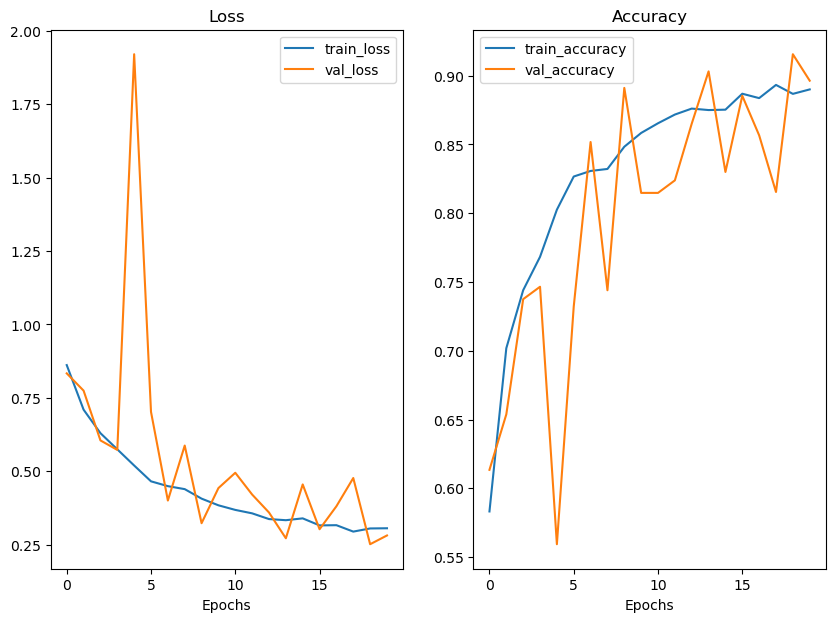

In [90]:
plot_loss_curves(model_0_results)

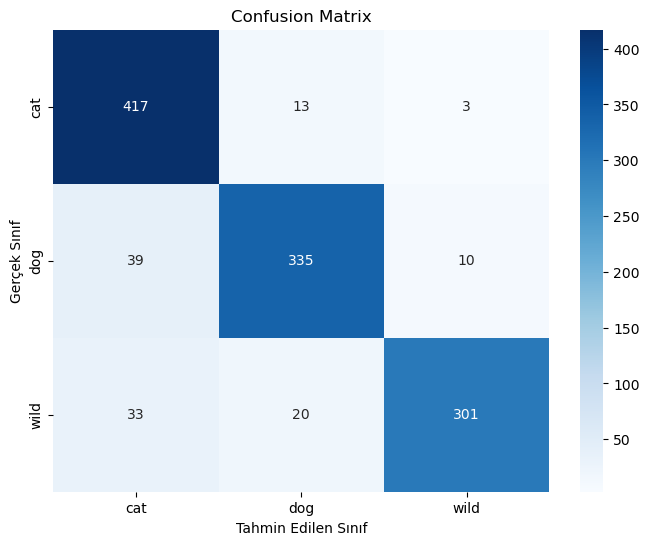

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(model, dataloader, class_names, device="cuda" if torch.cuda.is_available() else "cpu"):
    model.to(device)
    model.eval()  # Modeli değerlendirme moduna al

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)  # En yüksek olasılıklı sınıfı al
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Confusion matrix oluştur
    cm = confusion_matrix(all_labels, all_preds)
    
    # Confusion matrix'i görselleştir
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.ylabel("Gerçek Sınıf")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(model_0, test_data_loader, class_names)


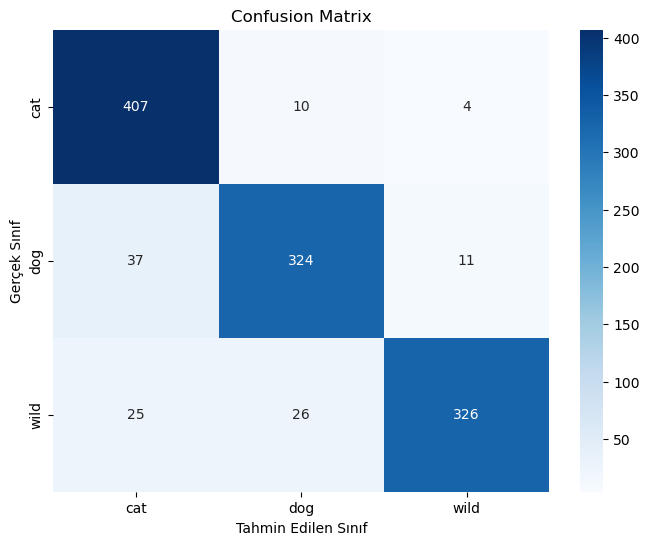

In [92]:
plot_confusion_matrix(model_0, val_data_loader, class_names)

In [93]:
from typing import List
device = 'cuda' if torch.cuda.is_available() else 'cpu' 
class_names
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

In [94]:
import torchvision

In [162]:
custom_image_path = "C:/Users\ozdem\Jupyter Notebook\PyTorch\CNN_archtirecture\wild_13.jpg"
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[28, 27, 27,  ..., 28, 28, 28],
         [28, 28, 27,  ..., 28, 28, 28],
         [28, 28, 27,  ..., 27, 27, 27],
         ...,
         [19, 19, 19,  ..., 29, 29, 30],
         [18, 18, 17,  ..., 28, 28, 29],
         [17, 17, 17,  ..., 27, 28, 28]],

        [[29, 28, 28,  ..., 28, 28, 28],
         [29, 29, 28,  ..., 28, 28, 28],
         [29, 29, 28,  ..., 27, 27, 27],
         ...,
         [19, 19, 19,  ..., 31, 30, 31],
         [18, 18, 17,  ..., 30, 29, 30],
         [17, 17, 17,  ..., 29, 29, 29]],

        [[31, 30, 30,  ..., 28, 28, 28],
         [31, 31, 30,  ..., 28, 28, 28],
         [31, 31, 30,  ..., 27, 27, 27],
         ...,
         [19, 19, 19,  ..., 30, 32, 33],
         [18, 18, 17,  ..., 29, 31, 32],
         [17, 17, 17,  ..., 28, 31, 31]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 168, 300])

Custom image dtype: torch.uint8


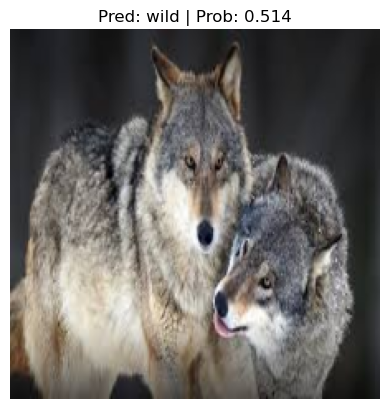

In [163]:
custom_transform = transforms.Compose([
    transforms.Resize((224,224))
])


pred_and_plot_image(model= model_0,
                   image_path = custom_image_path,
                   class_names = class_names,
                   transform = custom_transform,
                   device = device)

In [138]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_misclassified_images(model, dataloader, class_idx, class_names, device, num_images=10):
    """
    Belirli bir sınıfta yanlış tahmin edilen resimleri çizer.

    Parametreler:
    - model: Eğitilmiş PyTorch modeli
    - dataloader: Test/Validation DataLoader
    - class_idx: Yanlış tahminleri görmek istediğimiz sınıfın indeks numarası
    - class_names: Sınıf isimlerinin listesi (örn: ["cat", "dog", "bird"])
    - device: Cihaz (cuda veya cpu)
    - num_images: Çizilecek maksimum yanlış tahmin edilen görüntü sayısı
    """

    model.eval()  # Modeli değerlendirme moduna al
    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)  # En yüksek olasılıklı sınıfı al

            # Yanlış tahmin edilenleri belirle
            misclassified_mask = (preds != labels) & (labels == class_idx)
            misclassified_indices = torch.where(misclassified_mask)[0]

            for idx in misclassified_indices:
                misclassified_images.append(images[idx].cpu())
                misclassified_labels.append(labels[idx].cpu().item())
                misclassified_preds.append(preds[idx].cpu().item())

                if len(misclassified_images) >= num_images:
                    break  # Belirtilen sayı kadar görüntü topla
            if len(misclassified_images) >= num_images:
                break  # Döngüyü erken sonlandır

    # Eğer hiç yanlış tahmin edilen yoksa uyarı ver
    if not misclassified_images:
        print(f"No misclassified images found for class '{class_names[class_idx]}'")
        return

    # Görselleri çiz
    fig, axes = plt.subplots(1, len(misclassified_images), figsize=(15, 5))
    if len(misclassified_images) == 1:
        axes = [axes]  # Tek görüntü olduğunda liste haline getir

    for i, ax in enumerate(axes):
        img = misclassified_images[i].permute(1, 2, 0).numpy()  # [C, H, W] -> [H, W, C]
        img = np.clip(img, 0, 1)  # Normalize etmek için

        ax.imshow(img)
        ax.set_title(f"True: {class_names[misclassified_labels[i]]}\nPred: {class_names[misclassified_preds[i]]}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


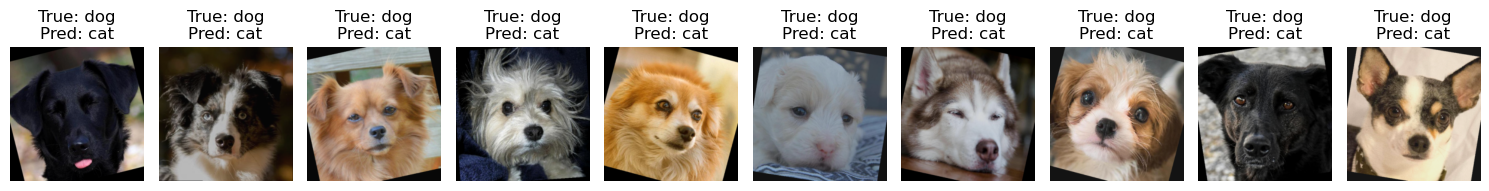

In [154]:
plot_misclassified_images(
    model=model_0, 
    dataloader=test_data_loader, 
    class_idx=1, 
    class_names=class_names, 
    device=device,
    num_images=10
)


In [ ]:
torch.save(model_0.state_dict(), "model_weights_V1.pth")
